In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from itertools import chain

from datetime import datetime
from time import time
from calendar import monthrange

import docx
from docx.shared import Inches,Cm,Pt,RGBColor

from docx.oxml.ns import nsdecls
from docx.oxml import parse_xml

from docx.oxml.xmlchemy import OxmlElement
from docx.oxml.shared import qn

from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn

import six
import matplotlib.image as mpimg
import re
import imgkit


In [2]:
#pip install wkhtmltopdf

In [3]:
data=pd.read_excel("Medical_Ecommerce_New.xlsx")
data.head()

,Order ID,Order Date,Order Status,Organic/Inorganic,BDE Name,Department,Vertical,Customer Name,Customer Email,Customer Telephone,...,State,City,Postcode,AWB Number,Comment,Tag,Carrier type,Zone,Shipment Date,Order Value
0,145002956,2019-12-24 00:00:00,complete,Inorganic,-,-,Organic,testing team test data,androforu42@gmail.com,9768819557,...,MADHYA PRADESH,MUMBAI,400055,-,This is test order:Kishor,Testing,-,WEST,2019-12-27 00:00:00,3651.2
1,145002956,2019-12-24 00:00:00,complete,Inorganic,-,-,Organic,testing team test data,androforu42@gmail.com,9768819557,...,MADHYA PRADESH,MUMBAI,400055,-,This is test order:Kishor,Testing,-,WEST,2019-12-27 00:00:00,3651.2
2,145003352,2019-12-03 00:00:00,complete,Inorganic,-,-,Organic,Ashwini Jothadi,ashwini.j@medikabazaar.com,7760630121,...,KARNATAKA,BANGALORE,560054,-,Testing Order Cancelled:Kishor,Testing,-,SOUTH,2019-12-13 00:00:00,201600
3,1045008642,2019-12-03 00:00:00,pending,Organic,-,-,Organic,Glen Gonsalves,glen.gonsalves@medikabazaar.com,7400041688,...,MAHARASHTRA,MUMBAI,400069,-,-,-,-,WEST,-,226.43
4,1045008643,2019-12-03 00:00:00,complete,Organic,-,-,Organic,Test user,test2@test.com,5656565454,...,MAHARASHTRA,-,670390,-,Testing Order Cancelled:Kishor,Testing,-,WEST,2019-12-13 00:00:00,2329.6


In [4]:
newdata=data.copy()
newdata.head()
newdata.shape

(52472, 33)

In [5]:
newdata=newdata[(newdata["Vertical"]!="Technology") & (newdata["Order Status"]!="pending")]
newdata.shape

(51347, 33)

In [6]:
newdata['Order Date']=pd.to_datetime(newdata['Order Date'], errors='coerce')
newdata['month']=newdata['Order Date'].dt.month
newdata['month_str']=newdata['Order Date'].dt.strftime('%b')
newdata.head()

,Order ID,Order Date,Order Status,Organic/Inorganic,BDE Name,Department,Vertical,Customer Name,Customer Email,Customer Telephone,...,Postcode,AWB Number,Comment,Tag,Carrier type,Zone,Shipment Date,Order Value,month,month_str
0,145002956,2019-12-24,complete,Inorganic,-,-,Organic,testing team test data,androforu42@gmail.com,9768819557,...,400055,-,This is test order:Kishor,Testing,-,WEST,2019-12-27 00:00:00,3651.2,12.0,Dec
1,145002956,2019-12-24,complete,Inorganic,-,-,Organic,testing team test data,androforu42@gmail.com,9768819557,...,400055,-,This is test order:Kishor,Testing,-,WEST,2019-12-27 00:00:00,3651.2,12.0,Dec
2,145003352,2019-12-03,complete,Inorganic,-,-,Organic,Ashwini Jothadi,ashwini.j@medikabazaar.com,7760630121,...,560054,-,Testing Order Cancelled:Kishor,Testing,-,SOUTH,2019-12-13 00:00:00,201600,12.0,Dec
4,1045008643,2019-12-03,complete,Organic,-,-,Organic,Test user,test2@test.com,5656565454,...,670390,-,Testing Order Cancelled:Kishor,Testing,-,WEST,2019-12-13 00:00:00,2329.6,12.0,Dec
5,1045008644,2019-12-03,Cancelled,Organic,-,-,Organic,Test user,test2@test.com,5656565454,...,670390,-,Price issue:Kishor Dhuri,Price,-,WEST,2020-03-11 00:00:00,2464,12.0,Dec


In [7]:
now = datetime.now()
current_month = now.month-1 if now.month > 1 else 12
last_month = now.month-2 if now.month > 1 else 12
current_month

6

In [8]:
newdata['Customer Name']=newdata['Customer Name'].apply(lambda x : x.lower())
#newdata['Product Name']=newdata['Product Name'].apply(lambda x : x.lower())
newdata["Customer Name"]=newdata["Customer Name"].map(lambda x:x.rstrip('  -').rstrip('  .'))
newdata["Customer Name"]=(newdata["Customer Name"].str.split()).str.join(' ')

In [9]:
newdata['State'].unique()

array(['MADHYA PRADESH', 'KARNATAKA', 'MAHARASHTRA', 'TAMIL NADU',
       'TELANGANA', 'BIHAR', 'JHARKHAND', 'UTTARAKHAND', 'ANDHRA PRADESH',
       'HARYANA', 'GUJARAT', 'UTTAR PRADESH', 'DELHI', 'PUNJAB',
       'UTTARANCHAL', 'RAJASTHAN', 'PONDICHERRY', 'MEGHALAYA', 'KERALA',
       'CHHATTISGARH', 'ASSAM', 'GOA', 'WEST BENGAL',
       'ANDAMAN AND NICOBAR', 'ORISSA', 'MIZORAM', 'JAMMU AND KASHMIR',
       'MANIPUR', 'CALIFORNIA', 'MADHYA PRADESH,', 'ODISHA', 'TAMILNADU',
       'UTTERPRADESH', 'GUJRAT', 'DAR ES SALAAM', 'TRIPURA', 'NEW DELHI',
       'HIMACHAL PRADESH', 'LAKSHADWEEP', 'ARUNACHAL PRADESH',
       'CHANDIGARH', 'SINGAPORE', 'NIGERIA', 'QATAR', 'TANZANIA',
       'MB999300', 'MADHYAPRADESH', 'DADRA AND NAGAR HAVELI', 'DUBAI',
       'DAMAN AND DIU', 'NAGALAND', '-', nan, 'MICHIGAN', 'JAKARTA',
       'ANDAMAN AND NICOBAR ISLANDS', 'NAIROBI', 'ABC', 'INDIANA',
       'DHAKA', 'SONGWE', 'NEW YORK', 'MASSACHUSETTS', 'NEW JERSEY',
       'PENNSYLVANIA', 'HARARE', 'HARGEIS

In [10]:
list(newdata['Product Name'].unique())

['Fascial Dialator Set (Teflon)',
 'Niko (Boston Ivy) Nonstick Pen (517)',
 '3M Attest Auto-Reader 490',
 'NIKO (Boston Ivy) Flexible Pencil  With Blade (521)',
 'Diamond - B.P. Machine Mercury Delux',
 'MICROPORE DISPENSER PK 1" X 10YDS - 12 RLS/BX',
 'Swisser Wheelchair Weighing Scale',
 '3M ESPE Alginates (New), 500gms',
 'Chinese Airotor Cartridge',
 'Dr. Steve Glass Beads Sterilizer',
 'Unique Dental UV Chamber',
 'Hemant AERO Piston Compressor Nebulizer',
 'Crocin Cold N Flu Max Tablet',
 'Dental Stone 3 Kgs',
 'Intello Suction Tips (Imported)',
 'Kalabhai Die Stone 3kg',
 'Dentsply Zelgan 2002',
 'Niko (Boston Ivy ) Disposable Skin Stapler-35W',
 'France Thermo Hygrometer Dual Display',
 'Medisafe Dental Bib- Laminated - MEDSDB005',
 'Zycel 100Mg Capsule',
 'Medisafe Knee Length Shoe Cover - MEDSSCK005',
 'Medisafe Non Owen Disposabe Shoe Cover  - MEDSSC005',
 'Niko (Boston Ivy)  Pen with SS Blade (516)',
 'Keto-Test GK Urine Analysis Test strip for Glucose and Ketone',
 'ARK En

In [11]:
newdata_current_month=newdata[newdata['month']==current_month]
newdata_current_month.shape

(7900, 35)

In [12]:
newdata_last_month=newdata[newdata['month']==last_month]
newdata_last_month.shape

(5132, 35)

In [13]:
def last_day_of_month(date_value):
    return date_value.replace(day = monthrange(date_value.year, date_value.month)[1])

given_date =datetime(year=now.year, month=now.month-1, day=1).date()
print(last_day_of_month(given_date))

2020-06-30


In [14]:
first_date_year =datetime(year=now.year, month=1, day=1).date()
first_date_year

datetime.date(2020, 1, 1)

In [15]:
YTD_newdata=newdata[(newdata['Order Date']>=first_date_year) & (newdata['Order Date']<=last_day_of_month(given_date))]

In [16]:
YTD_newdata.shape

(38760, 35)

In [17]:
YTD_newdata_DS=YTD_newdata[YTD_newdata["Vertical"]=="Direct Sales"]
YTD_newdata_DS.shape

(11218, 35)

In [18]:
#YTD_newdata_DS.to_excel('Medical_Ecommerce_Direct_sales_YTD.xlsx')

In [19]:
list(YTD_newdata_DS["Customer Name"].unique())

['saritha dental',
 'su pal',
 'khushboo kumari',
 'kamy general hospital',
 'dr. abhishek kumar',
 'ganga super specialty hospital',
 'mohanraj m',
 'nikhil modi',
 'dr abhishek saraswat',
 'sumit bhatnagar',
 'shreyas gujjar',
 'kvt speciality hospital',
 'r. j. medicals',
 'dr sampurna dey',
 'ftf pharma pvt ltd',
 'qx global services llp',
 'central traders',
 'best medical center',
 'dr. nivittri',
 'renal dialysis',
 'contacare ophthalmic pvt. ltd',
 'dr monica tayal',
 'n. h pharmacy',
 'vaishnavi medicose',
 'geneopath health care services',
 'zohlimpuii khiangte',
 'dr.ashwini m.v',
 'kolkata dental supply',
 'dr.srinivas',
 'sh technology pvt ltd',
 's.g pharmacy',
 'subaitha dental',
 'kalai dental hospital',
 'dr p sanjay reddy',
 'deepak b.m deepak b.m',
 'sudarshan agency dental depot',
 'eastern dental & surgical complex',
 'n r surgical & company',
 'anand pharma',
 'healing essential',
 'darsh enterprise',
 'karnavati chemist',
 'shreeji healthcare',
 'dr isha juneja b

In [20]:
#YTD_newdata_DS["Customer Name"]=YTD_newdata_DS["Customer Name"].map(lambda x:x.rstrip('  -').rstrip('  .'))

In [21]:
list(YTD_newdata_DS["Customer Name"].unique())

['saritha dental',
 'su pal',
 'khushboo kumari',
 'kamy general hospital',
 'dr. abhishek kumar',
 'ganga super specialty hospital',
 'mohanraj m',
 'nikhil modi',
 'dr abhishek saraswat',
 'sumit bhatnagar',
 'shreyas gujjar',
 'kvt speciality hospital',
 'r. j. medicals',
 'dr sampurna dey',
 'ftf pharma pvt ltd',
 'qx global services llp',
 'central traders',
 'best medical center',
 'dr. nivittri',
 'renal dialysis',
 'contacare ophthalmic pvt. ltd',
 'dr monica tayal',
 'n. h pharmacy',
 'vaishnavi medicose',
 'geneopath health care services',
 'zohlimpuii khiangte',
 'dr.ashwini m.v',
 'kolkata dental supply',
 'dr.srinivas',
 'sh technology pvt ltd',
 's.g pharmacy',
 'subaitha dental',
 'kalai dental hospital',
 'dr p sanjay reddy',
 'deepak b.m deepak b.m',
 'sudarshan agency dental depot',
 'eastern dental & surgical complex',
 'n r surgical & company',
 'anand pharma',
 'healing essential',
 'darsh enterprise',
 'karnavati chemist',
 'shreeji healthcare',
 'dr isha juneja b

In [22]:
#YTD_newdata_DS["Customer Name"]=(YTD_newdata_DS["Customer Name"].str.split()).str.join(' ')

In [23]:
len(list(YTD_newdata_DS["Customer Name"].unique()))

1647

In [24]:
#YTD_newdata_DS[YTD_newdata_DS["Customer Name"]=='g.p. shekhawati hospital & research centre']

In [25]:
min_date_data=pd.to_datetime(newdata['Order Date'].min())

In [26]:
newdata_19_20=newdata[(newdata['Order Date']>=min_date_data) & (newdata['Order Date']<=last_day_of_month(given_date))]

In [27]:
newdata_19_20.shape

(42126, 35)

In [28]:
newdata_DS_19_20=newdata_19_20[newdata_19_20["Vertical"]=="Direct Sales"]
newdata_DS_19_20.shape

(13181, 35)

In [29]:
newdata_DS_19_20.to_excel('Medical_Ecommerce_Direct_sales.xlsx')

In [30]:
newdata_DS_19_20.isnull().sum()

Order ID                0
Order Date              0
Order Status            0
Organic/Inorganic       0
BDE Name                0
Department              0
Vertical                0
Customer Name           0
Customer Email          0
Customer Telephone      0
Active/Inactive         0
Customer Category       0
Product Name            0
SKU                     0
Product Category        0
Product Rate            0
Qty Ordered             0
Qty Invoiced            0
Qty Cancelled           0
Qty Shipped             0
Qty Delivered           0
Qty Refunded            0
Fulfilment Center       0
State                   0
City                    0
Postcode                0
AWB Number            755
Comment                 0
Tag                     0
Carrier type            0
Zone                    0
Shipment Date           0
Order Value             0
month                   0
month_str               0
dtype: int64

# ACTUAL

In [31]:
YTD_newdata_DS['Customer Name']=YTD_newdata_DS['Customer Name'].apply(lambda x : x.lower())
str(YTD_newdata_DS["Customer Name"].nunique())

'1647'

In [32]:
YTD_newdata_DS['Product Name']=YTD_newdata_DS['Product Name'].apply(lambda x : x.lower())
str(YTD_newdata_DS["Product Name"].nunique())

'4310'

In [33]:
str(YTD_newdata_DS["Order ID"].nunique())

'4273'

In [34]:
YTD_newdata_DS_current_month_rev=pd.DataFrame(YTD_newdata_DS.loc[YTD_newdata_DS["month"]==current_month].groupby(["Order ID"])["Order Value"].max()).reset_index()
YTD_newdata_DS_current_month_rev=(YTD_newdata_DS_current_month_rev["Order Value"].sum()/10000000).round(2)
str(YTD_newdata_DS_current_month_rev)

'5.89'

In [35]:
YTD_newdata_DS_last_month_rev=pd.DataFrame(YTD_newdata_DS.loc[YTD_newdata_DS["month"]==last_month].groupby(["Order ID"])["Order Value"].max()).reset_index()
YTD_newdata_DS_last_month_rev=(YTD_newdata_DS_last_month_rev["Order Value"].sum()/10000000).round(2)
str(YTD_newdata_DS_last_month_rev)

'3.53'

In [36]:
YTD_newdata_DS_YTD_month_rev=pd.DataFrame(YTD_newdata_DS.groupby(["Order ID"])["Order Value"].max()).reset_index()
YTD_newdata_DS_YTD_month_rev=(YTD_newdata_DS_YTD_month_rev["Order Value"].sum()/10000000).round(2)
str(YTD_newdata_DS_YTD_month_rev)

'29.2'

# CONTRIBUTION

In [37]:
YTD_newdata['Customer Name']=YTD_newdata['Customer Name'].apply(lambda x : x.lower())
print(str(YTD_newdata["Customer Name"].nunique()))
contribution_cust=str(round(((YTD_newdata_DS["Customer Name"].nunique()/YTD_newdata["Customer Name"].nunique())*100),2))+" "+"%"
print(contribution_cust)

2691
61.2 %


In [38]:
YTD_newdata['Product Name']=YTD_newdata['Product Name'].apply(lambda x : x.lower())
print(str(YTD_newdata["Product Name"].nunique()))
contribution_product=str(round(((YTD_newdata_DS["Product Name"].nunique()/YTD_newdata["Product Name"].nunique())*100),2))+" "+"%"
print(contribution_product)

11057
38.98 %


In [39]:
print(str(YTD_newdata["Order ID"].nunique()))
contribution_orders=str(round(((YTD_newdata_DS["Order ID"].nunique()/YTD_newdata["Order ID"].nunique())*100),2))+" "+"%"
print(contribution_orders)

8357
51.13 %


In [40]:
YTD_newdata_current_month_rev=pd.DataFrame(YTD_newdata.loc[YTD_newdata["month"]==current_month].groupby(["Order ID"])["Order Value"].max()).reset_index()
YTD_newdata_current_month_rev=(YTD_newdata_current_month_rev["Order Value"].sum()/10000000).round(2)
print(YTD_newdata_current_month_rev)
contribution_MTD_rev=str(round((YTD_newdata_DS_current_month_rev/YTD_newdata_current_month_rev)*100,2))+" "+"%"
print(contribution_MTD_rev)

18.55
31.75 %


In [41]:
YTD_newdata_last_month_rev=pd.DataFrame(YTD_newdata.loc[YTD_newdata["month"]==last_month].groupby(["Order ID"])["Order Value"].max()).reset_index()
YTD_newdata_last_month_rev=(YTD_newdata_last_month_rev["Order Value"].sum()/10000000).round(2)
print(YTD_newdata_last_month_rev)
contribution_LMTD_rev=str(round((YTD_newdata_DS_last_month_rev/YTD_newdata_last_month_rev)*100,2))+" "+"%"
contribution_LMTD_rev

12.95


'27.26 %'

In [42]:
YTD_newdata_YTD_month_rev=pd.DataFrame(YTD_newdata.groupby(["Order ID"])["Order Value"].max()).reset_index()
YTD_newdata_YTD_month_rev=(YTD_newdata_YTD_month_rev["Order Value"].sum()/10000000).round(2)
print(YTD_newdata_YTD_month_rev)
contribution_YTD_rev=str(round((YTD_newdata_DS_YTD_month_rev/YTD_newdata_YTD_month_rev)*100,2))+" "+"%"
contribution_YTD_rev

109.97


'26.55 %'

# Customer Category

In [43]:
YTD_newdata_DS_cust_category=pd.DataFrame(YTD_newdata_DS.groupby(["Customer Category","Order ID"])["Order Value"].max()).reset_index()
#print(YTD_newdata_DS_cust_category[YTD_newdata_DS_cust_category["Customer Category"]=="Dental Center"])
#print(YTD_newdata_DS_cust_category)
YTD_newdata_DS_cust_category=pd.DataFrame((YTD_newdata_DS_cust_category.groupby("Customer Category")["Order Value"].sum()/10000000).round(2)).reset_index()
YTD_newdata_DS_cust_category

,Customer Category,Order Value
0,Dental Center,0.69
1,Doctor / Medical Professional,3.37
2,General,1.28
3,Healthcare Professionals,0.02
4,Hospital / Medical Establishment,14.23
5,Medical Suppliers / Resellers,8.89
6,Proprietary / Partnership / Comp,0.27
7,Trade Buyers/Resellers/Distrib,0.39
8,Vendor,0.06


# Product Category

In [44]:
YTD_newdata_DS_prod_category=pd.DataFrame(YTD_newdata_DS.groupby(["Product Category","Order ID"])["Order Value"].max()).reset_index()
#YTD_newdata_DS_prod_category[YTD_newdata_DS_prod_category["Product Category"]=="Dental Center"]
YTD_newdata_DS_prod_category=pd.DataFrame((YTD_newdata_DS_prod_category.groupby("Product Category")["Order Value"].sum()/10000000).round(2)).reset_index()
YTD_newdata_DS_prod_category

,Product Category,Order Value
0,-,0.84
1,AV Fistula Needle,0.00
2,Absorbent Gauze Cloth,0.00
3,Absorbent Rolled Gauze,0.01
4,Anaesthesiology,0.00
5,Bandage Cloth,0.00
6,Best Selling,1.25
7,COVID Corporate Safety Products,0.01
8,Cable Cord,0.00
9,Cardiology,0.03


# Order Status

In [45]:
YTD_newdata_DS_order_status=pd.DataFrame(YTD_newdata_DS.groupby(["Order Status","Order ID"])["Order Value"].max()).reset_index()
#YTD_newdata_DS_order_status[YTD_newdata_DS_order_status["Order Status"]=="Dental Center"]
YTD_newdata_DS_order_status=pd.DataFrame((YTD_newdata_DS_order_status.groupby("Order Status")["Order Value"].sum()/10000000).round(2)).reset_index()
YTD_newdata_DS_order_status

,Order Status,Order Value
0,Cancelled,4.73
1,complete,9.26
2,processing,6.72
3,success,8.49


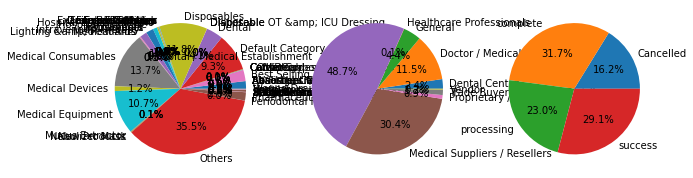

In [46]:
fig,ax=plt.subplots(1,3,figsize=(10,5))

ax[0].pie(YTD_newdata_DS_prod_category["Order Value"],labels=YTD_newdata_DS_prod_category["Product Category"],autopct="%1.1f%%")
ax[1].pie(YTD_newdata_DS_cust_category["Order Value"],labels=YTD_newdata_DS_cust_category["Customer Category"],autopct="%1.1f%%")
ax[2].pie(YTD_newdata_DS_order_status["Order Value"],labels=YTD_newdata_DS_order_status["Order Status"],autopct="%1.1f%%")
plt.show()

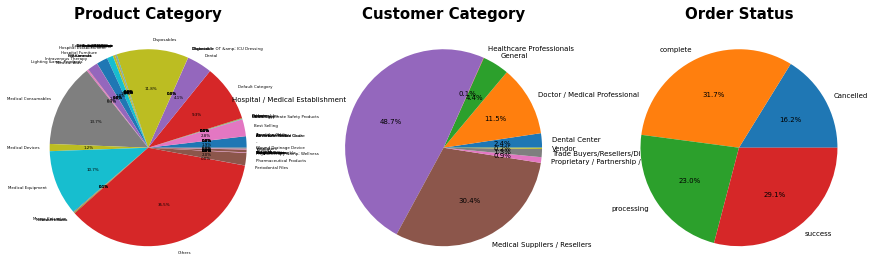

In [47]:
fig=plt.figure(figsize=(15,5))

ax1 = plt.subplot2grid((1,3),(0,0))
ax1.pie(YTD_newdata_DS_prod_category["Order Value"],labels=YTD_newdata_DS_prod_category["Product Category"],autopct="%1.1f%%",textprops={'fontsize': 4})
plt.title("Product Category",fontsize=15, fontweight='bold')


ax1 = plt.subplot2grid((1,3),(0,1))
plt.pie(YTD_newdata_DS_cust_category["Order Value"],labels=YTD_newdata_DS_cust_category["Customer Category"],autopct="%1.1f%%",textprops={'fontsize': 7})
plt.title("Customer Category",fontsize=15, fontweight='bold')

ax1 = plt.subplot2grid((1,3),(0,2))
plt.pie(YTD_newdata_DS_order_status["Order Value"],labels=YTD_newdata_DS_order_status["Order Status"],autopct="%1.1f%%",textprops={'fontsize': 7})
plt.title("Order Status",fontsize=15, fontweight='bold')


plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_prod_order.png',bbox_inches='tight',dpi=100)
plt.show()

# Sales Performance

# Customer Summary

In [48]:
newdata_DS_19_20.shape

(13181, 35)

In [49]:
newdata_DS_19_20.head()

,Order ID,Order Date,Order Status,Organic/Inorganic,BDE Name,Department,Vertical,Customer Name,Customer Email,Customer Telephone,...,Postcode,AWB Number,Comment,Tag,Carrier type,Zone,Shipment Date,Order Value,month,month_str
70,1045008696,2019-12-08,complete,Organic,Surendra Kumar PS,Revenue,Direct Sales,murali mohan bangalore sathyanarayana,drmurali1981@gmail.com,918023578422,...,560022,na,-,-,Medikabazaar Logistics,SOUTH,2019-12-19 00:00:00,37501,12.0,Dec
153,1045008753,2019-12-17,complete,Organic,Gourav Dandotiya,Revenue,Direct Sales,dr amit khare,dramitkhare@yahoo.co.in,919981665065,...,462010,1,-,-,Medikabazaar Logistics,WEST,2019-12-26 00:00:00,8499.97,12.0,Dec
154,1045008754,2019-12-17,complete,Organic,Gourav Dandotiya,Revenue,Direct Sales,dr amit khare,dramitkhare@yahoo.co.in,919981665065,...,462010,1,-,-,Medikabazaar Logistics,WEST,2019-12-26 00:00:00,1716.99,12.0,Dec
456,1045008915,2020-01-27,processing,Organic,Narahari Rao,Revenue,Direct Sales,saritha dental,sarithaclinic2015@gmail.com,9346277989,...,500047,NaN,-,-,MBGO,SOUTH,2020-02-01 00:00:00,793,1.0,Jan
853,1045009168,2020-03-21,complete,Organic,Arvind Chattopadhyay,Revenue,Direct Sales,su pal,suvendu_pal@yahoo.com,9831018170,...,700050,209738428,-,-,Others,EAST,2020-04-13 00:00:00,5229.84,3.0,Mar


In [50]:
newdata_DS_19_20['year'] = pd.DatetimeIndex(newdata_DS_19_20['Order Date']).year
newdata_DS_19_20['year']=newdata_DS_19_20['year'].astype(str)
newdata_DS_19_20['year']=newdata_DS_19_20['year'].str[-2:]
newdata_DS_19_20["MonthY"]=newdata_DS_19_20["month_str"]+"-"+newdata_DS_19_20['year']
list(newdata_DS_19_20["MonthY"].unique())

['Dec-19', 'Jan-20', 'Mar-20', 'May-20', 'Feb-20', 'Apr-20', 'Jun-20']

In [51]:
YTD_newdata_DS['year'] = pd.DatetimeIndex(YTD_newdata_DS['Order Date']).year
YTD_newdata_DS['year']=YTD_newdata_DS['year'].astype(str)
YTD_newdata_DS['year']=YTD_newdata_DS['year'].str[-2:]
YTD_newdata_DS["MonthY"]=YTD_newdata_DS["month_str"]+"-"+YTD_newdata_DS['year']
list(YTD_newdata_DS["MonthY"].unique())

['Jan-20', 'Mar-20', 'May-20', 'Feb-20', 'Apr-20', 'Jun-20']

In [52]:
YTD_newdata_DS['year'].str[-2:]

456      20
853      20
854      20
914      20
915      20
         ..
43226    20
43227    20
43228    20
43229    20
43230    20
Name: year, Length: 11218, dtype: object

In [53]:
newdata_DS_19_20.head()

,Order ID,Order Date,Order Status,Organic/Inorganic,BDE Name,Department,Vertical,Customer Name,Customer Email,Customer Telephone,...,Comment,Tag,Carrier type,Zone,Shipment Date,Order Value,month,month_str,year,MonthY
70,1045008696,2019-12-08,complete,Organic,Surendra Kumar PS,Revenue,Direct Sales,murali mohan bangalore sathyanarayana,drmurali1981@gmail.com,918023578422,...,-,-,Medikabazaar Logistics,SOUTH,2019-12-19 00:00:00,37501,12.0,Dec,19,Dec-19
153,1045008753,2019-12-17,complete,Organic,Gourav Dandotiya,Revenue,Direct Sales,dr amit khare,dramitkhare@yahoo.co.in,919981665065,...,-,-,Medikabazaar Logistics,WEST,2019-12-26 00:00:00,8499.97,12.0,Dec,19,Dec-19
154,1045008754,2019-12-17,complete,Organic,Gourav Dandotiya,Revenue,Direct Sales,dr amit khare,dramitkhare@yahoo.co.in,919981665065,...,-,-,Medikabazaar Logistics,WEST,2019-12-26 00:00:00,1716.99,12.0,Dec,19,Dec-19
456,1045008915,2020-01-27,processing,Organic,Narahari Rao,Revenue,Direct Sales,saritha dental,sarithaclinic2015@gmail.com,9346277989,...,-,-,MBGO,SOUTH,2020-02-01 00:00:00,793,1.0,Jan,20,Jan-20
853,1045009168,2020-03-21,complete,Organic,Arvind Chattopadhyay,Revenue,Direct Sales,su pal,suvendu_pal@yahoo.com,9831018170,...,-,-,Others,EAST,2020-04-13 00:00:00,5229.84,3.0,Mar,20,Mar-20


In [54]:
newdata_DS_19_20=newdata_DS_19_20.sort_values(by="month",ascending=True)


In [55]:

### Customers that are available in 2019:

newdata_DS_2019=newdata_DS_19_20[newdata_DS_19_20["year"]=="19"]
cust_DS_2019=newdata_DS_2019["Customer Name"].unique()
print(cust_DS_2019)
cust_count_DS_2019=len(cust_DS_2019)
(cust_count_DS_2019)

['contacare ophthalmic pvt ltd' 'balaji dental' 'guru medical store'
 'shri ramkrishna swast aushadhi seva' 'a r medical & surgical'
 'new jay medical stores' 'dr.srividya s' 'ashwath life sciences'
 'hasan ali adil' 'vaishnavi medicose' 'rekha b s' 'dr. nivittri'
 'kolkata dental supply company' 'rasi medical' 'khm hospital'
 'pharmasurge pharmasurge' 'ss healthcare' 'shine laser dental hospital'
 'implanting smile' 'samanth goud' 'krishna medical & surgical'
 'maragatham dental care' 'ganesh medical store' 'di bombay pharma'
 's s medicos' 'smile dental' 'swastik dental solutions pvt.ltd'
 'dr golam wakil' 'dr.neeraj mehar chand' 'dr. suresh' 'subaitha dental'
 'laser dentistry' 'swathi medical' 'ramji pharma'
 'mayom biotechnology pvt. ltd' 'dr.sudeep kotegar'
 'njk pharmacy private limited' 'mrs. vaijayanti mestry'
 'lions om diagnostic dentre' 'mr sailesh kumar dubey'
 'v guru dental clinic' 'sai pharmaceuticals' 'sri vinayaga medical'
 'dr. abantika mookherjee' 'dr john jeevaraj'

318

In [56]:
m_list=list(newdata_DS_19_20["MonthY"].unique())
m_list.remove('Dec-19')
m_list

['Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20']

In [57]:
l=[]
def funct_new_old_cust(m="Dec-2019"):
    global l
    cust=list(cust_DS_2019)
    cust1=cust.extend(l)
    newdata_DS=newdata_DS_19_20[newdata_DS_19_20["MonthY"]==str(m)]
    old_cust_DS=[]
    New_cust_DS=[]
    for i in newdata_DS["Customer Name"].unique():
        if i not in cust:
            New_cust_DS.append(i)
            l.append(i)
        else:
            old_cust_DS.append(i)
    Total_cust=len(cust)
    Total_cust_upto_M=Total_cust+len(New_cust_DS)
    return len(New_cust_DS),len(old_cust_DS),Total_cust_upto_M,New_cust_DS
    #cust.append(New_cust_DS)
    
    

    

In [58]:
new_old_cust=[[] for i in range(len(m_list))]

In [59]:
new_old_cust

[[], [], [], [], [], []]

In [60]:
for i,a in enumerate(m_list):
    new_old_cust[i].append(funct_new_old_cust(a))

In [61]:
#new_old_cust[1][0]

In [62]:
#Jan 2020

newdata_DS_jan2020=newdata_DS_19_20[newdata_DS_19_20["MonthY"]=="Jan-2020"]
cust_DS_jan2020=newdata_DS_jan2020["Customer Name"].unique()

# customers available in jan 2020
print("customers available in jan 2020:",len(list(cust_DS_jan2020)))
old_cust_DS_jan2020=[]
New_cust_DS_jan2020=[]
for i in cust_DS_jan2020:
    if i not in cust_DS_2019:
        New_cust_DS_jan2020.append(i)
    else:
        old_cust_DS_jan2020.append(i)

# new customers in jan 2020        
print("new customers in jan 2020:",len(New_cust_DS_jan2020))
## existing customers in jan 2020
print("old customers in jan 2020:",len(old_cust_DS_jan2020))

#Total Customers upto jan2020
total_cust_uptojan=list(cust_DS_2019)+list(New_cust_DS_jan2020)
Total_cust_Jan2020=len(cust_DS_2019)+len(New_cust_DS_jan2020)
print("Total Customers upto jan2020:",Total_cust_Jan2020)


newdata_DS_jan2020_complete=newdata_DS_jan2020[newdata_DS_jan2020["Order Status"]=="complete"]
newdata_DS_jan2020_complete["Customer Name"].unique()
newdata_DS_jan2020_complete_new_cust=[]
newdata_DS_jan2020_complete_old_cust=[]
for i in newdata_DS_jan2020_complete["Customer Name"].unique():
    if i in New_cust_DS_jan2020:
        newdata_DS_jan2020_complete_new_cust.append(i)
for j in newdata_DS_jan2020_complete["Customer Name"].unique():
    if j in old_cust_DS_jan2020:
        newdata_DS_jan2020_complete_old_cust.append(i)     
# new customers with orders complete.
print("new customers with orders complete:",len(newdata_DS_jan2020_complete_new_cust))
# old customers with orders complete.
print("old customers with orders complete:",len(newdata_DS_jan2020_complete_old_cust))

Billed_Cust_Jan2020=len(newdata_DS_jan2020_complete_new_cust)+len(newdata_DS_jan2020_complete_old_cust)

print("Billed Customers:",Billed_Cust_Jan2020)

customers available in jan 2020: 0
new customers in jan 2020: 0
old customers in jan 2020: 0
Total Customers upto jan2020: 318
new customers with orders complete: 0
old customers with orders complete: 0
Billed Customers: 0


In [63]:
#Feb 2020

newdata_DS_feb2020=newdata_DS_19_20[newdata_DS_19_20["MonthY"]=="Feb-2020"]
cust_DS_feb2020=newdata_DS_feb2020["Customer Name"].unique()

# customers available in jan 2020
print("customers available in feb 2020:",len(list(cust_DS_feb2020)))
old_cust_DS_feb2020=[]
New_cust_DS_feb2020=[]
for i in cust_DS_feb2020:
    if i not in total_cust_uptojan:
        New_cust_DS_feb2020.append(i)
    else:
        old_cust_DS_feb2020.append(i)

# new customers in jan 2020        
print("new customers in feb 2020:",len(New_cust_DS_feb2020))
## existing customers in jan 2020
print("old customers in feb 2020:",len(old_cust_DS_feb2020))

#Total Customers upto jan2020
total_cust_uptofeb=list(total_cust_uptojan)+list(New_cust_DS_feb2020)
Total_cust_feb2020=len(total_cust_uptojan)+len(New_cust_DS_feb2020)
print("Total Customers upto feb2020:",Total_cust_feb2020)


newdata_DS_feb2020_complete=newdata_DS_feb2020[newdata_DS_feb2020["Order Status"]=="complete"]
newdata_DS_feb2020_complete["Customer Name"].unique()
newdata_DS_feb2020_complete_new_cust=[]
newdata_DS_feb2020_complete_old_cust=[]
for i in newdata_DS_feb2020_complete["Customer Name"].unique():
    if i in New_cust_DS_feb2020:
        newdata_DS_feb2020_complete_new_cust.append(i)
for j in newdata_DS_feb2020_complete["Customer Name"].unique():
    if j in old_cust_DS_feb2020:
        newdata_DS_feb2020_complete_old_cust.append(i)     
# new customers with orders complete.
print("new customers with orders complete:",len(newdata_DS_feb2020_complete_new_cust))
# old customers with orders complete.
print("old customers with orders complete:",len(newdata_DS_feb2020_complete_old_cust))

Billed_Cust_Feb2020=len(newdata_DS_feb2020_complete_new_cust)+len(newdata_DS_feb2020_complete_old_cust)

print("Billed Customers:",Billed_Cust_Feb2020)

customers available in feb 2020: 0
new customers in feb 2020: 0
old customers in feb 2020: 0
Total Customers upto feb2020: 318
new customers with orders complete: 0
old customers with orders complete: 0
Billed Customers: 0


In [64]:
#Mar 2020

newdata_DS_mar2020=newdata_DS_19_20[newdata_DS_19_20["MonthY"]=="Mar-2020"]
cust_DS_mar2020=newdata_DS_mar2020["Customer Name"].unique()

# customers available in jan 2020
print("customers available in Mar 2020:",len(list(cust_DS_mar2020)))
old_cust_DS_mar2020=[]
New_cust_DS_mar2020=[]
for i in cust_DS_mar2020:
    if i not in total_cust_uptofeb:
        New_cust_DS_mar2020.append(i)
    else:
        old_cust_DS_mar2020.append(i)

# new customers in jan 2020        
print("new customers in Mar 2020:",len(New_cust_DS_mar2020))
## existing customers in jan 2020
print("old customers in Mar 2020:",len(old_cust_DS_mar2020))

#Total Customers upto jan2020
total_cust_uptomar=list(total_cust_uptofeb)+list(New_cust_DS_mar2020)
Total_cust_Mar2020=Total_cust_feb2020+len(New_cust_DS_mar2020)
print("Total Customers upto Mar2020:",Total_cust_Mar2020)


newdata_DS_mar2020_complete=newdata_DS_mar2020[newdata_DS_mar2020["Order Status"]=="complete"]
newdata_DS_mar2020_complete["Customer Name"].unique()
newdata_DS_mar2020_complete_new_cust=[]
newdata_DS_mar2020_complete_old_cust=[]
for i in newdata_DS_mar2020_complete["Customer Name"].unique():
    if i in New_cust_DS_mar2020:
        newdata_DS_mar2020_complete_new_cust.append(i)
for j in newdata_DS_mar2020_complete["Customer Name"].unique():
    if j in old_cust_DS_mar2020:
        newdata_DS_mar2020_complete_old_cust.append(i)     
# new customers with orders complete.
print("new customers with orders complete:",len(newdata_DS_mar2020_complete_new_cust))
# old customers with orders complete.
print("old customers with orders complete:",len(newdata_DS_mar2020_complete_old_cust))

Billed_Cust_Mar2020=len(newdata_DS_mar2020_complete_new_cust)+len(newdata_DS_mar2020_complete_old_cust)

print("Billed Customers:",Billed_Cust_Mar2020)

customers available in Mar 2020: 0
new customers in Mar 2020: 0
old customers in Mar 2020: 0
Total Customers upto Mar2020: 318
new customers with orders complete: 0
old customers with orders complete: 0
Billed Customers: 0


In [65]:
#April 2020

newdata_DS_apr2020=newdata_DS_19_20[newdata_DS_19_20["MonthY"]=="Apr-2020"]
cust_DS_apr2020=newdata_DS_apr2020["Customer Name"].unique()

# customers available in jan 2020
print("customers available in Apr 2020:",len(list(cust_DS_apr2020)))
old_cust_DS_apr2020=[]
New_cust_DS_apr2020=[]
for i in cust_DS_apr2020:
    if i not in total_cust_uptomar:
        New_cust_DS_apr2020.append(i)
    else:
        old_cust_DS_apr2020.append(i)

# new customers in jan 2020        
print("new customers in Apr 2020:",len(New_cust_DS_apr2020))
## existing customers in jan 2020
print("old customers in Apr 2020:",len(old_cust_DS_apr2020))

#Total Customers upto jan2020
total_cust_uptoapr=list(total_cust_uptomar)+list(New_cust_DS_apr2020)
Total_cust_Apr2020=Total_cust_Mar2020+len(New_cust_DS_apr2020)
print("Total Customers upto Apr2020:",Total_cust_Apr2020)

customers available in Apr 2020: 0
new customers in Apr 2020: 0
old customers in Apr 2020: 0
Total Customers upto Apr2020: 318


In [66]:
#May 2020

newdata_DS_may2020=newdata_DS_19_20[newdata_DS_19_20["MonthY"]=="May-2020"]
cust_DS_may2020=newdata_DS_may2020["Customer Name"].unique()

# customers available in jan 2020
print("customers available in May 2020:",len(list(cust_DS_may2020)))
old_cust_DS_may2020=[]
New_cust_DS_may2020=[]
for i in cust_DS_may2020:
    if i not in total_cust_uptoapr:
        New_cust_DS_may2020.append(i)
    else:
        old_cust_DS_may2020.append(i)

# new customers in jan 2020        
print("new customers in May 2020:",len(New_cust_DS_may2020))
## existing customers in jan 2020
print("old customers in May 2020:",len(old_cust_DS_may2020))

#Total Customers upto jan2020
total_cust_uptomay=list(total_cust_uptoapr)+list(New_cust_DS_may2020)
Total_cust_May2020=Total_cust_Apr2020+len(New_cust_DS_may2020)
print("Total Customers upto May2020:",Total_cust_May2020)

customers available in May 2020: 0
new customers in May 2020: 0
old customers in May 2020: 0
Total Customers upto May2020: 318


In [67]:
#Jun 2020

newdata_DS_jun2020=newdata_DS_19_20[newdata_DS_19_20["MonthY"]=="Jun-2020"]
cust_DS_jun2020=newdata_DS_jun2020["Customer Name"].unique()

# customers available in jan 2020
print("customers available in June 2020:",len(list(cust_DS_jun2020)))
old_cust_DS_jun2020=[]
New_cust_DS_jun2020=[]
for i in cust_DS_jun2020:
    if i not in total_cust_uptomay:
        New_cust_DS_jun2020.append(i)
    else:
        old_cust_DS_jun2020.append(i)

# new customers in jan 2020        
print("new customers in June 2020:",len(New_cust_DS_jun2020))
## existing customers in jan 2020
print("old customers in June 2020:",len(old_cust_DS_jun2020))

#Total Customers upto jan2020
total_cust_uptojun=list(total_cust_uptomay)+list(New_cust_DS_jun2020)
Total_cust_Jun2020=Total_cust_May2020+len(New_cust_DS_jun2020)
print("Total Customers upto June2020:",Total_cust_Jun2020)

customers available in June 2020: 0
new customers in June 2020: 0
old customers in June 2020: 0
Total Customers upto June2020: 318


# Customer Segmentation

In [68]:
newdata_DS_19_20.shape

(13181, 37)

In [69]:
Yearwise_newdata_DS=pd.DataFrame(newdata_DS_19_20.groupby(["year","Customer Name","Order ID"])["Order Value"].max()).reset_index()
Yearwise_newdata_DS_1=pd.DataFrame(Yearwise_newdata_DS.groupby(["year","Customer Name"])["Order Value"].sum()/10000000).reset_index()
#Yearwise_newdata_DS_1

In [70]:
#Yearwise_newdata_DS_1.to_excel('Yearwise_newdata_DS_1.xlsx')

In [71]:
#Yearwise_newdata_DS_1[Yearwise_newdata_DS_1["Order Value"]>=1]

In [72]:
#Yearwise_newdata_DS_1[(Yearwise_newdata_DS_1["Order Value"]>=0.5) &(Yearwise_newdata_DS_1["Order Value"]<1)]

In [73]:
#Yearwise_newdata_DS_1[(Yearwise_newdata_DS_1["Order Value"]>=0.01) &(Yearwise_newdata_DS_1["Order Value"]<0.5)]

In [74]:
#Yearwise_newdata_DS_1[Yearwise_newdata_DS_1["Order Value"]<0.01]

In [75]:
Yearwise_newdata_DS_2019=Yearwise_newdata_DS_1.loc[Yearwise_newdata_DS_1["year"]=='19']
#Yearwise_newdata_DS_2019

In [76]:
def funct_tiers(df):
    UP_limit=float(1)
    LW_limit=float(0.1)
    middle_limit=float(0.5)
    if df["Order Value"] >= UP_limit:
        val="Tier1"
    elif df["Order Value"] >= middle_limit and df["Order Value"] < UP_limit:
        val="Tier2"
    elif df["Order Value"] >= LW_limit and df["Order Value"] < middle_limit:
        val="Tier3"
    else:
        val="Tier4"
    return val

In [77]:
Yearwise_newdata_DS_2019["tier"]=Yearwise_newdata_DS_2019.apply(funct_tiers,axis=1)
Yearwise_newdata_DS_2019=pd.DataFrame(Yearwise_newdata_DS_2019.groupby(["year","tier"])["Order Value"].sum()).reset_index()
Yearwise_newdata_DS_2019

,year,tier,Order Value
0,19,Tier3,0.317508
1,19,Tier4,1.787801


In [78]:
#Yearwise_newdata_DS_2019["tier"].unique()

In [79]:
Yearwise_newdata_DS_2020=Yearwise_newdata_DS_1.loc[Yearwise_newdata_DS_1["year"]=='20']


In [80]:
Yearwise_newdata_DS_2020["tier"]=Yearwise_newdata_DS_2020.apply(funct_tiers,axis=1)
Yearwise_newdata_DS_2020=pd.DataFrame(Yearwise_newdata_DS_2020.groupby(["year","tier"])["Order Value"].sum()).reset_index()
Yearwise_newdata_DS_2020

,year,tier,Order Value
0,20,Tier1,7.811445
1,20,Tier2,4.197864
2,20,Tier3,6.449233
3,20,Tier4,10.742143


In [81]:
#Yearwise_newdata_DS_2020["tier"].unique()

In [82]:
#Yearwise_newdata_DS_2020[Yearwise_newdata_DS_2020["tier"]=="Tier1"]

In [83]:
Yearwise_newdata_DS_1["tier"]=Yearwise_newdata_DS_1.apply(funct_tiers,axis=1)

In [84]:
Yearwise_newdata_DS_1=pd.DataFrame(Yearwise_newdata_DS_1.groupby(["tier"])["Order Value"].sum()).reset_index()
Yearwise_newdata_DS_1["year"]="overall"
Yearwise_newdata_DS_1

,tier,Order Value,year
0,Tier1,7.811445,overall
1,Tier2,4.197864,overall
2,Tier3,6.766741,overall
3,Tier4,12.529943,overall


In [85]:
Yearwise_cust_segment=Yearwise_newdata_DS_2020.append(Yearwise_newdata_DS_2019,ignore_index=True)

In [86]:
Customer_Segment=Yearwise_cust_segment.append(Yearwise_newdata_DS_1,ignore_index=True)
Customer_Segment=Customer_Segment.round({"Order Value":2})
Customer_Segment

,Order Value,tier,year
0,7.81,Tier1,20
1,4.20,Tier2,20
2,6.45,Tier3,20
3,10.74,Tier4,20
4,0.32,Tier3,19
5,1.79,Tier4,19
6,7.81,Tier1,overall
7,4.20,Tier2,overall
8,6.77,Tier3,overall
9,12.53,Tier4,overall


In [87]:
Customer_Segment=pd.DataFrame(Customer_Segment.pivot_table(index="year",columns="tier",values="Order Value").reset_index().fillna(0))
Customer_Segment

tier,year,Tier1,Tier2,Tier3,Tier4
0,19,0.00,0.0,0.32,1.79
1,20,7.81,4.2,6.45,10.74
2,overall,7.81,4.2,6.77,12.53


In [88]:
Customer_Segment.columns

Index(['year', 'Tier1', 'Tier2', 'Tier3', 'Tier4'], dtype='object', name='tier')

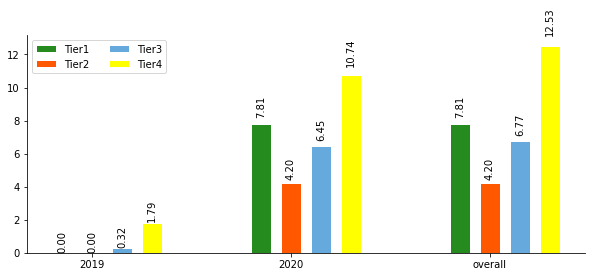

In [89]:
barWidth = 0.15

Tier_1=list(Customer_Segment["Tier1"].values)
Tier_2=list(Customer_Segment["Tier2"].values)
Tier_3=list(Customer_Segment["Tier3"].values)
Tier_4=list(Customer_Segment["Tier4"].values)

Tier1=Tier_1
Tier2=Tier_2
Tier3=Tier_3
Tier4=Tier_4
Tier5=Tier1+Tier2+Tier3+Tier4

r1 = np.arange(len(Tier1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5=r1+r2+r3+r4

fig,ax=plt.subplots(figsize=(10,4))
ax1=ax.bar(r1,Tier1,width=barWidth-0.05,color='#268b1f', edgecolor='white', label='Tier1')
ax2=ax.bar(r2,Tier2,width=barWidth-0.05,color='#ff5800', edgecolor='white', label='Tier2')
ax3=ax.bar(r3,Tier3,width=barWidth-0.05,color='#66a9dd', edgecolor='white', label='Tier3')
ax4=ax.bar(r4,Tier4,width=barWidth-0.05,color='#ffff00',       edgecolor='white', label='Tier4')

#for i in range(len(r5)):
 #   ax.text(x=r5[i]-0.1,y=Tier5[i]+0.1,s=Tier5[i])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.2f' %(height),
                ha='center', va='bottom',rotation='vertical')
autolabel(ax1)
autolabel(ax2)
autolabel(ax3)
autolabel(ax4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Tier1))], ['2019','2020','overall'])
plt.legend(ncol=2)

plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_seg.png',bbox_inches='tight',dpi=100)
plt.show()








# Order Summary

In [90]:
YTD_newdata_DS.shape

(11218, 37)

In [91]:
MTD_Order_count=YTD_newdata_DS.loc[YTD_newdata_DS["month"]==current_month]["Order ID"].nunique()
MTD_Order_count

943

In [92]:
LMTD_Order_count=YTD_newdata_DS.loc[YTD_newdata_DS["month"]==last_month]["Order ID"].nunique()
str(LMTD_Order_count)

'778'

In [93]:
YTD_Order_count=YTD_newdata_DS["Order ID"].nunique()
YTD_Order_count

4273

In [94]:
## Cancelled orders count

MTD_Cancelled_Order_count=YTD_newdata_DS.loc[(YTD_newdata_DS["month"]==current_month) & (YTD_newdata_DS["Order Status"]=="Cancelled")]["Order ID"].nunique()
MTD_Cancelled_Order_count


89

In [95]:
LMTD_Cancelled_Order_count=YTD_newdata_DS.loc[(YTD_newdata_DS["month"]==last_month) & (YTD_newdata_DS["Order Status"]=="Cancelled")]["Order ID"].nunique()
LMTD_Cancelled_Order_count

133

In [96]:
YTD_Cancelled_Order_count=YTD_newdata_DS.loc[YTD_newdata_DS["Order Status"]=="Cancelled"]["Order ID"].nunique()
YTD_Cancelled_Order_count

557

In [97]:
### Revenue loss %

MTD_newdata_DS_Cancelled=pd.DataFrame(YTD_newdata_DS.loc[(YTD_newdata_DS["month"]==current_month) &(YTD_newdata_DS["Order Status"]=="Cancelled")].groupby(["Order ID"])["Order Value"].max()).reset_index()

MTD_newdata_DS_Cancelled=(MTD_newdata_DS_Cancelled["Order Value"].sum()/10000000).round(2)
print(MTD_newdata_DS_Cancelled)

MTD_Rev_loss=str(round((MTD_newdata_DS_Cancelled/YTD_newdata_DS_current_month_rev)*100,2))+""+"%"
MTD_Rev_loss

0.31


'5.26%'

In [98]:
LMTD_newdata_DS_Cancelled=pd.DataFrame(YTD_newdata_DS.loc[(YTD_newdata_DS["month"]==last_month) &(YTD_newdata_DS["Order Status"]=="Cancelled")].groupby(["Order ID"])["Order Value"].max()).reset_index()

LMTD_newdata_DS_Cancelled=(LMTD_newdata_DS_Cancelled["Order Value"].sum()/10000000).round(2)
print(LMTD_newdata_DS_Cancelled)

LMTD_Rev_loss=str(round((LMTD_newdata_DS_Cancelled/YTD_newdata_DS_last_month_rev)*100,2))+""+"%"
LMTD_Rev_loss

0.67


'18.98%'

In [99]:
YTD_newdata_DS_Cancelled=pd.DataFrame(YTD_newdata_DS.loc[(YTD_newdata_DS["Order Status"]=="Cancelled")].groupby(["Order ID"])["Order Value"].max()).reset_index()

YTD_newdata_DS_Cancelled=(YTD_newdata_DS_Cancelled["Order Value"].sum()/10000000).round(2)
print(YTD_newdata_DS_Cancelled)

YTD_Rev_loss=str(round((YTD_newdata_DS_Cancelled/YTD_newdata_DS_YTD_month_rev)*100,2))+""+"%"
YTD_Rev_loss

4.73


'16.2%'

In [100]:
df_order_summ=pd.DataFrame()
df_order_summ[""]=["Total Orders","Cancelled Orders","Revenue loss %"]
df_order_summ["LMTD"]=[str(LMTD_Order_count),str(LMTD_Cancelled_Order_count),LMTD_Rev_loss]
df_order_summ["MTD"]=[str(MTD_Order_count),str(MTD_Cancelled_Order_count),MTD_Rev_loss]
df_order_summ["YTD"]=[str(YTD_Order_count),str(YTD_Cancelled_Order_count),YTD_Rev_loss]

df_order_summ

,,LMTD,MTD,YTD
0,Total Orders,778,943,4273
1,Cancelled Orders,133,89,557
2,Revenue loss %,18.98%,5.26%,16.2%


In [101]:
def render_mpl_table(data, col_width=3.0, row_height=0.3, font_size=7,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

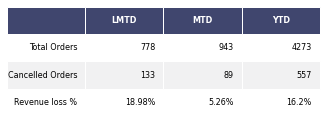

In [102]:
render_mpl_table(df_order_summ, header_columns=0, col_width=1.4,row_height=0.5, font_size=8)
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\order_summary.png',bbox_inches='tight',dpi=100)

In [103]:
img1=plt.imread(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_seg.png')
img2=plt.imread(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\order_summary.png')

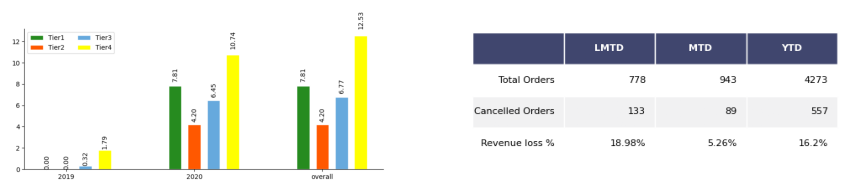

In [104]:
def axis_funct(ax1):
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1.spines["left"].set_visible(False)
    ax1.spines["bottom"].set_visible(False)

fig=plt.figure(figsize=(15,5))

ax1 = plt.subplot2grid((1,2),(0,0))
plt.imshow(img1)
#plt.title("Customer Segmentation",fontsize=14, fontweight='bold')
axis_funct(ax1)

ax1 = plt.subplot2grid((1,2),(0,1))
plt.imshow(img2)
#plt.title("Order Summary",fontsize=14, fontweight='bold')
axis_funct(ax1)

plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_seg_order_summary.png',bbox_inches='tight',dpi=100)
plt.show()

# New vs Existing Customers

In [105]:
def funct_dataframe_create(m):
    newdata_DS_M=newdata_DS_19_20[newdata_DS_19_20["MonthY"]==str(m)]
    return newdata_DS_M

In [106]:
### Empty monthwise dataframes:
dfnames = ['df0', 'df1', 'df2','df3', 'df4', 'df5']
df_new_old_cust_a= [pd.DataFrame for x in dfnames]

In [107]:
for i,a in enumerate(m_list):
    df_new_old_cust_a[i]=funct_dataframe_create(a)

In [108]:
## monthwise dataframes created:
#df_new_old_cust_a[1]

In [109]:
def new_old_customers(df,a):
    def new_cust(df):
        for i in df.unique():
            if i in a:
                var="New_Customer"
            else:
                var="Old_Customer"
        return var
    df["New Customers"]=df[["Customer Name"]].apply(new_cust,axis=1)
    df_new_old_cust_rev=pd.DataFrame(pd.DataFrame(df.groupby(["New Customers","Order ID","MonthY"])["Order Value"].max()).reset_index().groupby(["New Customers","MonthY"])["Order Value"].sum()/10000000).reset_index()
    #df_new_old_cust_rev
    df_new_old_cust_count=pd.DataFrame(df.groupby("New Customers")["Customer Name"].nunique()).reset_index()
    #df_new_old_cust_count
    df_a=pd.merge(df_new_old_cust_rev,df_new_old_cust_count)
    #df_a
    df_a=pd.DataFrame(df_a.pivot_table(index="MonthY",columns=["New Customers"],values=["Order Value","Customer Name"])).reset_index()
    return df_a
   

In [110]:
## This is to save the pivot table for each month return by the function:
dfnames = ['df_0', 'df_1', 'df_2','df_3', 'df_4', 'df_5']
df_new_old_cust_b= [pd.DataFrame for x in dfnames]

In [111]:

for i in range(len(m_list)):
    df_new_old_cust_b[i]=new_old_customers(df_new_old_cust_a[i],new_old_cust[i][0][3])
    
#df_new_old_cust_b 

In [112]:

df_new_vs_exist_cust=pd.concat(df_new_old_cust_b)
df_new_vs_exist_cust.rename(columns={"Customer Name":"Customer Count"},inplace=True)
df_new_vs_exist_cust.columns = ['_'.join(col) for col in df_new_vs_exist_cust.columns]
df_new_vs_exist_cust.rename(columns={"MonthY_":"Month",
                                     "Customer Count_New_Customer":"New_Customer_Count",
                                    "Customer Count_Old_Customer":"Old_Customer_Count",
                                    "Order Value_New_Customer":"New_Customer_Amount",
                                    "Order Value_Old_Customer":"Old_Customer_Amount"},inplace=True)
df_new_vs_exist_cust

,Month,New_Customer_Count,Old_Customer_Count,New_Customer_Amount,Old_Customer_Amount
0,Jan-20,240,121,1.566918,1.304441
0,Feb-20,220,179,4.480638,1.802688
0,Mar-20,228,209,2.131324,2.595787
0,Apr-20,171,129,3.570669,2.331543
0,May-20,278,200,1.308486,2.222924
0,Jun-20,319,271,4.274382,1.610884


In [113]:
#newdata_DS_jan2020.shape

In [114]:
'''
def new_cust(df):
    for i in df.unique():
        if i in  New_cust_DS_jan2020:
            var="New_Customer"
        else:
            var="Old_Customer"
    return var
'''


'\ndef new_cust(df):\n    for i in df.unique():\n        if i in  New_cust_DS_jan2020:\n            var="New_Customer"\n        else:\n            var="Old_Customer"\n    return var\n'

In [115]:
#newdata_DS_jan2020["New Customers"]=newdata_DS_jan2020[["Customer Name"]].apply(new_cust,axis=1)

In [116]:
#newdata_DS_jan2020[newdata_DS_jan2020["New Customers"]=="New_Customer"]["Customer Name"].nunique()

In [117]:
'''
df_jan_new_old_cust_rev=pd.DataFrame(pd.DataFrame(newdata_DS_jan2020.groupby(["New Customers","Order ID","MonthY"])["Order Value"].max()).reset_index().groupby(["New Customers","MonthY"])["Order Value"].sum()/10000000).reset_index()
df_jan_new_old_cust_rev
df_jan_new_old_cust_count=pd.DataFrame(newdata_DS_jan2020.groupby("New Customers")["Customer Name"].nunique()).reset_index()
df_jan_new_old_cust_count
df_jan=pd.merge(df_jan_new_old_cust_rev,df_jan_new_old_cust_count)
df_jan
df_jan=pd.DataFrame(df_jan.pivot_table(index="MonthY",columns=["New Customers"],values=["Order Value","Customer Name"])).reset_index()
df_jan
'''

'\ndf_jan_new_old_cust_rev=pd.DataFrame(pd.DataFrame(newdata_DS_jan2020.groupby(["New Customers","Order ID","MonthY"])["Order Value"].max()).reset_index().groupby(["New Customers","MonthY"])["Order Value"].sum()/10000000).reset_index()\ndf_jan_new_old_cust_rev\ndf_jan_new_old_cust_count=pd.DataFrame(newdata_DS_jan2020.groupby("New Customers")["Customer Name"].nunique()).reset_index()\ndf_jan_new_old_cust_count\ndf_jan=pd.merge(df_jan_new_old_cust_rev,df_jan_new_old_cust_count)\ndf_jan\ndf_jan=pd.DataFrame(df_jan.pivot_table(index="MonthY",columns=["New Customers"],values=["Order Value","Customer Name"])).reset_index()\ndf_jan\n'

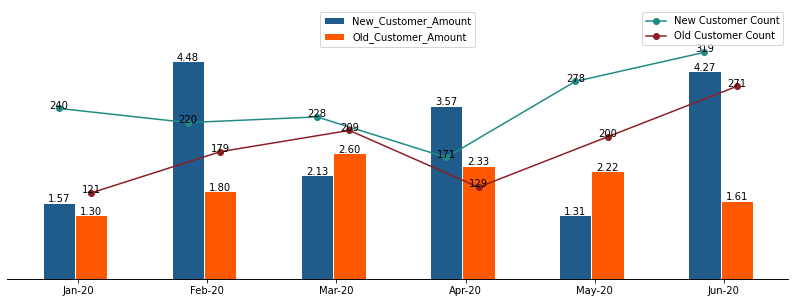

In [352]:
New_Customer_Amount=list(df_new_vs_exist_cust['New_Customer_Amount'].values)
Old_Customer_Amount=list(df_new_vs_exist_cust['Old_Customer_Amount'].values)
New_Customer_Count=list(df_new_vs_exist_cust['New_Customer_Count'].values)
Old_Customer_Count=list(df_new_vs_exist_cust['Old_Customer_Count'].values)


#customer=New_Customer_Amount+Old_Customer_Amount

r1=np.arange(len(New_Customer_Amount))
r2= [x + barWidth for x in r1]
r3= [x + barWidth for x in r2]
r4= [x + barWidth for x in r3]
#r5=r1+r2+r3+r4+r5

barWidth=0.25

fig,ax=plt.subplots(figsize=(14,5))
ax_1=ax.bar(r1,New_Customer_Amount,width=barWidth,color='#1f5c8b', edgecolor='white', label='New_Customer_Amount')
for a, v in enumerate(New_Customer_Amount):
    ax.text(a, v+0.01, "%.2f" %v, ha="center")
ax_2=ax.bar(r2,Old_Customer_Amount,width=barWidth,color='#ff5800', edgecolor='white', label='Old_Customer_Amount')
for a, v in enumerate(Old_Customer_Amount):
    ax.text(a+barWidth, v+0.01, "%.2f" %v, ha="center")
ax1=ax.twinx()
ax_3=ax1.plot(r1,New_Customer_Count,'o-',label='New Customer Count',color='#1f8b84')
for a, v in enumerate(New_Customer_Count):
    ax1.text(a, v, "%d" %v, ha="center")
ax_4=ax1.plot(r2,Old_Customer_Count,'o-',label='Old Customer Count',color='#8b1f26')
for a, v in enumerate(Old_Customer_Count):
    ax1.text(a+barWidth, v, "%d" %v, ha="center")

ax.spines["top"].set_visible(False)
ax.set_ylim(0,df_new_vs_exist_cust['New_Customer_Amount'].max()*1.25)
ax1.set_ylim(0,df_new_vs_exist_cust['New_Customer_Count'].max()*1.2)

plt.xticks([r + barWidth-0.1 for r in range(len(New_Customer_Amount))], list(df_new_vs_exist_cust["Month"]))
ax.legend(ncol=1,loc=9)
ax1.legend(ncol=1)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%2f' %(height),
                ha='center', va='bottom')

#autolabel(ax_1)
#autolabel(ax_2)



ax1.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_yticklabels([])
ax1.set_yticks([])
ax.spines["left"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax.set_yticklabels([])
ax.set_yticks([])
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\New_old_cust.png',bbox_inches='tight',dpi=100)
plt.show()

# Customer Category Summary

In [119]:
def period_fuct(df):
    if df["month"]==current_month:
        return "MTD"
    elif df["month"]==current_month-1:
        return "LMTD"
    else:
        return "YTD"

In [120]:
YTD_newdata_DS.shape

(11218, 37)

In [121]:
MTD_newdata_DS=YTD_newdata_DS[YTD_newdata_DS["month"]==current_month]
#MTD_newdata_DS.shape

In [122]:
MTD_newdata_DS["Period"]=MTD_newdata_DS.apply(lambda df:period_fuct(df),axis=1)
#MTD_newdata_DS.head()
#MTD_newdata_DS.shape

In [123]:
df_MTD=pd.DataFrame(MTD_newdata_DS.groupby(["Customer Category","Period"])["Order ID"].nunique()).reset_index()
df_MTD.rename(columns={"Order ID":"Order Count"},inplace=True)
df_MTD
df1_MTD=pd.DataFrame(MTD_newdata_DS.groupby(["Customer Category","Order ID","Period"])["Order Value"].max()).reset_index()
df1_1_MTD=pd.DataFrame(round(df1_MTD.groupby(["Customer Category","Period"])["Order Value"].sum()/10000000,2)).reset_index()
df1_1_MTD
df_MTD=df_MTD.merge(df1_1_MTD)
#df_MTD

In [124]:
MTD_newdata_w=YTD_newdata[YTD_newdata["month"]==current_month]
#MTD_newdata_w.shape
MTD_newdata_w["Period"]=MTD_newdata_w.apply(lambda df:period_fuct(df),axis=1)
#MTD_newdata_w.head()
#MTD_newdata_w.shape
df_MTD_w=pd.DataFrame(MTD_newdata_w.groupby(["Customer Category","Period"])["Order ID"].nunique()).reset_index()
df_MTD_w.rename(columns={"Order ID":"Order Count"},inplace=True)
df_MTD_w
df1_MTD_w=pd.DataFrame(MTD_newdata_w.groupby(["Customer Category","Order ID","Period"])["Order Value"].max()).reset_index()
df1_1_MTD_w=pd.DataFrame(round(df1_MTD_w.groupby(["Customer Category","Period"])["Order Value"].sum()/10000000,2)).reset_index()
df1_1_MTD_w
df_MTD_w=df_MTD_w.merge(df1_1_MTD_w)
df_MTD_w
df_MTD_w.drop(["Period","Order Count"],axis=1,inplace=True)
df_MTD=df_MTD.merge(df_MTD_w,on="Customer Category",how="inner")
df_MTD["BU%"]=round((df_MTD["Order Value_x"]/df_MTD["Order Value_y"])*100)
df_MTD=df_MTD.drop("Order Value_y",axis=1)
df_MTD=df_MTD.rename(columns={"Order Value_x":"Order Value"})
#df_MTD

In [125]:
LMTD_newdata_DS=YTD_newdata_DS[YTD_newdata_DS["month"]==last_month]
LMTD_newdata_DS.shape
LMTD_newdata_DS["Period"]=LMTD_newdata_DS.apply(lambda df:period_fuct(df),axis=1)
LMTD_newdata_DS.head()
#LMTD_newdata_DS.shape
df_LMTD=pd.DataFrame(LMTD_newdata_DS.groupby(["Customer Category","Period"])["Order ID"].nunique()).reset_index()
df_LMTD.rename(columns={"Order ID":"Order Count"},inplace=True)
df_LMTD
df1_LMTD=pd.DataFrame(LMTD_newdata_DS.groupby(["Customer Category","Order ID","Period"])["Order Value"].max()).reset_index()
df1_1_LMTD=pd.DataFrame(round(df1_LMTD.groupby(["Customer Category","Period"])["Order Value"].sum()/10000000,2)).reset_index()
df1_1_LMTD
df_LMTD=df_LMTD.merge(df1_1_LMTD)
#df_LMTD

In [126]:
LMTD_newdata_w=YTD_newdata[YTD_newdata["month"]==last_month]
LMTD_newdata_w.shape
LMTD_newdata_w["Period"]=LMTD_newdata_w.apply(lambda df:period_fuct(df),axis=1)
LMTD_newdata_w.head()
#LMTD_newdata_DS.shape
df_LMTD_w=pd.DataFrame(LMTD_newdata_w.groupby(["Customer Category","Period"])["Order ID"].nunique()).reset_index()
df_LMTD_w.rename(columns={"Order ID":"Order Count"},inplace=True)
df_LMTD_w
df1_LMTD_w=pd.DataFrame(LMTD_newdata_w.groupby(["Customer Category","Order ID","Period"])["Order Value"].max()).reset_index()
df1_1_LMTD_w=pd.DataFrame(round(df1_LMTD_w.groupby(["Customer Category","Period"])["Order Value"].sum()/10000000,2)).reset_index()
df1_1_LMTD_w
df_LMTD_w=df_LMTD_w.merge(df1_1_LMTD_w)
df_LMTD_w
df_LMTD_w.drop(["Period","Order Count"],axis=1,inplace=True)
df_LMTD=df_LMTD.merge(df_LMTD_w,on="Customer Category",how="inner")
df_LMTD["BU%"]=round((df_LMTD["Order Value_x"]/df_LMTD["Order Value_y"])*100)
df_LMTD=df_LMTD.drop("Order Value_y",axis=1)
df_LMTD=df_LMTD.rename(columns={"Order Value_x":"Order Value"})
#df_LMTD

In [127]:
YTD_newdata_DS["Period"]="YTD"
YTD_newdata_DS.shape
df_YTD=pd.DataFrame(YTD_newdata_DS.groupby(["Customer Category","Period"])["Order ID"].nunique()).reset_index()
df_YTD.rename(columns={"Order ID":"Order Count"},inplace=True)
df_YTD
df1_YTD=pd.DataFrame(YTD_newdata_DS.groupby(["Customer Category","Order ID","Period"])["Order Value"].max()).reset_index()
df1_1_YTD=pd.DataFrame(round(df1_YTD.groupby(["Customer Category","Period"])["Order Value"].sum()/10000000,2)).reset_index()
df1_1_YTD
df_YTD=df_YTD.merge(df1_1_YTD)
#df_YTD

In [128]:
YTD_newdata["Period"]="YTD"
YTD_newdata.shape
df_YTD_w=pd.DataFrame(YTD_newdata.groupby(["Customer Category","Period"])["Order ID"].nunique()).reset_index()
df_YTD_w.rename(columns={"Order ID":"Order Count"},inplace=True)
df_YTD_w
df1_YTD_w=pd.DataFrame(YTD_newdata.groupby(["Customer Category","Order ID","Period"])["Order Value"].max()).reset_index()
df1_1_YTD_w=pd.DataFrame(round(df1_YTD_w.groupby(["Customer Category","Period"])["Order Value"].sum()/10000000,2)).reset_index()
df1_1_YTD_w
df_YTD_w=df_YTD_w.merge(df1_1_YTD_w)
df_YTD_w
df_YTD_w.drop(["Period","Order Count"],axis=1,inplace=True)
df_YTD=df_YTD.merge(df_YTD_w,on="Customer Category",how="inner")
df_YTD["BU%"]=round((df_YTD["Order Value_x"]/df_YTD["Order Value_y"])*100)
df_YTD=df_YTD.drop("Order Value_y",axis=1)
df_YTD=df_YTD.rename(columns={"Order Value_x":"Order Value"})
#df_YTD

In [129]:
df_cust_cat=df_LMTD.append([df_MTD,df_YTD],ignore_index=True)
#df_cust_cat

In [130]:
df_cust_cat=pd.pivot_table(data=df_cust_cat,index="Customer Category",columns="Period",values=["Order Count","Order Value","BU%"])
#df_cust_cat.fillna(0,inplace=True)
#df_cust_cat

In [131]:
df_cust_cat.fillna(0,inplace=True)
df_cust_cat

BU%               Order Count         \
Period                             LMTD    MTD    YTD        LMTD    MTD   
Customer Category                                                          
Dental Center                      13.0   38.0   23.0       128.0  176.0   
Doctor / Medical Professional      25.0   76.0   50.0       181.0  255.0   
General                            87.0    3.0   31.0        22.0   17.0   
Healthcare Professionals            0.0    3.0    3.0         1.0    6.0   
Hospital / Medical Establishment   20.0   47.0   21.0       213.0  257.0   
Medical Suppliers / Resellers      38.0   13.0   33.0       186.0  177.0   
Proprietary / Partnership / Comp   50.0   30.0   29.0        27.0   17.0   
Trade Buyers/Resellers/Distrib    100.0  100.0   41.0        20.0   38.0   
Vendor                              0.0    0.0  100.0         0.0    0.0   

                                         Order Value               
Period                               YTD        LMTD   MTD    YTD  
Customer Category                                                  
Dental Center                      665.0        0.09  0.11   0.69  
Doctor / Medical Professional      965.0        0.31  0.38   3.37  
General                            117.0        0.35  0.06   1.28  
Healthcare Professionals            16.0        0.00  0.01   0.02  
Hospital / Medical Establishment  1527.0        1.44  4.35  14.23  
Medical Suppliers / Resellers      832.0        1.10  0.76   8.89  
Proprietary / Partnership / Comp    72.0        0.13  0.03   0.27  
Trade Buyers/Resellers/Distrib      74.0        0.11  0.19   0.39  
Vendor                               5.0        0.00  0.00   0.06

In [132]:
df_cust_cat=df_cust_cat.reset_index()
#df_cust_cat

In [133]:
#df_cust_cat.columns

In [134]:
df_cust_cat=pd.DataFrame(df_cust_cat,columns=[df_cust_cat.columns[0],df_cust_cat.columns[4],df_cust_cat.columns[7],df_cust_cat.columns[1],
                                                     df_cust_cat.columns[5],df_cust_cat.columns[8],df_cust_cat.columns[2],
                                                     df_cust_cat.columns[6],df_cust_cat.columns[9],df_cust_cat.columns[3]])
df_cust_cat

,Customer Category,Order Count,Order Value,BU%,Order Count,Order Value,BU%,Order Count,Order Value,BU%
Period,,LMTD,LMTD,LMTD,MTD,MTD,MTD,YTD,YTD,YTD
0,Dental Center,128.0,0.09,13.0,176.0,0.11,38.0,665.0,0.69,23.0
1,Doctor / Medical Professional,181.0,0.31,25.0,255.0,0.38,76.0,965.0,3.37,50.0
2,General,22.0,0.35,87.0,17.0,0.06,3.0,117.0,1.28,31.0
3,Healthcare Professionals,1.0,0.00,0.0,6.0,0.01,3.0,16.0,0.02,3.0
4,Hospital / Medical Establishment,213.0,1.44,20.0,257.0,4.35,47.0,1527.0,14.23,21.0
5,Medical Suppliers / Resellers,186.0,1.10,38.0,177.0,0.76,13.0,832.0,8.89,33.0
6,Proprietary / Partnership / Comp,27.0,0.13,50.0,17.0,0.03,30.0,72.0,0.27,29.0
7,Trade Buyers/Resellers/Distrib,20.0,0.11,100.0,38.0,0.19,100.0,74.0,0.39,41.0
8,Vendor,0.0,0.00,0.0,0.0,0.00,0.0,5.0,0.06,100.0


In [135]:
df_cust_cat["Customer Category"]=df_cust_cat["Customer Category"].replace(["Doctor / Medical Professional"],["Doctor"])
df_cust_cat["Customer Category"]=df_cust_cat["Customer Category"].replace(["Hospital / Medical Establishment"],["Hospital"])
df_cust_cat["Customer Category"]=df_cust_cat["Customer Category"].replace(["Medical Suppliers / Resellers"],["Medical Suppliers"])
df_cust_cat["Customer Category"]=df_cust_cat["Customer Category"].replace(["Proprietary / Partnership / Comp"],["Proprietary"])
df_cust_cat["Customer Category"]=df_cust_cat["Customer Category"].replace(["Trade Buyers/Resellers/Distrib"],["Trade Buyers"])
df_cust_cat["Order Count"]=df_cust_cat["Order Count"].astype(int)
df_cust_cat

,Customer Category,Order Count,Order Value,BU%,Order Count,Order Value,BU%,Order Count,Order Value,BU%
Period,,LMTD,LMTD,LMTD,MTD,MTD,MTD,YTD,YTD,YTD
0,Dental Center,128,0.09,13.0,176,0.11,38.0,665,0.69,23.0
1,Doctor,181,0.31,25.0,255,0.38,76.0,965,3.37,50.0
2,General,22,0.35,87.0,17,0.06,3.0,117,1.28,31.0
3,Healthcare Professionals,1,0.00,0.0,6,0.01,3.0,16,0.02,3.0
4,Hospital,213,1.44,20.0,257,4.35,47.0,1527,14.23,21.0
5,Medical Suppliers,186,1.10,38.0,177,0.76,13.0,832,8.89,33.0
6,Proprietary,27,0.13,50.0,17,0.03,30.0,72,0.27,29.0
7,Trade Buyers,20,0.11,100.0,38,0.19,100.0,74,0.39,41.0
8,Vendor,0,0.00,0.0,0,0.00,0.0,5,0.06,100.0


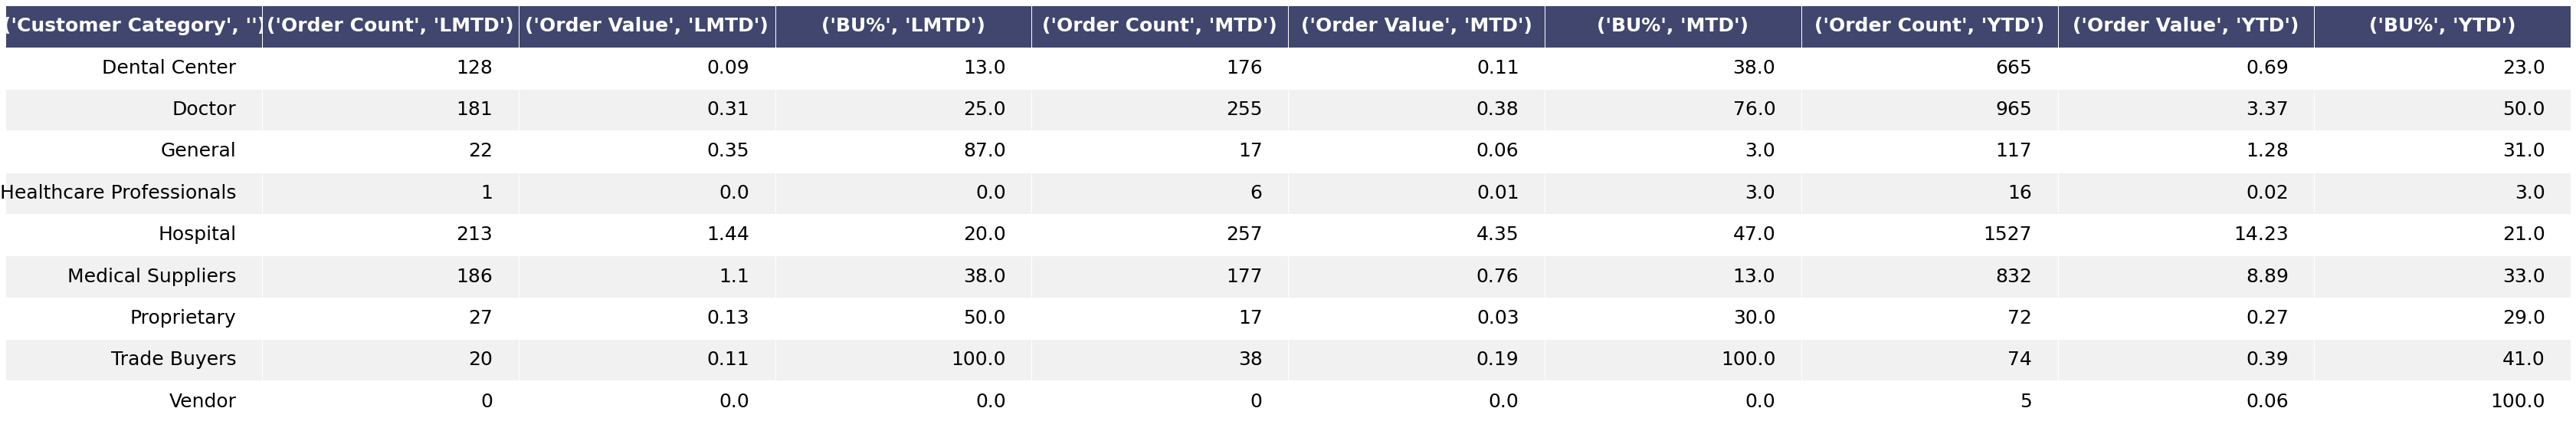

In [136]:
render_mpl_table(df_cust_cat, header_columns=0, col_width=6,font_size=25,row_height=1)
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_cat_summ.png',bbox_inches='tight',dpi=100)

# Market Analysis

In [137]:
YTD_newdata_DS.shape

(11218, 38)

In [138]:
df_state_1=pd.DataFrame(YTD_newdata_DS.groupby(["State"])["Order ID"].nunique()).reset_index()
df_state_1
df_state_overall=pd.DataFrame(YTD_newdata.groupby(["State"])["Order ID"].nunique()).reset_index()

df_state_1=df_state_1.merge(df_state_overall,on="State",how='inner')
df_state_1["Orders%"]=round((df_state_1["Order ID_x"])/(df_state_1["Order ID_y"])*100)

df_state_1=df_state_1.drop("Order ID_y",axis=1).rename(columns={"Order ID_x":"Orders"})
#df_state_1


In [139]:
df_state_cust=pd.DataFrame(YTD_newdata_DS.groupby(["State"])["Customer Name"].nunique()).reset_index()
df_state_cust
df_state_cust_overall=pd.DataFrame(YTD_newdata.groupby(["State"])["Customer Name"].nunique()).reset_index()

df_state_cust=df_state_cust.merge(df_state_cust_overall,on="State",how='inner')
df_state_cust["Customer%"]=round((df_state_cust["Customer Name_x"]/df_state_cust["Customer Name_y"])*100)
df_state_cust=df_state_cust.drop("Customer Name_y",axis=1).rename(columns={"Customer Name_x":"Customers"})
#df_state_cust

In [140]:
df_state_amt_1=pd.DataFrame(YTD_newdata_DS.groupby(["State","Order ID"])["Order Value"].max()).reset_index()
df_state_amt_1=pd.DataFrame(round(df_state_amt_1.groupby(["State"])["Order Value"].sum()/10000000,2)).reset_index()
df_state_amt_1
df_state_amt_overall=pd.DataFrame(YTD_newdata.groupby(["State","Order ID"])["Order Value"].max()).reset_index()
df_state_amt_overall=pd.DataFrame(round(df_state_amt_overall.groupby(["State"])["Order Value"].sum()/10000000,2)).reset_index()

df_state_amt_1=df_state_amt_1.merge(df_state_amt_overall,on="State",how='inner')
df_state_amt_1["Amount%"]=round((df_state_amt_1["Order Value_x"]/df_state_amt_1["Order Value_y"])*100)
df_state_amt_1=df_state_amt_1.drop('Order Value_y',axis=1).rename(columns={"Order Value_x":'Amount'})
#df_state_amt_1

In [141]:
df_state=df_state_amt_1.merge(df_state_1,on="State",how='inner')
df_state=df_state.merge(df_state_cust,on="State",how='inner')
df_state.sort_values(by="Amount",ascending=False,inplace=True)
df_state.fillna(0,inplace=True)
df_state=pd.DataFrame(df_state,columns=[df_state.columns[0],df_state.columns[1],
                                       df_state.columns[3],df_state.columns[5],
                                       df_state.columns[2],df_state.columns[4],
                                       df_state.columns[6]])
#df_state["Contribution"]="Contribution"

In [142]:
#df_state_pvt=pd.pivot_table(df_state,index="State",columns=["Contribution"],values=["Amount%","Orders%","Customer%"])

In [143]:
#df_state_pvt

In [144]:
#df_state_aoc=df_state[["State","Amount","Orders","Customers"]]
#df_state_aoc["Values"]=' '
#df_state_aoc=pd.pivot_table(df_state_aoc,index="State",columns=["Values"],values=["Amount","Orders","Customers"])
#df_state_aoc

In [145]:
#df_state_aoc_pvt=df_state_aoc.merge(df_state_pvt,on="State",how='inner')
#df_state_aoc_pvt.reset_index(inplace=True)

In [146]:
#df_state_aoc_pvt=df_state_aoc_pvt.sortlevel()

In [147]:
#df_state_aoc_pvt.columns

In [148]:
df_state_1=df_state.style.applymap(lambda x: f"color:{'red'if isinstance(x,(int)) else 'black'}")

df_state_1

,State,Amount,Orders,Customers,Amount%,Orders%,Customer%
20,MAHARASHTRA,6.21,673,265,29,39,41
10,GUJARAT,3.26,144,61,25,75,71
35,UTTAR PRADESH,3.13,261,94,83,62,63
8,DELHI,2.57,163,42,14,37,33
30,TAMIL NADU,2.38,645,201,58,82,78
38,WEST BENGAL,2.18,711,316,35,81,79
28,PUNJAB,1.76,57,17,86,61,39
15,KARNATAKA,1.62,315,142,10,20,62
4,BIHAR,1.31,246,80,78,80,80
3,ASSAM,1.17,315,98,92,95,92


In [149]:
#html=df_state_1.render()
#imgkit.from_string(html, 'styled_table_state.png')

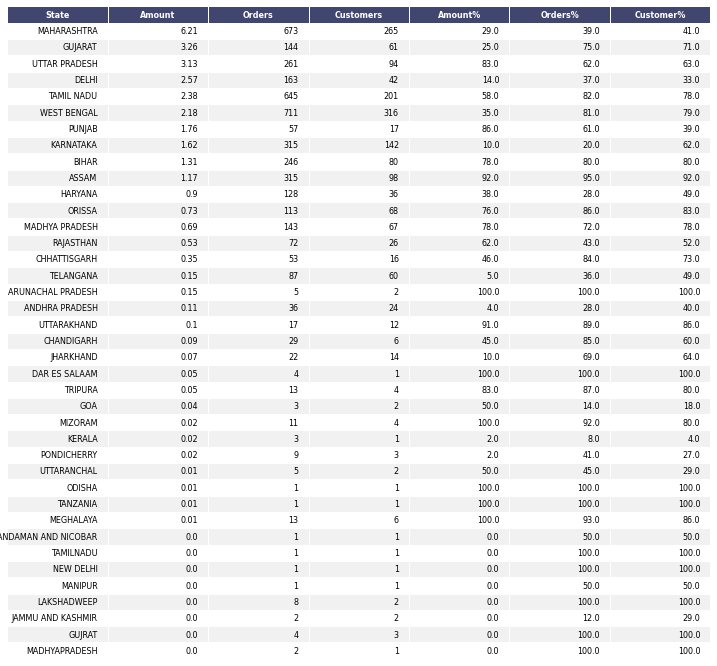

In [150]:
render_mpl_table(df_state, header_columns=0, col_width=1.8,font_size=8)
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\state_rev.png',bbox_inches='tight',dpi=100)

## Top 10 Customers By Revenue

In [151]:
YTD_newdata_DS.shape

(11218, 38)

In [152]:
top_cust_1=pd.DataFrame(YTD_newdata_DS.groupby(["Customer Name","Order ID"])["Order Value"].max()).reset_index()
top_cust_1=pd.DataFrame((top_cust_1.groupby(["Customer Name"])["Order Value"].sum()/10000000)).reset_index()

top_cust_1
total_value=top_cust_1["Order Value"].sum().round(2)
total_value
top_cust_1["BU"]=round((top_cust_1["Order Value"]/total_value)*100,2)
top_cust_1
top_cust_1.sort_values(by="Order Value",ascending=False,inplace=True)
top_cust_1=top_cust_1.iloc[0:10]
top_cust_1
#YTD_newdata_DS.groupby(["Customer Name","BDE Name"])["Order ID"].nunique()

,Customer Name,Order Value,BU
232,district hospital,3.540000,12.12
1043,maan pharmaceuticals,2.822191,9.67
233,diwan enterprises,1.449254,4.96
185,cii foundation,0.866763,2.97
903,india bio medical pvt ltd,0.799688,2.74
1604,vaishnavi medicose,0.790545,2.71
1452,shubhan enterprises,0.658782,2.26
1585,tulsi pharma,0.560500,1.92
1628,vituscare medlife pvt ltd,0.521587,1.79
188,civil hospital beed,0.425594,1.46


In [153]:
 ### Customer wise BDE

In [154]:
YTD_DS_Customers=YTD_newdata_DS[["Customer Name","BDE Name"]]
YTD_DS_Customers_1=YTD_DS_Customers.drop_duplicates(subset=["Customer Name","BDE Name"],keep='first')
YTD_DS_Customers_1[YTD_DS_Customers_1["Customer Name"]=="vituscare medlife pvt ltd"]

,Customer Name,BDE Name
6650,vituscare medlife pvt ltd,Mohd Junaid
10033,vituscare medlife pvt ltd,Subrat Foujdar


In [155]:
top_cust_BDE=top_cust_1.merge(YTD_DS_Customers_1,on="Customer Name",how="inner")
top_cust_BDE=top_cust_BDE[["Customer Name","BDE Name"]]
top_cust_BDE

,Customer Name,BDE Name
0,district hospital,Abhishek Ahirrao
1,maan pharmaceuticals,Keny Soni
2,diwan enterprises,Mukul Gupta
3,cii foundation,Prosenjit Sen
4,india bio medical pvt ltd,Subhrajit Ghosh
5,vaishnavi medicose,Abhishek Shrivastava
6,shubhan enterprises,Prakash R
7,tulsi pharma,Prosenjit Sen
8,vituscare medlife pvt ltd,Mohd Junaid
9,vituscare medlife pvt ltd,Subrat Foujdar


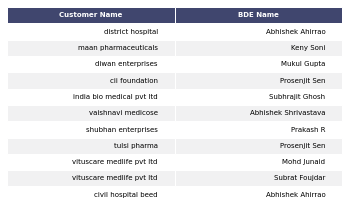

In [156]:


render_mpl_table(top_cust_BDE, header_columns=0, col_width=3.0)
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\top_cust_BDE.png',bbox_inches='tight',dpi=100)

In [157]:
YTD_newdata.shape

(38760, 36)

In [158]:
top_cust_o=pd.DataFrame(YTD_newdata.groupby(["Customer Name","Order ID"])["Order Value"].max()).reset_index()
top_cust_o=pd.DataFrame(top_cust_o.groupby("Customer Name")["Order Value"].sum()/10000000).reset_index()
top_cust_o["Overall"]=round(top_cust_o["Order Value"]/(top_cust_o["Order Value"].sum())*100,2)
top_cust_o

,Customer Name,Order Value,Overall
0,.r.r. surgico,0.326315,0.30
1,32 pearls,0.000252,0.00
2,5 afdc,0.033950,0.03
3,7med india pvt. ltd,0.071230,0.06
4,7med new delhi-primus hospital,0.001977,0.00
...,...,...,...
2686,zi systech private limited,0.008901,0.01
2687,ziaur rahman,0.000079,0.00
2688,zimmer india pvt ltd,0.054711,0.05
2689,zohlimpuii khiangte,0.004802,0.00


In [159]:
top_cust=top_cust_1.merge(top_cust_o,on="Customer Name",how="inner")

In [160]:
top_cust.sort_values(by="Order Value_x",ascending=False,inplace=True)
top_cust=top_cust.iloc[0:10]
top_cust=top_cust.drop("Order Value_y",axis=1).rename(columns={"Order Value_x":"Order Value"})
top_cust

,Customer Name,Order Value,BU,Overall
0,district hospital,3.540000,12.12,3.22
1,maan pharmaceuticals,2.822191,9.67,6.75
2,diwan enterprises,1.449254,4.96,1.41
3,cii foundation,0.866763,2.97,0.79
4,india bio medical pvt ltd,0.799688,2.74,0.84
5,vaishnavi medicose,0.790545,2.71,0.72
6,shubhan enterprises,0.658782,2.26,0.60
7,tulsi pharma,0.560500,1.92,0.51
8,vituscare medlife pvt ltd,0.521587,1.79,0.47
9,civil hospital beed,0.425594,1.46,0.39


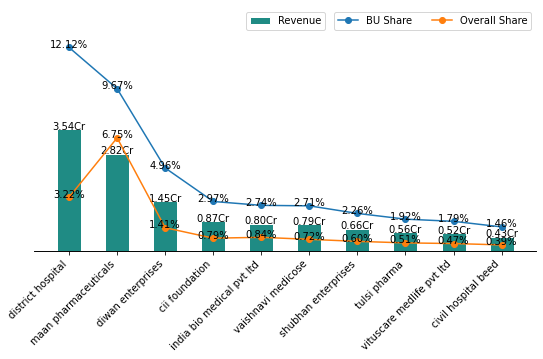

In [161]:
barWidth=0.5

Revenue=list(top_cust["Order Value"].values)
BU_Share=list(top_cust["BU"].values)
Overall_Contribution=list(top_cust["Overall"].values)

r1=np.arange(len(Revenue))
r2= [x  for x in r1]
r3= [x  for x in r2]

fig,ax=plt.subplots(figsize=(9,5))
ax_1=ax.bar(r1,Revenue,width=barWidth,color='#1f8b84',edgecolor="White",label="Revenue")
for a, v in enumerate(Revenue):
    ax.text(a, v, "%.2f" %v+"Cr", ha="center")
ax1=ax.twinx()
ax_2=ax1.plot(r2,BU_Share,'o-',label="BU Share")
for a, v in enumerate(BU_Share):
    ax1.text(a, v, "%.2f" %v+"%", ha="center")
ax_3=ax1.plot(r3,Overall_Contribution,'o-',label="Overall Share")
for a, v in enumerate(Overall_Contribution):
    ax1.text(a, v, "%.2f" %v+"%", ha="center")
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_ylim(0,top_cust["Order Value"].max()*2)
ax.legend(ncol=1,loc=9)
ax1.spines["top"].set_visible(False)
ax1.set_ylim(0,top_cust["BU"].max()*1.2)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.legend(ncol=2)
ax1.set_yticklabels([])
ax1.set_yticks([])
ax.set_yticklabels([])
ax.set_yticks([])
plt.xticks([r  for r in range(len(Revenue))], (list(top_cust["Customer Name"])))
fig.autofmt_xdate(rotation=45)
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\top_cust_rev.png',bbox_inches='tight',dpi=100)
plt.show()


In [162]:
img1=plt.imread(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\top_cust_rev.png')
img2=plt.imread(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\top_cust_BDE.png')

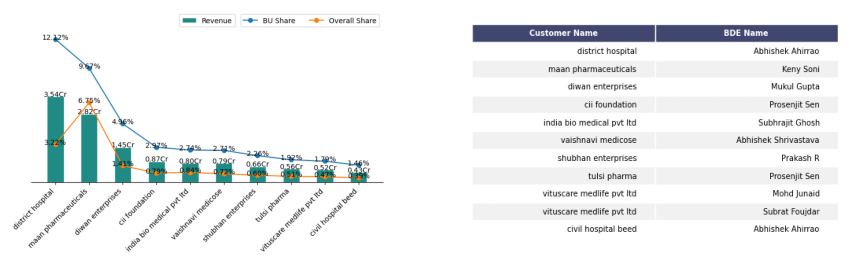

In [163]:
def axis_funct(ax1):
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1.spines["left"].set_visible(False)
    ax1.spines["bottom"].set_visible(False)

fig=plt.figure(figsize=(15,5))

ax1 = plt.subplot2grid((1,2),(0,0))
plt.imshow(img1)
axis_funct(ax1)

ax1 = plt.subplot2grid((1,2),(0,1))
plt.imshow(img2)
axis_funct(ax1)

plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_rev_BDE.png',bbox_inches='tight',dpi=100)
plt.show()

# Top customers contribution and wallet share

In [164]:
top_cust

,Customer Name,Order Value,BU,Overall
0,district hospital,3.540000,12.12,3.22
1,maan pharmaceuticals,2.822191,9.67,6.75
2,diwan enterprises,1.449254,4.96,1.41
3,cii foundation,0.866763,2.97,0.79
4,india bio medical pvt ltd,0.799688,2.74,0.84
5,vaishnavi medicose,0.790545,2.71,0.72
6,shubhan enterprises,0.658782,2.26,0.60
7,tulsi pharma,0.560500,1.92,0.51
8,vituscare medlife pvt ltd,0.521587,1.79,0.47
9,civil hospital beed,0.425594,1.46,0.39


In [165]:
list(top_cust["Customer Name"])

['district hospital',
 'maan pharmaceuticals',
 'diwan enterprises',
 'cii foundation',
 'india bio medical pvt ltd',
 'vaishnavi medicose',
 'shubhan enterprises',
 'tulsi pharma',
 'vituscare medlife pvt ltd',
 'civil hospital beed']

In [166]:
YTD_newdata_DS.columns

Index(['Order ID', 'Order Date', 'Order Status', 'Organic/Inorganic',
       'BDE Name', 'Department', 'Vertical', 'Customer Name', 'Customer Email',
       'Customer Telephone', 'Active/Inactive', 'Customer Category',
       'Product Name', 'SKU', 'Product Category', 'Product Rate',
       'Qty Ordered', 'Qty Invoiced', 'Qty Cancelled', 'Qty Shipped',
       'Qty Delivered', 'Qty Refunded', 'Fulfilment Center', 'State', 'City',
       'Postcode', 'AWB Number', 'Comment', 'Tag', 'Carrier type', 'Zone',
       'Shipment Date', 'Order Value', 'month', 'month_str', 'year', 'MonthY',
       'Period'],
      dtype='object')

In [167]:
df_cust_BU_WS=newdata_DS_19_20[(newdata_DS_19_20["Customer Name"]==top_cust["Customer Name"][0])]
df_cust_BU_WS=df_cust_BU_WS.append([newdata_DS_19_20[(newdata_DS_19_20["Customer Name"]==top_cust["Customer Name"][1])],
                     newdata_DS_19_20[(newdata_DS_19_20["Customer Name"]==top_cust["Customer Name"][2])],
                     newdata_DS_19_20[(newdata_DS_19_20["Customer Name"]==top_cust["Customer Name"][3])],
                     newdata_DS_19_20[(newdata_DS_19_20["Customer Name"]==top_cust["Customer Name"][4])]])
df_cust_BU_WS.shape

(85, 37)

In [168]:
df_cust_BU_WS[df_cust_BU_WS["Customer Name"]=='diwan enterprises']["month"].min()

1.0

In [169]:
df_cust_BU_WS_1=pd.DataFrame(df_cust_BU_WS.groupby(["Customer Name","MonthY","month","Order ID"])["Order Value"].max()).reset_index()
df_cust_BU_WS_2=pd.DataFrame(round(df_cust_BU_WS_1.groupby(["Customer Name","MonthY","month"])["Order Value"].sum()/10000000,2)).reset_index()
#df_cust_BU_WS_2.sort_values(["Order Value","month"],ascending=[False,True])
df_cust_BU_WS_2

,Customer Name,MonthY,month,Order Value
0,cii foundation,Apr-20,4.0,0.87
1,district hospital,Jun-20,6.0,3.54
2,diwan enterprises,Apr-20,4.0,0.63
3,diwan enterprises,Feb-20,2.0,0.53
4,diwan enterprises,Jan-20,1.0,0.02
5,diwan enterprises,Mar-20,3.0,0.19
6,diwan enterprises,May-20,5.0,0.07
7,india bio medical pvt ltd,Apr-20,4.0,0.18
8,india bio medical pvt ltd,Feb-20,2.0,0.17
9,india bio medical pvt ltd,Mar-20,3.0,0.44


In [170]:
df_cust_BU_WS_2["%"]=((df_cust_BU_WS_2["Order Value"]/total_value)*100).round(2)
df_cust_BU_WS_2

,Customer Name,MonthY,month,Order Value,%
0,cii foundation,Apr-20,4.0,0.87,2.98
1,district hospital,Jun-20,6.0,3.54,12.12
2,diwan enterprises,Apr-20,4.0,0.63,2.16
3,diwan enterprises,Feb-20,2.0,0.53,1.82
4,diwan enterprises,Jan-20,1.0,0.02,0.07
5,diwan enterprises,Mar-20,3.0,0.19,0.65
6,diwan enterprises,May-20,5.0,0.07,0.24
7,india bio medical pvt ltd,Apr-20,4.0,0.18,0.62
8,india bio medical pvt ltd,Feb-20,2.0,0.17,0.58
9,india bio medical pvt ltd,Mar-20,3.0,0.44,1.51


In [171]:
df_cust_BU_WS_2["Customer Name"].unique()

array(['cii foundation', 'district hospital', 'diwan enterprises',
       'india bio medical pvt ltd', 'maan pharmaceuticals'], dtype=object)

In [172]:
df_cust_BU_WS_3=pd.DataFrame(df_cust_BU_WS_2.groupby(["Customer Name"])["month"].min()).reset_index()
df_cust_BU_WS_3

,Customer Name,month
0,cii foundation,4.0
1,district hospital,6.0
2,diwan enterprises,1.0
3,india bio medical pvt ltd,2.0
4,maan pharmaceuticals,2.0


In [173]:
df_cust_BU_WS_4=pd.DataFrame(df_cust_BU_WS_2.groupby(["Customer Name","month"])["Order Value"].min()).reset_index()
df_cust_BU_WS_4

,Customer Name,month,Order Value
0,cii foundation,4.0,0.87
1,district hospital,6.0,3.54
2,diwan enterprises,1.0,0.02
3,diwan enterprises,2.0,0.53
4,diwan enterprises,3.0,0.19
5,diwan enterprises,4.0,0.63
6,diwan enterprises,5.0,0.07
7,india bio medical pvt ltd,2.0,0.17
8,india bio medical pvt ltd,3.0,0.44
9,india bio medical pvt ltd,4.0,0.18


In [174]:
df_cust_BU_WS_5=df_cust_BU_WS_3.merge(df_cust_BU_WS_4,on=["Customer Name","month"],how='inner')
df_cust_BU_WS_5

,Customer Name,month,Order Value
0,cii foundation,4.0,0.87
1,district hospital,6.0,3.54
2,diwan enterprises,1.0,0.02
3,india bio medical pvt ltd,2.0,0.17
4,maan pharmaceuticals,2.0,2.70


In [175]:
df_cust_BU_WS=df_cust_BU_WS_2.merge(df_cust_BU_WS_5,on="Customer Name",how='left')
df_cust_BU_WS.rename(columns={"month_x":"month","Order Value_x":"Order Value","month_y":"Enroll Month","Order Value_y":"EM_Order Value"},inplace=True)

In [176]:
df_cust_BU_WS["WS%"]=round((df_cust_BU_WS["Order Value"]/df_cust_BU_WS["EM_Order Value"])*100,2)
df_cust_BU_WS

,Customer Name,MonthY,month,Order Value,%,Enroll Month,EM_Order Value,WS%
0,cii foundation,Apr-20,4.0,0.87,2.98,4.0,0.87,100.00
1,district hospital,Jun-20,6.0,3.54,12.12,6.0,3.54,100.00
2,diwan enterprises,Apr-20,4.0,0.63,2.16,1.0,0.02,3150.00
3,diwan enterprises,Feb-20,2.0,0.53,1.82,1.0,0.02,2650.00
4,diwan enterprises,Jan-20,1.0,0.02,0.07,1.0,0.02,100.00
5,diwan enterprises,Mar-20,3.0,0.19,0.65,1.0,0.02,950.00
6,diwan enterprises,May-20,5.0,0.07,0.24,1.0,0.02,350.00
7,india bio medical pvt ltd,Apr-20,4.0,0.18,0.62,2.0,0.17,105.88
8,india bio medical pvt ltd,Feb-20,2.0,0.17,0.58,2.0,0.17,100.00
9,india bio medical pvt ltd,Mar-20,3.0,0.44,1.51,2.0,0.17,258.82


In [177]:
df_cust_BU_WS_final=pd.DataFrame(pd.pivot_table(df_cust_BU_WS,index="Customer Name",columns=["MonthY"],values=["%","WS%"])).reset_index()

In [178]:
df_cust_BU_WS_final

Customer Name      %                                     \
MonthY                            Apr-20 Feb-20 Jan-20 Jun-20 Mar-20 May-20   
0                  cii foundation   2.98    NaN    NaN    NaN    NaN    NaN   
1               district hospital    NaN    NaN    NaN  12.12    NaN    NaN   
2               diwan enterprises   2.16   1.82   0.07    NaN   0.65   0.24   
3       india bio medical pvt ltd   0.62   0.58    NaN    NaN   1.51   0.00   
4            maan pharmaceuticals    NaN   9.25    NaN    NaN   0.41    NaN   

            WS%                                       
MonthY   Apr-20  Feb-20 Jan-20 Jun-20  Mar-20 May-20  
0        100.00     NaN    NaN    NaN     NaN    NaN  
1           NaN     NaN    NaN  100.0     NaN    NaN  
2       3150.00  2650.0  100.0    NaN  950.00  350.0  
3        105.88   100.0    NaN    NaN  258.82    0.0  
4           NaN   100.0    NaN    NaN    4.44    NaN

In [179]:
df_cust_BU_WS_final.columns

MultiIndex([('Customer Name',       ''),
            (            '%', 'Apr-20'),
            (            '%', 'Feb-20'),
            (            '%', 'Jan-20'),
            (            '%', 'Jun-20'),
            (            '%', 'Mar-20'),
            (            '%', 'May-20'),
            (          'WS%', 'Apr-20'),
            (          'WS%', 'Feb-20'),
            (          'WS%', 'Jan-20'),
            (          'WS%', 'Jun-20'),
            (          'WS%', 'Mar-20'),
            (          'WS%', 'May-20')],
           names=[None, 'MonthY'])

In [180]:
df_cust_BU_WS_final=pd.DataFrame(df_cust_BU_WS_final,columns=[df_cust_BU_WS_final.columns[0],df_cust_BU_WS_final.columns[3],df_cust_BU_WS_final.columns[9],
            df_cust_BU_WS_final.columns[2],df_cust_BU_WS_final.columns[8],
            df_cust_BU_WS_final.columns[5],df_cust_BU_WS_final.columns[11],
            df_cust_BU_WS_final.columns[1],df_cust_BU_WS_final.columns[7],
            df_cust_BU_WS_final.columns[6],df_cust_BU_WS_final.columns[12],
            df_cust_BU_WS_final.columns[4],df_cust_BU_WS_final.columns[10]])
df_cust_BU_WS_final


,Customer Name,%,WS%,%,WS%,%,WS%,%,WS%,%,WS%,%,WS%
MonthY,,Jan-20,Jan-20,Feb-20,Feb-20,Mar-20,Mar-20,Apr-20,Apr-20,May-20,May-20,Jun-20,Jun-20
0,cii foundation,NaN,NaN,NaN,NaN,NaN,NaN,2.98,100.00,NaN,NaN,NaN,NaN
1,district hospital,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.12,100.0
2,diwan enterprises,0.07,100.0,1.82,2650.0,0.65,950.00,2.16,3150.00,0.24,350.0,NaN,NaN
3,india bio medical pvt ltd,NaN,NaN,0.58,100.0,1.51,258.82,0.62,105.88,0.00,0.0,NaN,NaN
4,maan pharmaceuticals,NaN,NaN,9.25,100.0,0.41,4.44,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
df_cust_BU_WS_final.fillna(' ',inplace=True)

In [182]:
df_cust_BU_WS_final

,Customer Name,%,WS%,%,WS%,%,WS%,%,WS%,%,WS%,%,WS%
MonthY,,Jan-20,Jan-20,Feb-20,Feb-20,Mar-20,Mar-20,Apr-20,Apr-20,May-20,May-20,Jun-20,Jun-20
0,cii foundation,,,,,,,2.98,100,,,,
1,district hospital,,,,,,,,,,,12.12,100
2,diwan enterprises,0.07,100,1.82,2650,0.65,950,2.16,3150,0.24,350,,
3,india bio medical pvt ltd,,,0.58,100,1.51,258.82,0.62,105.88,0,0,,
4,maan pharmaceuticals,,,9.25,100,0.41,4.44,,,,,,


In [183]:
top_cust_5=top_cust[0:5]
top_cust_5["%"]='%'
#top_cust_5=top_cust_5.drop("Order Value",axis=1)


In [184]:
top_cust_5=pd.pivot_table(top_cust_5,index=["Customer Name"],columns=["%"],values=["BU","Overall"])
top_cust_5

,BU,Overall
%,%,%
Customer Name,,
cii foundation,2.97,0.79
district hospital,12.12,3.22
diwan enterprises,4.96,1.41
india bio medical pvt ltd,2.74,0.84
maan pharmaceuticals,9.67,6.75


In [185]:
df_cust_BU_WS_final_1=top_cust_5.merge(df_cust_BU_WS_final,on="Customer Name",how="inner")
df_cust_BU_WS_final_1

,Customer Name,BU,Overall,%,WS%,%,WS%,%,WS%,%,WS%,%,WS%,%,WS%
%,,%,%,Jan-20,Jan-20,Feb-20,Feb-20,Mar-20,Mar-20,Apr-20,Apr-20,May-20,May-20,Jun-20,Jun-20
0,cii foundation,2.97,0.79,,,,,,,2.98,100,,,,
1,district hospital,12.12,3.22,,,,,,,,,,,12.12,100
2,diwan enterprises,4.96,1.41,0.07,100,1.82,2650,0.65,950,2.16,3150,0.24,350,,
3,india bio medical pvt ltd,2.74,0.84,,,0.58,100,1.51,258.82,0.62,105.88,0,0,,
4,maan pharmaceuticals,9.67,6.75,,,9.25,100,0.41,4.44,,,,,,


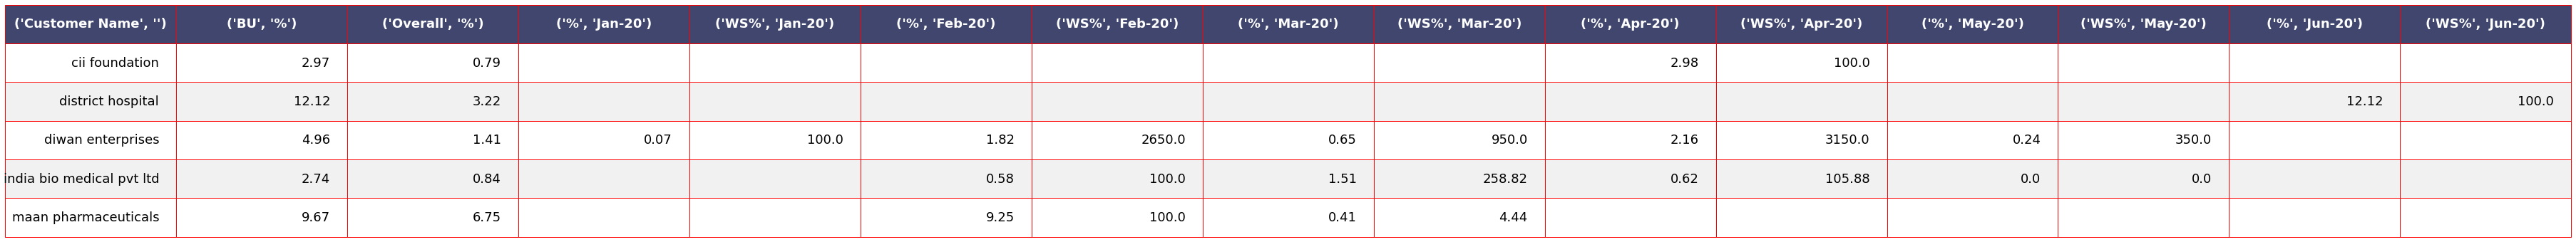

In [186]:
render_mpl_table(df_cust_BU_WS_final_1, header_columns=0, col_width=4.3,font_size=18,row_height=1,edge_color='r')
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_contri_ws.png',bbox_inches='tight',dpi=100)

# Top Customers By Order Count

In [187]:
top_cust_order_count_1=pd.DataFrame(YTD_newdata_DS.groupby(["Customer Name"])["Order ID"].nunique()).reset_index()
top_cust_order_count_1.sort_values(by="Order ID",ascending=False,inplace=True)
top_cust_order_count_1=top_cust_order_count_1.iloc[0:10]
top_cust_order_count_1
total_value=top_cust_order_count_1["Order ID"].sum().round(2)
total_value
top_cust_order_count_1["BU%"]=round((top_cust_order_count_1["Order ID"]/total_value)*100,2)
top_cust_order_count_1

,Customer Name,Order ID,BU%
197,contacare ophthalmic pvt ltd,65,20.19
1628,vituscare medlife pvt ltd,31,9.63
101,ashwath life sciences,30,9.32
1604,vaishnavi medicose,29,9.01
1013,lions om diagnostic dentre,29,9.01
208,dcdc health services private limited,29,9.01
37,agrima chemicals & surgicals,28,8.70
80,apollo kh hospital,28,8.70
1496,sri sudharsanam pharma,27,8.39
2,7med india pvt. ltd,26,8.07


In [188]:
#Customer wise BDE : ORDER COUNT

top_cust_order_count_BDE=top_cust_order_count_1.merge(YTD_DS_Customers_1,on="Customer Name",how="inner")
top_cust_order_count_BDE=top_cust_order_count_BDE[["Customer Name","BDE Name"]]
top_cust_order_count_BDE

,Customer Name,BDE Name
0,contacare ophthalmic pvt ltd,Mohd Junaid
1,vituscare medlife pvt ltd,Mohd Junaid
2,vituscare medlife pvt ltd,Subrat Foujdar
3,ashwath life sciences,Karuna Shivdas Gawali
4,vaishnavi medicose,Abhishek Shrivastava
5,lions om diagnostic dentre,Prakash R
6,dcdc health services private limited,Mohd Wasim Akhter
7,dcdc health services private limited,Abhishek Shrivastava
8,agrima chemicals & surgicals,Upendra Vishwakarma
9,agrima chemicals & surgicals,Prashant Pandey


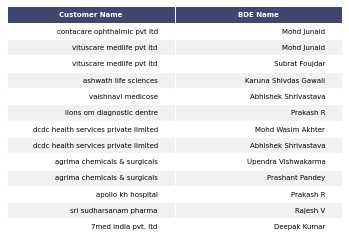

In [189]:
render_mpl_table(top_cust_order_count_BDE, header_columns=0, col_width=3.0)
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\top_cust_order_BDE.png',bbox_inches='tight',dpi=100)

In [190]:
top_cust_order_o=pd.DataFrame(YTD_newdata.groupby("Customer Name")["Order ID"].nunique()).reset_index()
top_cust_order_o["Overall Contribution %"]=round(top_cust_order_o["Order ID"]/(top_cust_order_o["Order ID"].sum())*100,2)
top_cust_order_o.sort_values(by="Order ID",ascending=False,inplace=True)
top_cust_order_o

,Customer Name,Order ID,Overall Contribution %
2625,vikram hospital bengaluru pvt ltd,690,8.26
1665,motherhood indiranagar,141,1.69
1875,paras hospital pharmacy (ip),114,1.36
1800,new delhi centre for sight ltd,72,0.86
362,contacare ophthalmic pvt ltd,65,0.78
...,...,...,...
1040,dr. sathya's dental care and implant centre,1,0.01
1037,dr. sandeep reddy j,1,0.01
1036,dr. sandeep kumar,1,0.01
1035,dr. samrat chakraborty,1,0.01


In [191]:
top_cust_orders=top_cust_order_count_1.merge(top_cust_order_o,on="Customer Name",how="inner")
top_cust_orders=top_cust_orders.drop("Order ID_y",axis=1).rename(columns={"Order ID_x":"Order Count"})
top_cust_orders

,Customer Name,Order Count,BU%,Overall Contribution %
0,contacare ophthalmic pvt ltd,65,20.19,0.78
1,vituscare medlife pvt ltd,31,9.63,0.37
2,ashwath life sciences,30,9.32,0.36
3,vaishnavi medicose,29,9.01,0.35
4,lions om diagnostic dentre,29,9.01,0.35
5,dcdc health services private limited,29,9.01,0.35
6,agrima chemicals & surgicals,28,8.70,0.34
7,apollo kh hospital,28,8.70,0.34
8,sri sudharsanam pharma,27,8.39,0.32
9,7med india pvt. ltd,26,8.07,0.31


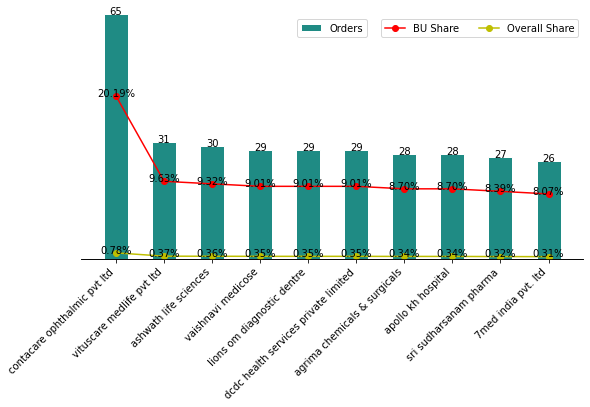

In [192]:
barWidth=0.5

Orders=list(top_cust_orders["Order Count"].values)
BU_Share=list(top_cust_orders["BU%"].values)
Overall_Contribution=list(top_cust_orders["Overall Contribution %"].values)
customer_list=list(top_cust_orders["Customer Name"].values)

r1=np.arange(len(Revenue))
r2= [x  for x in r1]
r3= [x  for x in r2]

fig,ax=plt.subplots(figsize=(9,5))
ax_1=ax.bar(r1,Orders,width=barWidth,color='#1f8b84',edgecolor="White",label="Orders")
for a, v in enumerate(Orders):
    ax.text(a, v, "%d" %v, ha="center")
ax1=ax.twinx()
ax_2=ax1.plot(r2,BU_Share,'o-',label="BU Share",color='r')
for a, v in enumerate(BU_Share):
    ax1.text(a, v, "%.2f" %v+"%", ha="center")
ax_3=ax1.plot(r3,Overall_Contribution,'o-',label="Overall Share",color='y')
for a, v in enumerate(Overall_Contribution):
    ax1.text(a, v, "%.2f" %v+"%", ha="center")
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_ylim(0,top_cust_orders["Order Count"].max())
ax.legend(ncol=1,loc=9)
ax1.spines["top"].set_visible(False)
ax1.set_ylim(0,top_cust_orders["BU%"].max()*1.5)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.legend(ncol=2)
ax1.set_yticklabels([])
ax1.set_yticks([])
ax.set_yticklabels([])
ax.set_yticks([])


plt.xticks([r for r in range(len(Orders))],customer_list)
fig.autofmt_xdate(rotation=45)
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\top_cust_order.png',bbox_inches='tight',dpi=100)
plt.show()


In [193]:
img1=plt.imread(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\top_cust_order.png')
img2=plt.imread(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\top_cust_order_BDE.png')

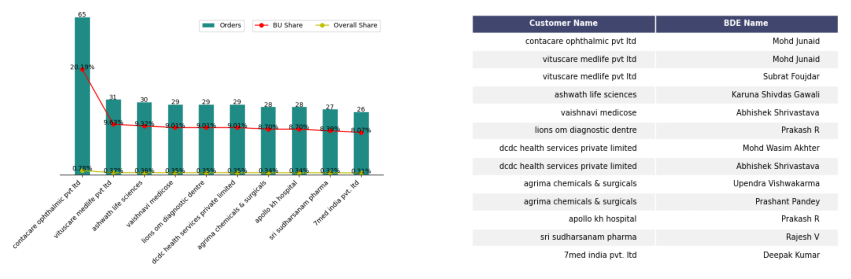

In [194]:
def axis_funct(ax1):
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1.spines["left"].set_visible(False)
    ax1.spines["bottom"].set_visible(False)

fig=plt.figure(figsize=(15,5))

ax1 = plt.subplot2grid((1,2),(0,0))
plt.imshow(img1)
axis_funct(ax1)

ax1 = plt.subplot2grid((1,2),(0,1))
plt.imshow(img2)
axis_funct(ax1)

plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_order_BDE.png',bbox_inches='tight',dpi=100)
plt.show()

# Top Customers By consistency

In [195]:
YTD_newdata_DS.shape

(11218, 38)

In [196]:
YTD_newdata_DS=YTD_newdata_DS.sort_values(by="month",ascending=True)

In [197]:
YTD_Cust=list(YTD_newdata_DS["Customer Name"].unique())
len(YTD_Cust)

1647

In [198]:
monthlist=YTD_newdata_DS["month_str"].unique()
monthlist=list(monthlist)
monthlist

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

In [199]:
def funct_cust(month):
    a=list(YTD_newdata_DS.loc[YTD_newdata_DS['month_str']==month]["Customer Name"].unique())

    return a

In [200]:
custlistoflists=[[] for i in range(len(monthlist))]

In [201]:
for i,a in enumerate(monthlist):
    custlistoflists[i].append(funct_cust(a))

In [202]:
#list(custlistoflists[5][0])

In [203]:
len(custlistoflists)

6

In [204]:
Jan_cust=list(YTD_newdata_DS.loc[YTD_newdata_DS['month_str']=='Jan']["Customer Name"].unique())
#len(Jan_cust)

In [205]:
Feb_cust=list(YTD_newdata_DS.loc[YTD_newdata_DS['month_str']=='Feb']["Customer Name"].unique())
#len(Feb_cust)

In [206]:
Mar_cust=list(YTD_newdata_DS.loc[YTD_newdata_DS['month_str']=='Mar']["Customer Name"].unique())
#len(Mar_cust)

In [207]:
Apr_cust=list(YTD_newdata_DS.loc[YTD_newdata_DS['month_str']=='Apr']["Customer Name"].unique())
#len(Apr_cust)

In [208]:
May_cust=list(YTD_newdata_DS.loc[YTD_newdata_DS['month_str']=='May']["Customer Name"].unique())
#len(May_cust)

In [209]:
Jun_cust=list(YTD_newdata_DS.loc[YTD_newdata_DS['month_str']=='Jun']["Customer Name"].unique())
#len(Jun_cust)

In [210]:
consistent_cust=[]
for i in YTD_Cust:
    if i in Jan_cust and i in Feb_cust and i in Mar_cust and i in Apr_cust and i in May_cust and i in Jun_cust:
        consistent_cust.append(i)
        

In [211]:
consistent_cust

['sri sudharsanam pharma',
 's.g pharmacy',
 'lions om diagnostic dentre',
 'apollo kh hospital',
 'ashwath life sciences',
 'abn pharmaceuticals',
 'sunny medical stores',
 'lambda therapeutic research ltd',
 'hariharan diabetes & heart care hospital private limited',
 'pushpanjali hospital',
 'vaishnavi medicose',
 'tanker foundation dialysis unit',
 's.g hospital',
 'renal dialysis',
 'kvt speciality hospital',
 'sh technology pvt ltd',
 'om medicines']

In [212]:
#custlistoflists

In [213]:
#for sublist in custlistoflists:
 #   print(sublist)
          

In [214]:
consistent_cust=[]
for i in YTD_Cust:
    for sublist in custlistoflists:
        if i in chain.from_iterable(sublist):
            consistent_cust.append(i)
            

In [215]:
#consistent_cust

In [216]:
#print(list(map(lambda cust:{cust:consistent_cust.count(cust)},set(consistent_cust))))

In [217]:
cust_df=pd.DataFrame(consistent_cust,columns=["Customers"])

In [218]:
cust_df["Count"]=cust_df.groupby(["Customers"])["Customers"].transform('count')

In [219]:
consistant_cust=cust_df[cust_df["Count"]==len(monthlist)]["Customers"].unique()
consistant_cust

array(['sri sudharsanam pharma', 's.g pharmacy',
       'lions om diagnostic dentre', 'apollo kh hospital',
       'ashwath life sciences', 'abn pharmaceuticals',
       'sunny medical stores', 'lambda therapeutic research ltd',
       'hariharan diabetes & heart care hospital private limited',
       'pushpanjali hospital', 'vaishnavi medicose',
       'tanker foundation dialysis unit', 's.g hospital',
       'renal dialysis', 'kvt speciality hospital',
       'sh technology pvt ltd', 'om medicines'], dtype=object)

In [220]:
YTD_newdata_DS["Consistant"]=YTD_newdata_DS["Customer Name"].apply(lambda x :"Yes" if x in consistant_cust else "No")
        

In [221]:
df_consistant_cust=YTD_newdata_DS.loc[YTD_newdata_DS["Consistant"]=="Yes"]
#df_consistant_cust

In [222]:
top_consistant_cust_1=pd.DataFrame(df_consistant_cust.groupby(["Customer Name","Order ID"])["Order Value"].max()).reset_index()
top_consistant_cust_1=pd.DataFrame((top_consistant_cust_1.groupby(["Customer Name"])["Order Value"].sum()/10000000)).reset_index()
top_consistant_cust_1
total_value_1=top_consistant_cust_1["Order Value"].sum().round(2)
total_value_1
top_consistant_cust_1["BU%"]=round((top_consistant_cust_1["Order Value"]/total_value_1)*100,2)
top_consistant_cust_1
top_consistant_cust_1.sort_values(by="Order Value",ascending=False,inplace=True)
top_consistant_cust_1=top_consistant_cust_1.iloc[0:10]
top_consistant_cust_1
#YTD_newdata_DS.groupby(["Customer Name","BDE Name"])["Order ID"].nunique()

,Customer Name,Order Value,BU%
16,vaishnavi medicose,0.790545,46.23
14,sunny medical stores,0.146521,8.57
12,sh technology pvt ltd,0.131632,7.70
1,apollo kh hospital,0.125505,7.34
13,sri sudharsanam pharma,0.096309,5.63
4,kvt speciality hospital,0.086291,5.05
8,pushpanjali hospital,0.075414,4.41
15,tanker foundation dialysis unit,0.061865,3.62
5,lambda therapeutic research ltd,0.036691,2.15
11,s.g pharmacy,0.032949,1.93


In [223]:
YTD_DS_consistant_Customers=df_consistant_cust[["Customer Name","BDE Name"]]
YTD_DS_consistant_Customers_1=YTD_DS_consistant_Customers.drop_duplicates(subset=["Customer Name","BDE Name"],keep='first')
#YTD_DS_consistant_Customers_1[YTD_DS_consistant_Customers_1["Customer Name"]=="lambda therapeutic research ltd  -"]


In [224]:
top_consistant_cust_1_BDE=top_consistant_cust_1.merge(YTD_DS_consistant_Customers_1,on="Customer Name",how="inner")
top_consistant_cust_1_BDE=top_consistant_cust_1_BDE[["Customer Name","BDE Name"]]
top_consistant_cust_1_BDE

,Customer Name,BDE Name
0,vaishnavi medicose,Abhishek Shrivastava
1,sunny medical stores,Anupam Tiwari
2,sunny medical stores,Khenam Soni
3,sh technology pvt ltd,Khenam Soni
4,apollo kh hospital,Prakash R
5,sri sudharsanam pharma,Rajesh V
6,kvt speciality hospital,Rajesh V
7,pushpanjali hospital,Subrat Foujdar
8,tanker foundation dialysis unit,Rajesh V
9,lambda therapeutic research ltd,Amit Pandey


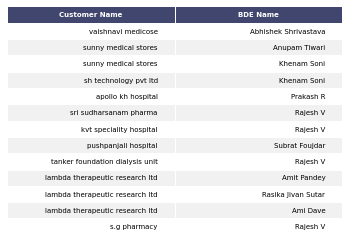

In [225]:
render_mpl_table(top_consistant_cust_1_BDE, header_columns=0, col_width=3.0)
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\top_cust_consistant_BDE.png',bbox_inches='tight',dpi=100)

In [226]:
YTD_newdata[YTD_newdata["Vertical"]!="Direct Sales"].shape

(27542, 36)

In [227]:
YTD_newdata["Consistant"]=YTD_newdata["Customer Name"].apply(lambda x :"Yes" if x in consistant_cust else "No")

In [228]:
df_consistant_cust_overall=YTD_newdata.loc[YTD_newdata["Consistant"]=="Yes"]
df_consistant_cust_overall.head()
df_consistant_cust_overall[df_consistant_cust_overall["Vertical"]!="Direct Sales"]

,Order ID,Order Date,Order Status,Organic/Inorganic,BDE Name,Department,Vertical,Customer Name,Customer Email,Customer Telephone,...,Comment,Tag,Carrier type,Zone,Shipment Date,Order Value,month,month_str,Period,Consistant


In [229]:
top_cust_o=pd.DataFrame(df_consistant_cust_overall.groupby(["Customer Name","Order ID"])["Order Value"].max()).reset_index()
top_cust_o=pd.DataFrame(top_cust_o.groupby("Customer Name")["Order Value"].sum()/10000000).reset_index()
top_cust_o["Overall Contribution"]=round(top_cust_o["Order Value"]/(top_cust_o["Order Value"].sum())*100,2)
top_cust_o

,Customer Name,Order Value,Overall Contribution
0,abn pharmaceuticals,0.009774,0.57
1,apollo kh hospital,0.125505,7.34
2,ashwath life sciences,0.018385,1.08
3,hariharan diabetes & heart care hospital priva...,0.015614,0.91
4,kvt speciality hospital,0.086291,5.05
5,lambda therapeutic research ltd,0.036691,2.15
6,lions om diagnostic dentre,0.024902,1.46
7,om medicines,0.009355,0.55
8,pushpanjali hospital,0.075414,4.41
9,renal dialysis,0.019540,1.14


In [230]:
top_cust=top_consistant_cust_1.merge(top_cust_o,on="Customer Name",how="inner")
top_cust

,Customer Name,Order Value_x,BU%,Order Value_y,Overall Contribution
0,vaishnavi medicose,0.790545,46.23,0.790545,46.24
1,sunny medical stores,0.146521,8.57,0.146521,8.57
2,sh technology pvt ltd,0.131632,7.70,0.131632,7.70
3,apollo kh hospital,0.125505,7.34,0.125505,7.34
4,sri sudharsanam pharma,0.096309,5.63,0.096309,5.63
5,kvt speciality hospital,0.086291,5.05,0.086291,5.05
6,pushpanjali hospital,0.075414,4.41,0.075414,4.41
7,tanker foundation dialysis unit,0.061865,3.62,0.061865,3.62
8,lambda therapeutic research ltd,0.036691,2.15,0.036691,2.15
9,s.g pharmacy,0.032949,1.93,0.032949,1.93


In [231]:
top_cust.sort_values(by="Order Value_x",ascending=False,inplace=True)
top_cust=top_cust.iloc[0:10]
top_cust=top_cust.drop("Order Value_y",axis=1).rename(columns={"Order Value_x":"Order Value"})
top_cust

,Customer Name,Order Value,BU%,Overall Contribution
0,vaishnavi medicose,0.790545,46.23,46.24
1,sunny medical stores,0.146521,8.57,8.57
2,sh technology pvt ltd,0.131632,7.70,7.70
3,apollo kh hospital,0.125505,7.34,7.34
4,sri sudharsanam pharma,0.096309,5.63,5.63
5,kvt speciality hospital,0.086291,5.05,5.05
6,pushpanjali hospital,0.075414,4.41,4.41
7,tanker foundation dialysis unit,0.061865,3.62,3.62
8,lambda therapeutic research ltd,0.036691,2.15,2.15
9,s.g pharmacy,0.032949,1.93,1.93


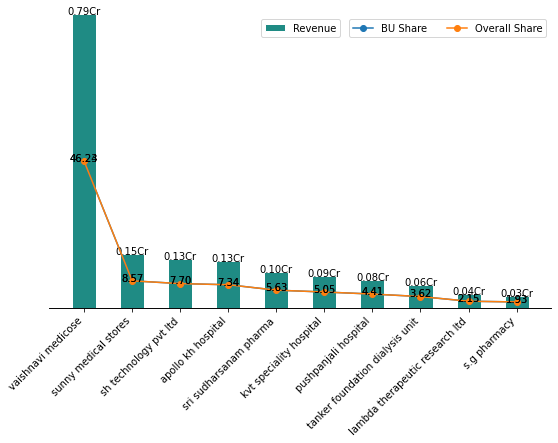

In [232]:
barWidth=0.5

Revenue=list(top_cust["Order Value"].values)
BU_Share=list(top_cust["BU%"].values)
Overall_Contribution=list(top_cust["Overall Contribution"].values)

r1=np.arange(len(Revenue))
r2= [x  for x in r1]
r3= [x  for x in r2]

fig,ax=plt.subplots(figsize=(9,6))
ax_1=ax.bar(r1,Revenue,width=barWidth,color='#1f8b84',edgecolor="White",label="Revenue")
for a, v in enumerate(Revenue):
    ax.text(a, v, "%.2f" %v+'Cr', ha="center")
ax1=ax.twinx()
ax_2=ax1.plot(r2,BU_Share,'o-',label="BU Share")
for a, v in enumerate(BU_Share):
    ax1.text(a, v, "%.2f" %v, ha="center")
ax_3=ax1.plot(r3,Overall_Contribution,'o-',label="Overall Share")
for a, v in enumerate(Overall_Contribution):
    ax1.text(a, v, "%.2f" %v, ha="center")
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_ylim(0,top_cust["Order Value"].max())
ax.legend(ncol=1,loc=9)
ax1.spines["top"].set_visible(False)
ax1.set_ylim(0,top_cust["BU%"].max()*2)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.legend(ncol=2)
ax1.set_yticklabels([])
ax1.set_yticks([])
ax.set_yticklabels([])
ax.set_yticks([])
plt.xticks([r  for r in range(len(Revenue))], (list(top_cust["Customer Name"])))
fig.autofmt_xdate(rotation=45)
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\top_cust_consistant.png',bbox_inches='tight',dpi=100)
plt.show()


In [233]:
img1=plt.imread(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\top_cust_consistant.png')
img2=plt.imread(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\top_cust_consistant_BDE.png')

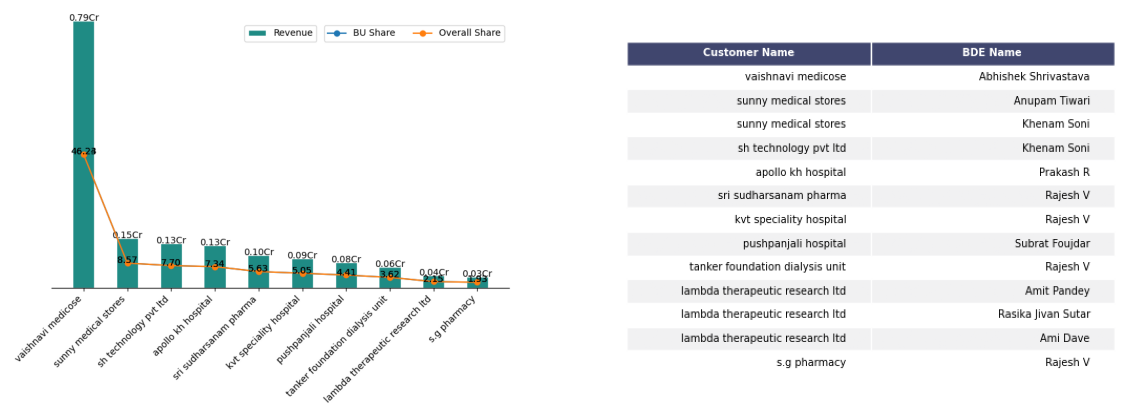

In [234]:
def axis_funct(ax1):
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1.spines["left"].set_visible(False)
    ax1.spines["bottom"].set_visible(False)

fig=plt.figure(figsize=(20,8))

ax1 = plt.subplot2grid((1,2),(0,0))
plt.imshow(img1)
axis_funct(ax1)

ax1 = plt.subplot2grid((1,2),(0,1))
plt.imshow(img2)
axis_funct(ax1)

plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_consistant_BDE.png',bbox_inches='tight',dpi=100, transparent=True)
plt.show()

# Products

## Product Quantity Sold

# Product Segmentation

In [235]:
newdata_DS_19_20.columns

Index(['Order ID', 'Order Date', 'Order Status', 'Organic/Inorganic',
       'BDE Name', 'Department', 'Vertical', 'Customer Name', 'Customer Email',
       'Customer Telephone', 'Active/Inactive', 'Customer Category',
       'Product Name', 'SKU', 'Product Category', 'Product Rate',
       'Qty Ordered', 'Qty Invoiced', 'Qty Cancelled', 'Qty Shipped',
       'Qty Delivered', 'Qty Refunded', 'Fulfilment Center', 'State', 'City',
       'Postcode', 'AWB Number', 'Comment', 'Tag', 'Carrier type', 'Zone',
       'Shipment Date', 'Order Value', 'month', 'month_str', 'year', 'MonthY'],
      dtype='object')

In [236]:
newdata_DS_19_20["ProdRate_QTYordered"]=newdata_DS_19_20['Product Rate']*newdata_DS_19_20['Qty Ordered']

In [237]:
Prod_19_20_df=pd.DataFrame(newdata_DS_19_20.groupby(["year","Product Name"])["ProdRate_QTYordered"].sum()/100000).reset_index()

Prod_19_20_df

,year,Product Name,ProdRate_QTYordered
0,19,-,0.000000
1,19,1/2 Water Filter,0.011500
2,19,2000F Dental Ear Loop Mask,0.017808
3,19,2ml dispovan syringe with needle,0.036288
4,19,3 ply face mask elastics,0.004725
...,...,...,...
5910,20,universal plier indian,0.001568
5911,20,vasopressin 40IU injection,0.023903
5912,20,vicryl 1.0. NW2421(J & J),0.234580
5913,20,vicryl 2.0 NW2345(J & J),2.873472


In [238]:
Prod_19_20_df[Prod_19_20_df["Product Name"]=='3M 9504IN Mask (FFP2) - For Dental']

,year,Product Name,ProdRate_QTYordered
1602,20,3M 9504IN Mask (FFP2) - For Dental,1.319726


In [239]:
def funct_tiers(df):
    UP_limit=float(1.0)
    LW_limit=float(0.1)
    middle_limit=float(0.5)
    if df["ProdRate_QTYordered"] >= UP_limit:
        val="Tier1"
    elif df["ProdRate_QTYordered"] >= middle_limit and df["ProdRate_QTYordered"] < UP_limit:
        val="Tier2"
    elif df["ProdRate_QTYordered"] >= LW_limit and df["ProdRate_QTYordered"] < middle_limit:
        val="Tier3"
    else:
        val="Tier4"
    return val

In [240]:
Prod_19_20_df["tier"]=Prod_19_20_df.apply(funct_tiers,axis=1)
Prod_19_20_df_1=pd.DataFrame(Prod_19_20_df.groupby(["year","tier"])["ProdRate_QTYordered"].sum()).reset_index()
Prod_19_20_df_1

,year,tier,ProdRate_QTYordered
0,19,Tier1,111.946437
1,19,Tier2,27.427749
2,19,Tier3,50.882759
3,19,Tier4,29.441631
4,20,Tier1,3017.616893
5,20,Tier2,112.177120
6,20,Tier3,157.918246
7,20,Tier4,81.415640


In [241]:
Prod_19_20_df[Prod_19_20_df["Product Name"]=='3M 9504IN Mask (FFP2) - For Dental']

,year,Product Name,ProdRate_QTYordered,tier
1602,20,3M 9504IN Mask (FFP2) - For Dental,1.319726,Tier1


In [242]:
Prod_19_20_df[Prod_19_20_df["tier"]=='Tier1']["ProdRate_QTYordered"].sum()

3129.563330219

In [243]:
Prod_19_20_df_2=pd.DataFrame(Prod_19_20_df.groupby(["tier"])["ProdRate_QTYordered"].sum()).reset_index()
Prod_19_20_df_2["year"]="overall"
Prod_19_20_df_2

,tier,ProdRate_QTYordered,year
0,Tier1,3129.563330,overall
1,Tier2,139.604870,overall
2,Tier3,208.801005,overall
3,Tier4,110.857271,overall


In [244]:
Yearwise_prod_segment=Prod_19_20_df_1.append(Prod_19_20_df_2,ignore_index=True)

In [245]:
Product_seg=Yearwise_prod_segment.round({"ProdRate_QTYordered":2})
Product_seg['ProdRate_QTYordered']=Product_seg['ProdRate_QTYordered']/100
Product_seg

,ProdRate_QTYordered,tier,year
0,1.1195,Tier1,19
1,0.2743,Tier2,19
2,0.5088,Tier3,19
3,0.2944,Tier4,19
4,30.1762,Tier1,20
5,1.1218,Tier2,20
6,1.5792,Tier3,20
7,0.8142,Tier4,20
8,31.2956,Tier1,overall
9,1.3960,Tier2,overall


In [246]:
Product_Segment=pd.DataFrame(Product_seg.pivot_table(index="year",columns="tier",values="ProdRate_QTYordered").reset_index().fillna(0))
Product_Segment

tier,year,Tier1,Tier2,Tier3,Tier4
0,19,1.1195,0.2743,0.5088,0.2944
1,20,30.1762,1.1218,1.5792,0.8142
2,overall,31.2956,1.3960,2.0880,1.1086


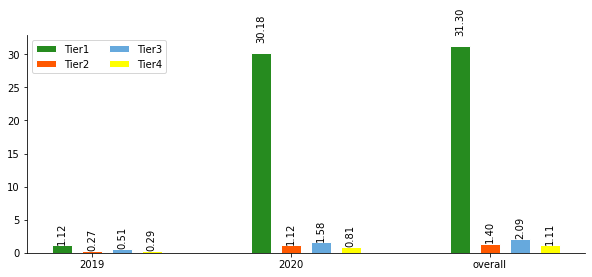

In [340]:
barWidth = 0.15

Tier_1=list(Product_Segment["Tier1"].values)
Tier_2=list(Product_Segment["Tier2"].values)
Tier_3=list(Product_Segment["Tier3"].values)
Tier_4=list(Product_Segment["Tier4"].values)

Tier1=Tier_1
Tier2=Tier_2
Tier3=Tier_3
Tier4=Tier_4
Tier5=Tier1+Tier2+Tier3+Tier4

r1 = np.arange(len(Tier1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5=r1+r2+r3+r4

fig,ax=plt.subplots(figsize=(10,4))
ax1=ax.bar(r1,Tier1,width=barWidth-0.05,color='#268b1f', edgecolor='white', label='Tier1')
ax2=ax.bar(r2,Tier2,width=barWidth-0.05,color='#ff5800', edgecolor='white', label='Tier2')
ax3=ax.bar(r3,Tier3,width=barWidth-0.05,color='#66a9dd', edgecolor='white', label='Tier3')
ax4=ax.bar(r4,Tier4,width=barWidth-0.05,color='#ffff00', edgecolor='white', label='Tier4')

#for i in range(len(r5)):
 #   ax.text(x=r5[i]-0.1,y=Tier5[i]+0.1,s=Tier5[i])
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%.2f' %(height),
                ha='center', va='bottom',rotation='vertical')
autolabel(ax1)
autolabel(ax2)
autolabel(ax3)
autolabel(ax4)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#plt.xlabel('Year', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(Tier1))], ['2019','2020','overall'])
plt.legend(ncol=2)

plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\product_seg.png',bbox_inches='tight',dpi=100)
plt.show()

# Old vs New Product analysis

In [248]:
YTD_newdata_DS.shape

(11218, 39)

In [249]:
YTD_newdata_DS.columns

Index(['Order ID', 'Order Date', 'Order Status', 'Organic/Inorganic',
       'BDE Name', 'Department', 'Vertical', 'Customer Name', 'Customer Email',
       'Customer Telephone', 'Active/Inactive', 'Customer Category',
       'Product Name', 'SKU', 'Product Category', 'Product Rate',
       'Qty Ordered', 'Qty Invoiced', 'Qty Cancelled', 'Qty Shipped',
       'Qty Delivered', 'Qty Refunded', 'Fulfilment Center', 'State', 'City',
       'Postcode', 'AWB Number', 'Comment', 'Tag', 'Carrier type', 'Zone',
       'Shipment Date', 'Order Value', 'month', 'month_str', 'year', 'MonthY',
       'Period', 'Consistant'],
      dtype='object')

In [250]:
month_prod_list=list(YTD_newdata_DS["MonthY"].unique())
month_prod_list

['Jan-20', 'Feb-20', 'Mar-20', 'Apr-20', 'May-20', 'Jun-20']

In [251]:
l=[]
def funct_new_old_prod(m):
    global l
    cust=[]
    cust1=cust.extend(l)
    newdata_DS=YTD_newdata_DS[YTD_newdata_DS["MonthY"]==str(m)]
    old_prod_DS=[]
    New_prod_DS=[]
    for i in newdata_DS["Product Name"].unique():
        if i not in cust:
            New_prod_DS.append(i)
            l.append(i)
        else:
            old_prod_DS.append(i)
    Total_prod=len(cust)
    Total_prod_upto_M=Total_prod+len(New_prod_DS)
    Total_prod_upto_IN_M=len(New_prod_DS)+len(old_prod_DS)
    return m,len(New_prod_DS),len(old_prod_DS),Total_prod_upto_IN_M,Total_prod_upto_M,New_prod_DS
    #cust.append(New_cust_DS)

In [252]:
new_old_prod=[[] for i in range(len(month_prod_list))]

In [253]:
for i,a in enumerate(month_prod_list):
    new_old_prod[i].append(funct_new_old_prod(a))

In [254]:
new_old_prod[1][0][5]

['b braun omnivan syringe with needle 5ml - b braun',
 'surgical cap',
 'sceptre chg handrub- 5 ltr',
 'adhesive tape 7.5*5m medicare',
 'betadine 2 litre',
 'surgical mask',
 'lister surgical blade 20 no-lister',
 'voco ionofil plus powder & liquid',
 'prilox cream 5gm',
 'gic type 1x powder - large',
 'disposable buffet cap',
 'fresenius fx8 dialyser',
 'fresenius 5008s dialysis machine(refurbished)',
 'medichem infant warmer with phototherapy',
 'fresenius blood tubing(post pump)',
 'mani k-files length:21mm size:30',
 'mani k-files length:21mm size:35',
 'mani k-files length:25mm size:30',
 'mani k-files length:31mm size:15-40',
 'gc fuji gold label type 1 luting cement (small pack)',
 'taylor brace short-special',
 'ethicon 4-0 nw3319 (j&j)',
 'cervical collar soft small',
 'comod chair [l-35]-universal',
 'comod chair ergo [l-43]-universal',
 'folding walker ergo [l-37]-peices',
 'pouch & sling tropical-extra large',
 'pouch & sling tropical-medium',
 'cervical collar soft medium

In [255]:
new_old_prod_1=[]
for i in new_old_prod:
    for j in i:
        new_old_prod_1.append(j)

In [256]:
new_old_prod_1

[('Jan-20',
  1555,
  0,
  1555,
  1555,
  ['septodont surfasept s.a. 1000ml',
   'ceftraxone  1gm',
   'amoxicillin 1 gm',
   'amikacin 500 mg inj  2 ml',
   'piperacillin 0.5 gm inje',
   'pcm 100ml injection',
   'ns 100ml',
   'metrogyl 100ml injection',
   'meropenem 1gm',
   'examination gloves',
   'dns 100 ml',
   'dexa injection',
   'derriphylin  injection',
   'ceftraxone  1gm injection',
   'iv cannula 20g nipro',
   'ethilon 2-0 nw3336 (j & j)',
   'lignox 2% a (la2%) - 30 ml',
   'nummit spray',
   'suction tips',
   'marathon micro motor m4 control box',
   'uv chamber with 12 tray',
   '3m relyx lute 2 single clicker pa',
   'vwr powdered latex examination gloves (medium)',
   'eras emergency recovery trolley',
   '3m littmann classic iii monitoring stethoscope, 5811',
   '3m littmann classic iii monitoring stethoscope, rainbow-finish chestpiece, black tube, 27 inch, 5870',
   'bd venflon cannula 20g ( 1 box @ 50 pcs)',
   'pioneer hydrafacial 8 in 1 machine',
   'latex

In [257]:
old_new_prod_analysis=pd.DataFrame(data=new_old_prod_1,columns=['Month','New Products','Old Products','Total Products In Current M',"Total Products Upto Current M ","New_Prod"])

In [258]:
old_new_prod_analysis

,Month,New Products,Old Products,Total Products In Current M,Total Products Upto Current M,New_Prod
0,Jan-20,1555,0,1555,1555,"[septodont surfasept s.a. 1000ml, ceftraxone ..."
1,Feb-20,1129,339,1468,2684,[b braun omnivan syringe with needle 5ml - b b...
2,Mar-20,804,470,1274,3488,"[curetech germinil gel 500 ml, pure handrub al..."
3,Apr-20,226,192,418,3714,"[saliva ejectors (100 pcs), pana air lubricant..."
4,May-20,244,246,490,3958,[pioneer nirtile examination gloves- blue (med...
5,Jun-20,352,301,653,4310,"[gdc 45# lower roots fx45s, krisons latex medi..."


In [259]:
old_new_prod_analysis["New Product Sold"]=(old_new_prod_analysis['New Products']/old_new_prod_analysis['Total Products In Current M'])*100
old_new_prod_analysis

,Month,New Products,Old Products,Total Products In Current M,Total Products Upto Current M,New_Prod,New Product Sold
0,Jan-20,1555,0,1555,1555,"[septodont surfasept s.a. 1000ml, ceftraxone ...",100.000000
1,Feb-20,1129,339,1468,2684,[b braun omnivan syringe with needle 5ml - b b...,76.907357
2,Mar-20,804,470,1274,3488,"[curetech germinil gel 500 ml, pure handrub al...",63.108320
3,Apr-20,226,192,418,3714,"[saliva ejectors (100 pcs), pana air lubricant...",54.066986
4,May-20,244,246,490,3958,[pioneer nirtile examination gloves- blue (med...,49.795918
5,Jun-20,352,301,653,4310,"[gdc 45# lower roots fx45s, krisons latex medi...",53.905054


In [260]:
old_new_prod_analysis["Existing Product Sold"]=(old_new_prod_analysis['Old Products']/old_new_prod_analysis['Total Products In Current M'])*100
old_new_prod_analysis

,Month,New Products,Old Products,Total Products In Current M,Total Products Upto Current M,New_Prod,New Product Sold,Existing Product Sold
0,Jan-20,1555,0,1555,1555,"[septodont surfasept s.a. 1000ml, ceftraxone ...",100.000000,0.000000
1,Feb-20,1129,339,1468,2684,[b braun omnivan syringe with needle 5ml - b b...,76.907357,23.092643
2,Mar-20,804,470,1274,3488,"[curetech germinil gel 500 ml, pure handrub al...",63.108320,36.891680
3,Apr-20,226,192,418,3714,"[saliva ejectors (100 pcs), pana air lubricant...",54.066986,45.933014
4,May-20,244,246,490,3958,[pioneer nirtile examination gloves- blue (med...,49.795918,50.204082
5,Jun-20,352,301,653,4310,"[gdc 45# lower roots fx45s, krisons latex medi...",53.905054,46.094946


In [261]:
old_new_prod_analysis=old_new_prod_analysis.round({'New Product Sold':2,'Existing Product Sold':2})
old_new_prod_analysis

,Month,New Products,Old Products,Total Products In Current M,Total Products Upto Current M,New_Prod,New Product Sold,Existing Product Sold
0,Jan-20,1555,0,1555,1555,"[septodont surfasept s.a. 1000ml, ceftraxone ...",100.00,0.00
1,Feb-20,1129,339,1468,2684,[b braun omnivan syringe with needle 5ml - b b...,76.91,23.09
2,Mar-20,804,470,1274,3488,"[curetech germinil gel 500 ml, pure handrub al...",63.11,36.89
3,Apr-20,226,192,418,3714,"[saliva ejectors (100 pcs), pana air lubricant...",54.07,45.93
4,May-20,244,246,490,3958,[pioneer nirtile examination gloves- blue (med...,49.80,50.20
5,Jun-20,352,301,653,4310,"[gdc 45# lower roots fx45s, krisons latex medi...",53.91,46.09


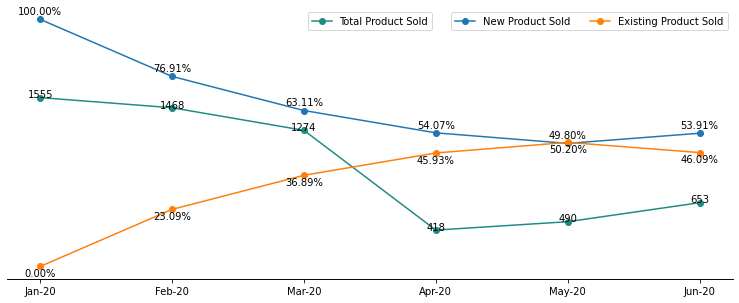

In [341]:
New_Product_Sold=list(old_new_prod_analysis['New Product Sold'].values)
Total_Product_Sold=list(old_new_prod_analysis['Total Products In Current M'].values)
Existing_Product_Sold=list(old_new_prod_analysis['Existing Product Sold'].values)

r1=np.arange(len(New_Product_Sold))
r2= [x  for x in r1]
r3= [x  for x in r2]

fig,ax=plt.subplots(figsize=(13,5))
ax_1=ax.plot(r1,Total_Product_Sold,'o-',label="Total Product Sold",color='#1f8b84')
for a, v in enumerate(Total_Product_Sold):
    ax.text(a, v, "%d" %v, ha="center")
ax1=ax.twinx()
ax_2=ax1.plot(r2,New_Product_Sold,'o-',label="New Product Sold")
for a, v in enumerate(New_Product_Sold):
    ax1.text(a, v+2, "%.2f" %v+'%', ha="center")
ax_3=ax1.plot(r3,Existing_Product_Sold,'o-',label="Existing Product Sold")
for a, v in enumerate(Existing_Product_Sold):
    ax1.text(a, v-4, "%.2f" %v+'%', ha="center")  

ax.legend(loc=9)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_ylim(0,old_new_prod_analysis['Total Products In Current M'].max()*1.5)
ax.spines["left"].set_visible(False)
ax.set_yticklabels([])
ax.set_yticks([])
ax1.legend(ncol=2,loc='best')
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.set_yticklabels([])
ax1.set_yticks([])


plt.xticks([r  for r in range(len(New_Product_Sold))], (list(old_new_prod_analysis["Month"])))
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\Old vs New Product analysis.png',bbox_inches='tight',dpi=100)
plt.show()

In [343]:
img1=plt.imread(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\product_seg.png')
img2=plt.imread(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\Old vs New Product analysis.png')

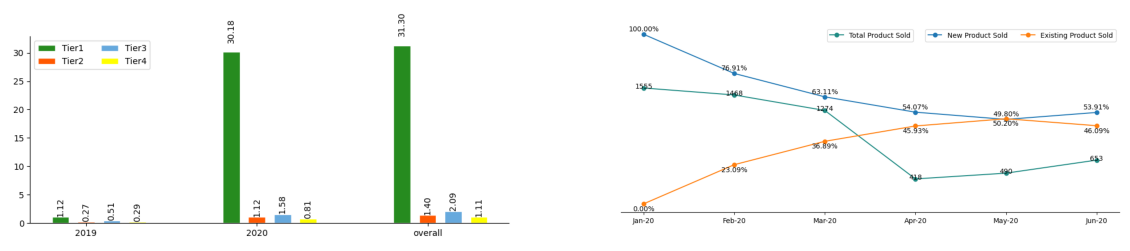

In [344]:
def axis_funct(ax1):
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1.spines["left"].set_visible(False)
    ax1.spines["bottom"].set_visible(False)

fig=plt.figure(figsize=(20,8))

ax1 = plt.subplot2grid((1,2),(0,0))
plt.imshow(img1)
axis_funct(ax1)

ax1 = plt.subplot2grid((1,2),(0,1))
plt.imshow(img2)
axis_funct(ax1)

plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\old_new_prod_seg_analysis.png',bbox_inches='tight',dpi=100, transparent=True)
plt.show()

# Revenue from old and new products

In [263]:
YTD_newdata_DS.shape

(11218, 39)

In [264]:
def funct_dataframe_create(m):
    newdata_DS_M=YTD_newdata_DS[YTD_newdata_DS["MonthY"]==str(m)]
    return newdata_DS_M

In [265]:
dfnames1=[]
for i in range(len(month_prod_list)):
    dfnames1.append(i)

In [266]:
df_new_old_prod_a= [pd.DataFrame for x in dfnames1]
df_new_old_prod_a

[pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame]

In [267]:
for i,a in enumerate(month_prod_list):
    df_new_old_prod_a[i]=funct_dataframe_create(a)

In [268]:
len(df_new_old_prod_a)

6

In [269]:
'''
def new_prod(df):
    for i in df.unique():
        if i in new_old_prod[1][0][5]:
            var="New_Product"
        else:
            var="Old_Product"
    return var
'''

'\ndef new_prod(df):\n    for i in df.unique():\n        if i in new_old_prod[1][0][5]:\n            var="New_Product"\n        else:\n            var="Old_Product"\n    return var\n'

In [270]:
#df_new_old_prod_a[1].shape


In [271]:
#df_new_old_prod_a[1]["New Product"]=df_new_old_prod_a[1][["Product Name"]].apply(new_prod,axis=1)

In [272]:
#df_new_old_prod_a[1]["New Product"].value_counts()

In [273]:
#df_new_old_prod_a[1].columns

In [274]:
#df_new_old_prod_a[1]["Product Price"]=df_new_old_prod_a[1]['Product Rate']*df_new_old_prod_a[1]['Qty Ordered']

In [275]:
#d=pd.DataFrame(df_new_old_prod_a[1].groupby(["MonthY","Order ID","New Product","Product Name"])["Product Price"].max()).reset_index()

In [276]:
#d

In [277]:
#d[d["Product Name"]=='zincovit tablet']

In [278]:
#pd.DataFrame(d.groupby(["MonthY","New Product"])["Product Price"].sum()).reset_index()

In [279]:
#pd.DataFrame(df_new_old_prod_a[1].groupby(["MonthY","New Product"])["Product Name"].nunique()).reset_index()

In [280]:
def new_old_products(df,a):
    def new_prod(df):
        for i in df.unique():
            if i in a:
                var="New_Product"
            else:
                var="Old_Product"
        return var
    df["New Product"]=df[["Product Name"]].apply(new_prod,axis=1)
    df["Product Price"]=df['Product Rate']*df['Qty Ordered']
    df_new_old_prod_rev=pd.DataFrame(pd.DataFrame(df.groupby(["MonthY","Order ID","New Product","Product Name"])["Product Price"].max()).reset_index().groupby(["MonthY","New Product"])["Product Price"].sum()/10000000).reset_index()
    #df_new_old_prod_rev
    df_new_old_prod_count=pd.DataFrame(df.groupby(["MonthY","New Product"])["Product Name"].nunique()).reset_index()
    #df_new_old_prod_count
    df_prod=pd.merge(df_new_old_prod_rev,df_new_old_prod_count)
    #df_prod
    df_prod=pd.DataFrame(df_prod.pivot_table(index="MonthY",columns=["New Product"],values=["Product Price","Product Name"])).reset_index()
    return df_prod

In [281]:
dfnames_prod=[]
for i in range(len(month_prod_list)):
    dfnames_prod.append(i)

In [282]:
df_new_old_prod_b= [pd.DataFrame for x in dfnames]

In [283]:
for i in range(len(month_prod_list)):
    df_new_old_prod_b[i]=new_old_products(df_new_old_prod_a[i],new_old_prod[i][0][5])

In [284]:
df_new_old_prod_b

[             MonthY Product Name Product Price
 New Product          New_Product   New_Product
 0            Jan-20         1555      2.889047,
              MonthY Product Name             Product Price            
 New Product          New_Product Old_Product   New_Product Old_Product
 0            Feb-20         1129         339      4.893166    1.460917,
              MonthY Product Name             Product Price            
 New Product          New_Product Old_Product   New_Product Old_Product
 0            Mar-20          804         470      2.385353    2.412127,
              MonthY Product Name             Product Price            
 New Product          New_Product Old_Product   New_Product Old_Product
 0            Apr-20          226         192      2.657492    3.231818,
              MonthY Product Name             Product Price            
 New Product          New_Product Old_Product   New_Product Old_Product
 0            May-20          244         246      1.036436 

In [285]:
df_new_vs_exist_prod=pd.concat(df_new_old_prod_b)
df_new_vs_exist_prod.rename(columns={"Product Name":"Product Count"},inplace=True)
df_new_vs_exist_prod.columns = ['_'.join(col) for col in df_new_vs_exist_prod.columns]
df_new_vs_exist_prod.rename(columns={"MonthY_":"Month",
                                     "Product Count_New_Product":"New_Product_Count",
                                    "Product Count_Old_Product":"Old_Product_Count",
                                    "Product Price_New_Product":"New_Product_Amount",
                                    "Product Price_Old_Product":"Old_Product_Amount"},inplace=True)
df_new_vs_exist_prod.fillna(0,inplace=True)

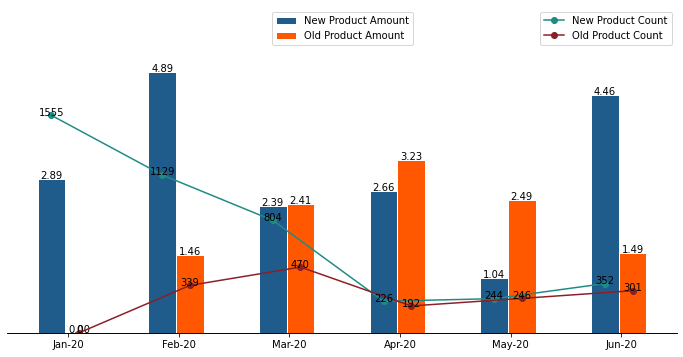

In [338]:
New_Product_Amount=list(df_new_vs_exist_prod['New_Product_Amount'].values)
Old_Product_Amount=list(df_new_vs_exist_prod['Old_Product_Amount'].values)
New_Product_Count=list(df_new_vs_exist_prod['New_Product_Count'].values)
Old_Product_Count=list(df_new_vs_exist_prod['Old_Product_Count'].values)


#customer=New_Customer_Amount+Old_Customer_Amount

r1=np.arange(len(New_Product_Amount))
r2= [x + barWidth for x in r1]
r3= [x + barWidth for x in r2]
r4= [x + barWidth for x in r3]
#r5=r1+r2+r3+r4+r5

barWidth=0.25

fig,ax=plt.subplots(figsize=(12,6))
ax_1=ax.bar(r1,New_Product_Amount,width=barWidth,color='#1f5c8b', edgecolor='white', label='New Product Amount')
for a, v in enumerate(New_Product_Amount):
    ax.text(a, v+0.01, "%.2f" %v, ha="center")
ax_2=ax.bar(r2,Old_Product_Amount,width=barWidth,color='#ff5800', edgecolor='white', label='Old Product Amount')
for a, v in enumerate(Old_Product_Amount):
    ax.text(a+barWidth, v+0.01, "%.2f" %v, ha="center")
ax1=ax.twinx()
ax_3=ax1.plot(r1,New_Product_Count,'o-',label='New Product Count',color='#1f8b84')
for a, v in enumerate(New_Product_Count):
    ax1.text(a, v, "%d" %v, ha="center")
ax_4=ax1.plot(r2,Old_Product_Count,'o-',label='Old Product Count',color='#8b1f26')
for a, v in enumerate(Old_Product_Count):
    ax1.text(a+barWidth, v, "%d" %v, ha="center")


ax.spines["top"].set_visible(False)
ax.set_ylim(0,df_new_vs_exist_prod['New_Product_Amount'].max()*1.25)
ax1.set_ylim(0,df_new_vs_exist_prod['New_Product_Count'].max()*1.5)

plt.xticks([r + barWidth-0.1 for r in range(len(New_Product_Amount))], list(df_new_vs_exist_prod["Month"]))
ax.legend(ncol=1,loc=9)
ax1.legend(ncol=1)



ax1.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.set_yticklabels([])
ax1.set_yticks([])
ax.spines["left"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax.set_yticklabels([])
ax.set_yticks([])
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\New_old_prod_rev.png',bbox_inches='tight',dpi=100)
plt.show()

# Top Products By Revenue

In [287]:
YTD_newdata_DS.columns

Index(['Order ID', 'Order Date', 'Order Status', 'Organic/Inorganic',
       'BDE Name', 'Department', 'Vertical', 'Customer Name', 'Customer Email',
       'Customer Telephone', 'Active/Inactive', 'Customer Category',
       'Product Name', 'SKU', 'Product Category', 'Product Rate',
       'Qty Ordered', 'Qty Invoiced', 'Qty Cancelled', 'Qty Shipped',
       'Qty Delivered', 'Qty Refunded', 'Fulfilment Center', 'State', 'City',
       'Postcode', 'AWB Number', 'Comment', 'Tag', 'Carrier type', 'Zone',
       'Shipment Date', 'Order Value', 'month', 'month_str', 'year', 'MonthY',
       'Period', 'Consistant'],
      dtype='object')

In [288]:
YTD_newdata_DS.shape

(11218, 39)

In [289]:
YTD_newdata_DS["Product Price"]=YTD_newdata_DS["Product Rate"]*YTD_newdata_DS["Qty Ordered"]

In [290]:
YTD_newdata_DS.shape

(11218, 40)

In [291]:
top_prod_1=pd.DataFrame(YTD_newdata_DS.groupby(["Product Name","Order ID"])["Product Price"].max()).reset_index()
top_prod_1=pd.DataFrame((top_prod_1.groupby(["Product Name"])["Product Price"].sum()/10000000)).reset_index()
top_prod_1
total_value=top_prod_1["Product Price"].sum().round(2)
total_value
top_prod_1["BU%"]=round((top_prod_1["Product Price"]/total_value)*100,2)
top_prod_1
top_prod_1.sort_values(by="Product Price",ascending=False,inplace=True)
top_prod_1=top_prod_1.iloc[0:10]
top_prod_1

,Product Name,Product Price,BU%
3774,trivitron mtv1000 transportable ventilator,3.540000,12.04
2669,nipro dialyzer elisio 13m,1.491132,5.07
2632,nipro 13m dialyzer,0.965535,3.28
834,contec infrared thermometer tp 500,0.787018,2.68
2662,nipro blood tubing set a058r/v634r (post pump),0.768172,2.61
2460,meropenam for injection i.p.,0.690300,2.35
2983,"ppe kit (overall dangri, head,cover,shooe cove...",0.672000,2.28
2938,piperacillin & tazobactam sodium sterile ip,0.487340,1.66
346,amoxicillin & potassium clavulanate ip sterile,0.467280,1.59
2660,nipro blood tubing post pump,0.389366,1.32


In [292]:
YTD_newdata.shape

(38760, 37)

In [293]:
YTD_newdata.columns

Index(['Order ID', 'Order Date', 'Order Status', 'Organic/Inorganic',
       'BDE Name', 'Department', 'Vertical', 'Customer Name', 'Customer Email',
       'Customer Telephone', 'Active/Inactive', 'Customer Category',
       'Product Name', 'SKU', 'Product Category', 'Product Rate',
       'Qty Ordered', 'Qty Invoiced', 'Qty Cancelled', 'Qty Shipped',
       'Qty Delivered', 'Qty Refunded', 'Fulfilment Center', 'State', 'City',
       'Postcode', 'AWB Number', 'Comment', 'Tag', 'Carrier type', 'Zone',
       'Shipment Date', 'Order Value', 'month', 'month_str', 'Period',
       'Consistant'],
      dtype='object')

In [294]:
YTD_newdata["Product Price"]=YTD_newdata["Product Rate"]*YTD_newdata["Qty Ordered"]

In [295]:
YTD_newdata.shape

(38760, 38)

In [296]:
top_prod_o=pd.DataFrame(YTD_newdata.groupby(["Product Name","Order ID"])["Product Price"].max()).reset_index()
top_prod_o=pd.DataFrame(top_prod_o.groupby("Product Name")["Product Price"].sum()/10000000).reset_index()
top_prod_o["Overall Contribution"]=round(top_prod_o["Product Price"]/(top_prod_o["Product Price"].sum())*100,2)
top_prod_o

,Product Name,Product Price,Overall Contribution
0,#1 heidbrink root tip elevator,0.000147,0.0
1,"(50x10) """,0.000016,0.0
2,"(amaryllis)""",0.001058,0.0
3,(beparin) heparin 25000 iu 5ml inj,0.002218,0.0
4,(gsk) betnesol 4mg/1ml inj (betamethasone),0.000077,0.0
...,...,...,...
11052,zymaxid e/d 2.5ml,0.000433,0.0
11053,zytanix 2.5mg tab 10's,0.001187,0.0
11054,zytanix 5mg tab 10's,0.002280,0.0
11055,zytee-rb gel,0.000479,0.0


In [297]:
top_prod=top_prod_1.merge(top_prod_o,on="Product Name",how="inner")
top_prod

,Product Name,Product Price_x,BU%,Product Price_y,Overall Contribution
0,trivitron mtv1000 transportable ventilator,3.540000,12.04,3.940000,3.40
1,nipro dialyzer elisio 13m,1.491132,5.07,3.087379,2.67
2,nipro 13m dialyzer,0.965535,3.28,2.466595,2.13
3,contec infrared thermometer tp 500,0.787018,2.68,1.029831,0.89
4,nipro blood tubing set a058r/v634r (post pump),0.768172,2.61,1.686774,1.46
5,meropenam for injection i.p.,0.690300,2.35,0.690300,0.60
6,"ppe kit (overall dangri, head,cover,shooe cove...",0.672000,2.28,0.672000,0.58
7,piperacillin & tazobactam sodium sterile ip,0.487340,1.66,0.487340,0.42
8,amoxicillin & potassium clavulanate ip sterile,0.467280,1.59,5.841000,5.05
9,nipro blood tubing post pump,0.389366,1.32,0.933759,0.81


In [298]:
top_prod.sort_values(by="Product Price_x",ascending=False,inplace=True)
top_prod=top_prod.iloc[0:10]
top_prod=top_prod.drop("Product Price_y",axis=1).rename(columns={"Product Price_x":"Product Price"})
top_prod

,Product Name,Product Price,BU%,Overall Contribution
0,trivitron mtv1000 transportable ventilator,3.540000,12.04,3.40
1,nipro dialyzer elisio 13m,1.491132,5.07,2.67
2,nipro 13m dialyzer,0.965535,3.28,2.13
3,contec infrared thermometer tp 500,0.787018,2.68,0.89
4,nipro blood tubing set a058r/v634r (post pump),0.768172,2.61,1.46
5,meropenam for injection i.p.,0.690300,2.35,0.60
6,"ppe kit (overall dangri, head,cover,shooe cove...",0.672000,2.28,0.58
7,piperacillin & tazobactam sodium sterile ip,0.487340,1.66,0.42
8,amoxicillin & potassium clavulanate ip sterile,0.467280,1.59,5.05
9,nipro blood tubing post pump,0.389366,1.32,0.81


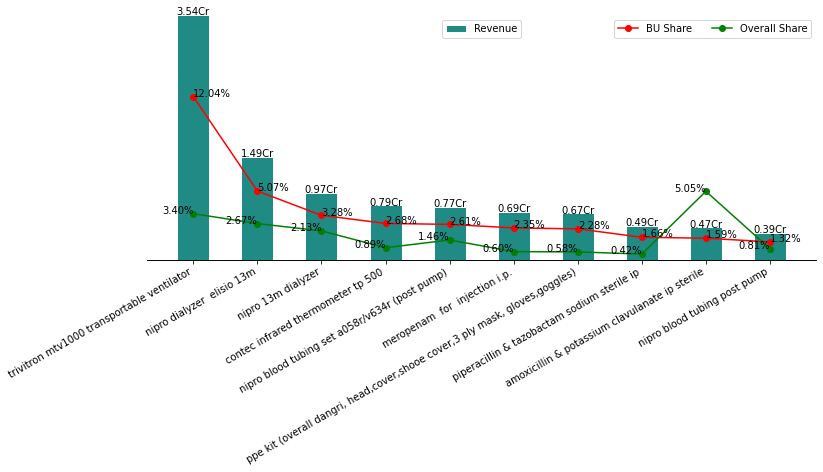

In [347]:
barWidth=0.5

Revenue=list(top_prod["Product Price"].values)
BU_Share=list(top_prod["BU%"].values)
Overall_Contribution=list(top_prod["Overall Contribution"].values)

r1=np.arange(len(Revenue))
r2= [x  for x in r1]
r3= [x  for x in r2]

fig,ax=plt.subplots(figsize=(12,5))
ax_1=ax.bar(r1,Revenue,width=barWidth,color='#1f8b84',edgecolor="White",label="Revenue")
for a, v in enumerate(Revenue):
    ax.text(a, v, "%.2f" %v+"Cr", ha="center")
ax1=ax.twinx()
ax_2=ax1.plot(r2,BU_Share,'o-',label="BU Share",color='r')
for a, v in enumerate(BU_Share):
    ax1.text(a, v, "%.2f" %v+"%", ha="left")
ax_3=ax1.plot(r3,Overall_Contribution,'o-',label="Overall Share",color='g')
for a, v in enumerate(Overall_Contribution):
    ax1.text(a, v, "%.2f" %v+"%", ha="right")
    
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_ylim(0,top_prod["Product Price"].max())
ax.legend(ncol=1,loc=9)
ax1.spines["top"].set_visible(False)
ax1.set_ylim(0,top_prod["BU%"].max()*1.5)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.legend(ncol=2)
ax1.set_yticklabels([])
ax1.set_yticks([])
ax.set_yticklabels([])
ax.set_yticks([])
plt.xticks([r  for r in range(len(Revenue))], (list(top_prod["Product Name"])))
fig.autofmt_xdate(rotation=30)
plt.savefig(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\top_product_rev.png',bbox_inches='tight',dpi=100)
plt.show()


# Product Category summary

In [300]:
MTD_newdata_DS.columns

Index(['Order ID', 'Order Date', 'Order Status', 'Organic/Inorganic',
       'BDE Name', 'Department', 'Vertical', 'Customer Name', 'Customer Email',
       'Customer Telephone', 'Active/Inactive', 'Customer Category',
       'Product Name', 'SKU', 'Product Category', 'Product Rate',
       'Qty Ordered', 'Qty Invoiced', 'Qty Cancelled', 'Qty Shipped',
       'Qty Delivered', 'Qty Refunded', 'Fulfilment Center', 'State', 'City',
       'Postcode', 'AWB Number', 'Comment', 'Tag', 'Carrier type', 'Zone',
       'Shipment Date', 'Order Value', 'month', 'month_str', 'year', 'MonthY',
       'Period'],
      dtype='object')

In [301]:
prod_MTD_newdata_DS=YTD_newdata_DS[YTD_newdata_DS["month"]==current_month]
prod_MTD_newdata_DS.shape
prod_MTD_newdata_DS["Period"]=prod_MTD_newdata_DS.apply(lambda df:period_fuct(df),axis=1)
prod_MTD_newdata_DS.head()
#prod_MTD_newdata_DS.shape
df_prod_MTD=pd.DataFrame(prod_MTD_newdata_DS.groupby(["Product Category","Period"])["Qty Ordered"].sum()).reset_index()
df_prod_MTD.rename(columns={"Order ID":"Order Count"},inplace=True)
df_prod_MTD
df1_prod_MTD=pd.DataFrame(prod_MTD_newdata_DS.groupby(["Product Category","Order ID","Period"])["Product Price"].max()).reset_index()
df1_1_prod_MTD=pd.DataFrame(round(df1_prod_MTD.groupby(["Product Category","Period"])["Product Price"].sum()/10000000,2)).reset_index()
df1_1_prod_MTD
df_prod_MTD=df_prod_MTD.merge(df1_1_prod_MTD)
df_prod_MTD

,Product Category,Period,Qty Ordered,Product Price
0,-,MTD,30247.0,0.02
1,Absorbent Gauze Cloth,MTD,5.0,0.00
2,Best Selling,MTD,717.0,0.04
3,Cable Cord,MTD,1.0,0.00
4,Cardiology,MTD,20.0,0.00
5,Catheter,MTD,14.0,0.00
6,Consumables,MTD,14.0,0.00
7,Cotton,MTD,1738.0,0.01
8,Default Category,MTD,34832.0,0.16
9,Dental,MTD,32593.0,0.09


In [302]:
prod_MTD_newdata_w=YTD_newdata[YTD_newdata["month"]==current_month]
prod_MTD_newdata_w.shape
prod_MTD_newdata_w["Period"]=prod_MTD_newdata_w.apply(lambda df:period_fuct(df),axis=1)
prod_MTD_newdata_w.head()
#prod_MTD_newdata_DS.shape

df1_prod_MTD_w=pd.DataFrame(prod_MTD_newdata_w.groupby(["Product Category","Order ID","Period"])["Product Price"].max()).reset_index()
df1_prod_MTD_w=pd.DataFrame(round(df1_prod_MTD_w.groupby(["Product Category","Period"])["Product Price"].sum()/10000000,2)).reset_index()
df1_prod_MTD_w

df1_prod_MTD_w.drop(["Period"],axis=1,inplace=True)
df_prod_MTD=df_prod_MTD.merge(df1_prod_MTD_w,on="Product Category",how="inner")
df_prod_MTD["BU%"]=round((df_prod_MTD["Product Price_x"]/df_prod_MTD["Product Price_y"])*100)
df_prod_MTD=df_prod_MTD.drop("Product Price_y",axis=1)
df_prod_MTD=df_prod_MTD.rename(columns={"Product Price_x":"Product Price"})
df_prod_MTD.dropna(inplace=True)
df_prod_MTD



,Product Category,Period,Qty Ordered,Product Price,BU%
0,-,MTD,30247.0,0.02,9.0
2,Best Selling,MTD,717.0,0.04,25.0
7,Cotton,MTD,1738.0,0.01,100.0
8,Default Category,MTD,34832.0,0.16,37.0
9,Dental,MTD,32593.0,0.09,82.0
10,Disposables,MTD,142965.0,0.20,45.0
12,Examination Gloves,MTD,20050.0,0.01,100.0
13,Face Mask,MTD,1175.0,0.01,50.0
16,Hospital Furniture,MTD,614.0,0.00,0.0
17,Intravenous Therapy,MTD,14687.0,0.01,33.0


In [303]:
prod_LMTD_newdata_DS=YTD_newdata_DS[YTD_newdata_DS["month"]==last_month]
prod_LMTD_newdata_DS.shape
prod_LMTD_newdata_DS["Period"]=prod_LMTD_newdata_DS.apply(lambda df:period_fuct(df),axis=1)
prod_LMTD_newdata_DS.head()
#prod_LMTD_newdata_DS.shape
df_prod_LMTD=pd.DataFrame(prod_LMTD_newdata_DS.groupby(["Product Category","Period"])["Qty Ordered"].sum()).reset_index()
#df_prod_LMTD.rename(columns={"Order ID":"Order Count"},inplace=True)
df_prod_LMTD
df1_prod_LMTD=pd.DataFrame(prod_LMTD_newdata_DS.groupby(["Product Category","Order ID","Period"])["Product Price"].max()).reset_index()
df1_1_prod_LMTD=pd.DataFrame(round(df1_prod_LMTD.groupby(["Product Category","Period"])["Product Price"].sum()/10000000,2)).reset_index()
df1_1_prod_LMTD
df_prod_LMTD=df_prod_LMTD.merge(df1_1_prod_LMTD)
df_prod_LMTD

,Product Category,Period,Qty Ordered,Product Price
0,-,LMTD,12994.00,0.01
1,Best Selling,LMTD,2512.00,0.24
2,Cardiology,LMTD,25.00,0.00
3,Default Category,LMTD,66551.00,0.40
4,Dental,LMTD,137.00,0.03
5,Disposable,LMTD,2.00,0.00
6,Disposable OT &amp; ICU Dressing,LMTD,50.00,0.00
7,Disposables,LMTD,707752.00,0.52
8,Endodontics,LMTD,2.00,0.00
9,Face Mask,LMTD,125.00,0.00


In [304]:
prod_LMTD_newdata_w=YTD_newdata[YTD_newdata["month"]==last_month]
prod_LMTD_newdata_w.shape
prod_LMTD_newdata_w["Period"]=prod_LMTD_newdata_w.apply(lambda df:period_fuct(df),axis=1)
prod_LMTD_newdata_w.head()
#prod_LMTD_newdata_DS.shape

df1_prod_LMTD_w=pd.DataFrame(prod_LMTD_newdata_w.groupby(["Product Category","Order ID","Period"])["Product Price"].max()).reset_index()
df1_prod_LMTD_w=pd.DataFrame(round(df1_prod_LMTD_w.groupby(["Product Category","Period"])["Product Price"].sum()/10000000,2)).reset_index()
df1_prod_LMTD_w

df1_prod_LMTD_w.drop(["Period"],axis=1,inplace=True)
df_prod_LMTD=df_prod_LMTD.merge(df1_prod_LMTD_w,on="Product Category",how="inner")
df_prod_LMTD["BU%"]=round((df_prod_LMTD["Product Price_x"]/df_prod_LMTD["Product Price_y"])*100)
df_prod_LMTD=df_prod_LMTD.drop("Product Price_y",axis=1)
df_prod_LMTD=df_prod_LMTD.rename(columns={"Product Price_x":"Product Price"})
df_prod_LMTD.dropna(inplace=True)
df_prod_LMTD


,Product Category,Period,Qty Ordered,Product Price,BU%
0,-,LMTD,12994.00,0.01,17.0
1,Best Selling,LMTD,2512.00,0.24,92.0
3,Default Category,LMTD,66551.00,0.40,29.0
4,Dental,LMTD,137.00,0.03,75.0
7,Disposables,LMTD,707752.00,0.52,64.0
11,Hospital Establishment,LMTD,31947.00,0.07,100.0
12,Hospital Furniture,LMTD,124126.00,0.12,92.0
13,Intravenous Therapy,LMTD,25201.00,0.01,12.0
14,Medical Consumables,LMTD,21351.00,0.52,31.0
15,Medical Devices,LMTD,455.00,0.06,86.0


In [305]:
YTD_newdata["Period"].unique()

array(['YTD'], dtype=object)

In [306]:
df_prod_YTD=pd.DataFrame(YTD_newdata_DS.groupby(["Product Category","Period"])["Qty Ordered"].sum()).reset_index()
df_prod_YTD
df1_prod_YTD=pd.DataFrame(YTD_newdata_DS.groupby(["Product Category","Order ID","Period"])["Product Price"].max()).reset_index()
df1_1_prod_YTD=pd.DataFrame(round(df1_prod_YTD.groupby(["Product Category","Period"])["Product Price"].sum()/10000000,2)).reset_index()
df1_1_prod_YTD
df_prod_YTD=df_prod_YTD.merge(df1_1_prod_YTD)
df_prod_YTD

,Product Category,Period,Qty Ordered,Product Price
0,-,YTD,340949.00,0.41
1,AV Fistula Needle,YTD,12.00,0.00
2,Absorbent Gauze Cloth,YTD,5.00,0.00
3,Absorbent Rolled Gauze,YTD,220.00,0.00
4,Anaesthesiology,YTD,34.00,0.00
5,Bandage Cloth,YTD,100.00,0.00
6,Best Selling,YTD,14229.00,1.09
7,COVID Corporate Safety Products,YTD,31.00,0.00
8,Cable Cord,YTD,1.00,0.00
9,Cardiology,YTD,433.00,0.01


In [307]:
df1_prod_YTD_w=pd.DataFrame(YTD_newdata.groupby(["Product Category","Order ID","Period"])["Product Price"].max()).reset_index()
df1_prod_YTD_w=pd.DataFrame(round(df1_prod_YTD_w.groupby(["Product Category","Period"])["Product Price"].sum()/10000000,2)).reset_index()
df1_prod_YTD_w

df1_prod_YTD_w.drop(["Period"],axis=1,inplace=True)
df_prod_YTD=df_prod_YTD.merge(df1_prod_YTD_w,on="Product Category",how="inner")
df_prod_YTD["BU%"]=round((df_prod_YTD["Product Price_x"]/df_prod_YTD["Product Price_y"])*100)
df_prod_YTD=df_prod_YTD.drop("Product Price_y",axis=1)
df_prod_YTD=df_prod_YTD.rename(columns={"Product Price_x":"Product Price"})
df_prod_YTD.dropna(inplace=True)
df_prod_YTD

,Product Category,Period,Qty Ordered,Product Price,BU%
0,-,YTD,340949.00,0.41,10.0
6,Best Selling,YTD,14229.00,1.09,52.0
9,Cardiology,YTD,433.00,0.01,100.0
11,Consumables,YTD,46.00,0.01,100.0
12,Cotton,YTD,1961.00,0.01,100.0
13,Default Category,YTD,821048.00,2.27,34.0
14,Dental,YTD,113681.00,1.31,92.0
18,Disposables,YTD,2831540.00,1.80,38.0
21,Examination Gloves,YTD,25050.00,0.01,33.0
23,Face Mask,YTD,2300.00,0.01,12.0


In [308]:
df_prod_cat=df_prod_LMTD.append([df_prod_MTD,df_prod_YTD],ignore_index=True)
df_prod_cat[df_prod_cat["Product Category"]=="Best Selling"]
df_prod_cat.rename(columns={'Qty Ordered':"Order Qty","Product Price":"Order Value"},inplace=True)
df_prod_cat["Order Qty"]=df_prod_cat["Order Qty"].astype(int)
df_prod_cat

,Product Category,Period,Order Qty,Order Value,BU%
0,-,LMTD,12994,0.01,17.0
1,Best Selling,LMTD,2512,0.24,92.0
2,Default Category,LMTD,66551,0.40,29.0
3,Dental,LMTD,137,0.03,75.0
4,Disposables,LMTD,707752,0.52,64.0
5,Hospital Establishment,LMTD,31947,0.07,100.0
6,Hospital Furniture,LMTD,124126,0.12,92.0
7,Intravenous Therapy,LMTD,25201,0.01,12.0
8,Medical Consumables,LMTD,21351,0.52,31.0
9,Medical Devices,LMTD,455,0.06,86.0


In [309]:
df_prod_cat_pvt=pd.pivot_table(data=df_prod_cat,index="Product Category",columns="Period",values=["Order Qty","Order Value","BU%"])
df_prod_cat_pvt.dropna(inplace=True)

In [310]:
df_prod_cat_pvt

BU%             Order Qty                       \
Period                   LMTD   MTD   YTD      LMTD       MTD        YTD   
Product Category                                                           
-                        17.0   9.0  10.0   12994.0   30247.0   340949.0   
Best Selling             92.0  25.0  52.0    2512.0     717.0    14229.0   
Default Category         29.0  37.0  34.0   66551.0   34832.0   821048.0   
Dental                   75.0  82.0  92.0     137.0   32593.0   113681.0   
Disposables              64.0  45.0  38.0  707752.0  142965.0  2831540.0   
Hospital Furniture       92.0   0.0  27.0  124126.0     614.0   159572.0   
Intravenous Therapy      12.0  33.0  37.0   25201.0   14687.0   131588.0   
Medical Consumables      31.0  19.0  36.0   21351.0    6950.0   159371.0   
Medical Devices          86.0  67.0  22.0     455.0     174.0     3107.0   
Medical Equipment         0.0  82.0  60.0     183.0      52.0    23147.0   
Others                   11.0  15.0  16.0  363152.0  734828.0  3074561.0   
Pharmaceutical Products  75.0  83.0  72.0   50982.0   64869.0   369416.0   

                        Order Value              
Period                         LMTD   MTD   YTD  
Product Category                                 
-                              0.01  0.02  0.41  
Best Selling                   0.24  0.04  1.09  
Default Category               0.40  0.16  2.27  
Dental                         0.03  0.09  1.31  
Disposables                    0.52  0.20  1.80  
Hospital Furniture             0.12  0.00  0.33  
Intravenous Therapy            0.01  0.01  0.14  
Medical Consumables            0.52  0.14  2.99  
Medical Devices                0.06  0.02  0.38  
Medical Equipment              0.00  3.59  4.49  
Others                         0.98  1.26  9.21  
Pharmaceutical Products        0.06  0.10  0.48

In [311]:
df_prod_cat_pvt=df_prod_cat_pvt.reset_index()

In [312]:
df_prod_cat_pvt.columns

MultiIndex([('Product Category',     ''),
            (             'BU%', 'LMTD'),
            (             'BU%',  'MTD'),
            (             'BU%',  'YTD'),
            (       'Order Qty', 'LMTD'),
            (       'Order Qty',  'MTD'),
            (       'Order Qty',  'YTD'),
            (     'Order Value', 'LMTD'),
            (     'Order Value',  'MTD'),
            (     'Order Value',  'YTD')],
           names=[None, 'Period'])

In [313]:
df_prod_cat_pvt=pd.DataFrame(df_prod_cat_pvt,columns=[df_prod_cat_pvt.columns[0],df_prod_cat_pvt.columns[4],df_prod_cat_pvt.columns[7],df_prod_cat_pvt.columns[1],
                                                     df_prod_cat_pvt.columns[5],df_prod_cat_pvt.columns[8],df_prod_cat_pvt.columns[2],
                                                     df_prod_cat_pvt.columns[6],df_prod_cat_pvt.columns[9],df_prod_cat_pvt.columns[3]])
df_prod_cat_pvt

,Product Category,Order Qty,Order Value,BU%,Order Qty,Order Value,BU%,Order Qty,Order Value,BU%
Period,,LMTD,LMTD,LMTD,MTD,MTD,MTD,YTD,YTD,YTD
0,-,12994.0,0.01,17.0,30247.0,0.02,9.0,340949.0,0.41,10.0
1,Best Selling,2512.0,0.24,92.0,717.0,0.04,25.0,14229.0,1.09,52.0
2,Default Category,66551.0,0.40,29.0,34832.0,0.16,37.0,821048.0,2.27,34.0
3,Dental,137.0,0.03,75.0,32593.0,0.09,82.0,113681.0,1.31,92.0
4,Disposables,707752.0,0.52,64.0,142965.0,0.20,45.0,2831540.0,1.80,38.0
5,Hospital Furniture,124126.0,0.12,92.0,614.0,0.00,0.0,159572.0,0.33,27.0
6,Intravenous Therapy,25201.0,0.01,12.0,14687.0,0.01,33.0,131588.0,0.14,37.0
7,Medical Consumables,21351.0,0.52,31.0,6950.0,0.14,19.0,159371.0,2.99,36.0
8,Medical Devices,455.0,0.06,86.0,174.0,0.02,67.0,3107.0,0.38,22.0


In [314]:
df_prod_cat_pvt[('Order Qty')]=df_prod_cat_pvt[('Order Qty')].astype(int)

In [315]:
df_prod_cat_pvt

,Product Category,Order Qty,Order Value,BU%,Order Qty,Order Value,BU%,Order Qty,Order Value,BU%
Period,,LMTD,LMTD,LMTD,MTD,MTD,MTD,YTD,YTD,YTD
0,-,12994,0.01,17.0,30247,0.02,9.0,340949,0.41,10.0
1,Best Selling,2512,0.24,92.0,717,0.04,25.0,14229,1.09,52.0
2,Default Category,66551,0.40,29.0,34832,0.16,37.0,821048,2.27,34.0
3,Dental,137,0.03,75.0,32593,0.09,82.0,113681,1.31,92.0
4,Disposables,707752,0.52,64.0,142965,0.20,45.0,2831540,1.80,38.0
5,Hospital Furniture,124126,0.12,92.0,614,0.00,0.0,159572,0.33,27.0
6,Intravenous Therapy,25201,0.01,12.0,14687,0.01,33.0,131588,0.14,37.0
7,Medical Consumables,21351,0.52,31.0,6950,0.14,19.0,159371,2.99,36.0
8,Medical Devices,455,0.06,86.0,174,0.02,67.0,3107,0.38,22.0


In [316]:
df_prod_cat_pvt.columns

MultiIndex([('Product Category',     ''),
            (       'Order Qty', 'LMTD'),
            (     'Order Value', 'LMTD'),
            (             'BU%', 'LMTD'),
            (       'Order Qty',  'MTD'),
            (     'Order Value',  'MTD'),
            (             'BU%',  'MTD'),
            (       'Order Qty',  'YTD'),
            (     'Order Value',  'YTD'),
            (             'BU%',  'YTD')],
           names=[None, 'Period'])

In [317]:
df_prod_cat_pvt_1=df_prod_cat_pvt.rename(columns={"(       'Order Qty', 'LMTD')":"(       'Order Qty', '')"})

In [318]:
df_prod_cat_pvt_1

,Product Category,Order Qty,Order Value,BU%,Order Qty,Order Value,BU%,Order Qty,Order Value,BU%
Period,,LMTD,LMTD,LMTD,MTD,MTD,MTD,YTD,YTD,YTD
0,-,12994,0.01,17.0,30247,0.02,9.0,340949,0.41,10.0
1,Best Selling,2512,0.24,92.0,717,0.04,25.0,14229,1.09,52.0
2,Default Category,66551,0.40,29.0,34832,0.16,37.0,821048,2.27,34.0
3,Dental,137,0.03,75.0,32593,0.09,82.0,113681,1.31,92.0
4,Disposables,707752,0.52,64.0,142965,0.20,45.0,2831540,1.80,38.0
5,Hospital Furniture,124126,0.12,92.0,614,0.00,0.0,159572,0.33,27.0
6,Intravenous Therapy,25201,0.01,12.0,14687,0.01,33.0,131588,0.14,37.0
7,Medical Consumables,21351,0.52,31.0,6950,0.14,19.0,159371,2.99,36.0
8,Medical Devices,455,0.06,86.0,174,0.02,67.0,3107,0.38,22.0


In [319]:
def chartStyle(run_style):
    run_style.bold = True 
    run_style_font=run_style.font
    run_style_font.size=Pt(14)
    run_style_font.name="Calibri"
    run_style_font.color.rgb=RGBColor(255,69,0)


In [320]:
### table header row 
def table_header_cell(style):
    style.bold = True
    font=style.font
    font.color.rgb=RGBColor(0,0,139)
    font.size=Pt(12)
    font.name="Calibri"
    style.underline = True

In [321]:
def values_style(value_run_style):
    font=value_run_style.font
    font.color.rgb=RGBColor(0x42, 0x24, 0xE9)

In [322]:
def pvt_header0(value_run_style):
    value_run_style.bold=True
    font=value_run_style.font
    font.color.rgb=RGBColor(0,0,139)
    font.size=Pt(9)
    font.name="Calibri"

In [323]:
def pvt_header1(value_run_style):
    value_run_style.bold=True
    font=value_run_style.font
    font.color.rgb=RGBColor(255,0,0)
    font.size=Pt(9)
    font.name="Calibri"

In [333]:
def pvt_header_ws0(value_run_style):
    value_run_style.bold=True
    font=value_run_style.font
    font.color.rgb=RGBColor(0,0,139)
    font.size=Pt(7)
    font.name="Calibri"
def pvt_header_ws1(value_run_style):
    value_run_style.bold=True
    font=value_run_style.font
    font.color.rgb=RGBColor(255,0,0)
    font.size=Pt(7)
    font.name="Calibri"
def pvt_values_ws1(value_run_style):
    #value_run_style.bold=True
    font=value_run_style.font
    font.color.rgb=RGBColor(0,0,139)
    font.size=Pt(7)
    font.name="Calibri"

In [334]:
def pvt_values1(value_run_style):
    #value_run_style.bold=True
    font=value_run_style.font
    font.color.rgb=RGBColor(0,0,139)
    font.size=Pt(8)
    font.name="Calibri"

# Document Creation 

In [353]:
doc=docx.Document()

sec_pr = doc.sections[0]._sectPr # get the section properties el
# create new borders el
pg_borders = OxmlElement('w:pgBorders')
# specifies how the relative positioning of the borders should be calculated
pg_borders.set(qn('w:offsetFrom'), 'page')
pg_borders.set(qn('w:display'), 'allpages')

for border_name in ('top', 'left', 'bottom', 'right',): # set all borders
    border_el = OxmlElement(f'w:{border_name}')
    border_el.set(qn('w:val'), 'single') # a single line
    border_el.set(qn('w:sz'), '4') # for meaning of  remaining attrs please look docs
    border_el.set(qn('w:space'), '24')
    border_el.set(qn('w:color'), 'blue')
    pg_borders.append(border_el) # register single border to border el
sec_pr.append(pg_borders) # apply border changes to section


table_title=doc.add_table(1,4)
#ca2d37
shading_elm_0 = parse_xml(r'<w:shd {} w:fill="FF8C00"/>'.format(nsdecls('w')))
table_title.rows[0].cells[0]._tc.get_or_add_tcPr().append(shading_elm_0)
hdr_cell = table_title.rows[0].cells
run_title = hdr_cell[0].paragraphs[0].add_run('SUMMARY',style='Heading 1 Char')
run_title.bold = True
run_title_font=run_title.font
run_title_font.size=Pt(16)
run_title_font.name="Calibri"
run_title_font.color.rgb=RGBColor(255,255,255)
#run_title.underline = True

customers=(('Actual:',str(YTD_newdata_DS_last_month_rev),str(YTD_newdata_DS_current_month_rev),str(YTD_newdata_DS_YTD_month_rev),str(YTD_newdata_DS["Customer Name"].nunique()),str(YTD_newdata_DS["Product Name"].nunique()),str(YTD_newdata_DS["Order ID"].nunique())),
          ('Contribution:',contribution_LMTD_rev,contribution_MTD_rev,contribution_YTD_rev,contribution_cust,contribution_product,contribution_orders))
table = doc.add_table(rows=1, cols=7)

hdr_cells = table.rows[0].cells
run = hdr_cells[0].paragraphs[0].add_run()

run1 = hdr_cells[1].paragraphs[0].add_run('LMTD')
table_header_cell(run1)

run2 = hdr_cells[2].paragraphs[0].add_run('MTD')
table_header_cell(run2)

run3 = hdr_cells[3].paragraphs[0].add_run('YTD')
table_header_cell(run3)

run1 = hdr_cells[4].paragraphs[0].add_run('Customers')
table_header_cell(run1)

run2 = hdr_cells[5].paragraphs[0].add_run('Products')
table_header_cell(run2)

run3 = hdr_cells[6].paragraphs[0].add_run('Orders')
table_header_cell(run3)

table_val = doc.add_table(rows=1, cols=7)
hdr_cells = table_val.rows[0].cells
run = hdr_cells[0].paragraphs[0].add_run(customers[0][0])
run.bold = True
font=run.font
font.color.rgb=RGBColor(255,69,0)
font.size=Pt(12)
font.name="Calibri"
run.underline = True

run1 = hdr_cells[1].paragraphs[0].add_run(customers[0][1])
values_style(run1)

run2 = hdr_cells[2].paragraphs[0].add_run(customers[0][2])
values_style(run2)

run3 = hdr_cells[3].paragraphs[0].add_run(customers[0][3])
values_style(run3)

run4 = hdr_cells[4].paragraphs[0].add_run(customers[0][4])
values_style(run4)

run5 = hdr_cells[5].paragraphs[0].add_run(customers[0][5])
values_style(run5)

run6 = hdr_cells[6].paragraphs[0].add_run(customers[0][6])
values_style(run6)

table_val1 = doc.add_table(rows=1, cols=7)
hdr_cells = table_val1.rows[0].cells
run = hdr_cells[0].paragraphs[0].add_run(customers[1][0])
run.bold = True
font=run.font
font.color.rgb=RGBColor(255,69,0)
font.size=Pt(12)
font.name="Calibri"
run.underline = True

run1 = hdr_cells[1].paragraphs[0].add_run(customers[1][1])
values_style(run1)

run2 = hdr_cells[2].paragraphs[0].add_run(customers[1][2])
values_style(run2)

run3 = hdr_cells[3].paragraphs[0].add_run(customers[1][3])
values_style(run3)

run4 = hdr_cells[4].paragraphs[0].add_run(customers[1][4])
values_style(run4)

run5 = hdr_cells[5].paragraphs[0].add_run(customers[1][5])
values_style(run5)

run6 = hdr_cells[6].paragraphs[0].add_run(customers[1][6])
values_style(run6)

doc_para1_0=doc.add_paragraph()
doc_para1_0.add_run()
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_prod_order.png',width=Inches(6.5))


doc.add_page_break()

table_title=doc.add_table(1,4)
#ca2d37
shading_elm_0 = parse_xml(r'<w:shd {} w:fill="FF8C00"/>'.format(nsdecls('w')))
table_title.rows[0].cells[0]._tc.get_or_add_tcPr().append(shading_elm_0)
hdr_cell = table_title.rows[0].cells
run_title = hdr_cell[0].paragraphs[0].add_run('CUSTOMER',style='Heading 1 Char')
run_title.bold = True
run_title_font=run_title.font
run_title_font.size=Pt(16)
run_title_font.name="Calibri"
run_title_font.color.rgb=RGBColor(255,255,255)

table_title=doc.add_table(1,2)
hdr_cell = table_title.rows[0].cells
run_title = hdr_cell[0].paragraphs[0].add_run('Customer Segemetation',style='Intense Reference')
run_title_1 = hdr_cell[1].paragraphs[0].add_run('Order Summary',style='Intense Reference')
chartStyle(run_title)
chartStyle(run_title_1)

doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_seg_order_summary.png',width=Inches(6.8))

doc_para1=doc.add_paragraph()
doc_para1_run=doc_para1.add_run("New Vs Existing Customers:",style='Intense Reference') 
chartStyle(doc_para1_run)
#doc_para1_0=doc.add_paragraph()
#doc_para1_0.add_run()
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\New_old_cust.png',width=Inches(6.5))

doc_para1=doc.add_paragraph()
doc_para1_run=doc_para1.add_run("Customer Category Summary:",style='Intense Reference') 
chartStyle(doc_para1_run)
#doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_cat_summ.png',width=Inches(6.5),height=Inches(2.5))

#doc.add_page_break()
t2=doc.add_table(rows=(df_cust_cat.shape[0]+2), cols=(df_cust_cat.shape[1]),style="Medium List 2")

for j in range(df_cust_cat.shape[-1]):
    #t2.cell(0,j).height=Cm(10)
    pvt_header0(t2.cell(0,j).paragraphs[0].add_run(df_cust_cat.columns[j][1]))
for j in range(df_cust_cat.shape[-1]):
    #t2.cell(0,j).height=Cm(10)
    pvt_header1(t2.cell(1,j).paragraphs[0].add_run(df_cust_cat.columns[j][0]))
    
for i in range(df_cust_cat.shape[0]):
    for j in range(df_cust_cat.shape[-1]):
        #t2.cell(i+1,j).text=str(df_cust_cat.values[i,j])
        pvt_values1(t2.cell(i+2,j).paragraphs[0].add_run(str(df_cust_cat.values[i,j])))
        
        
doc.add_page_break()

doc_para1=doc.add_paragraph()
doc_para1_run=doc_para1.add_run("Market Analysis:",style='Intense Reference') 
chartStyle(doc_para1_run)
#doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\state_rev.png',width=Inches(6.5),height=Inches(6))

t2=doc.add_table(rows=(df_state.shape[0]+1), cols=(df_state.shape[1]),style="Medium List 2")

#for j in range(df_state_aoc_pvt.shape[-1]):
    #t2.cell(0,j).height=Cm(10)
 #   pvt_header0(t2.cell(0,j).paragraphs[0].add_run(df_state_aoc_pvt.columns[j][1]))
for j in range(df_state.shape[-1]):
    #t2.cell(0,j).height=Cm(10)
    pvt_header1(t2.cell(0,j).paragraphs[0].add_run(df_state.columns[j]))
    
for i in range(df_state.shape[0]):
    for j in range(df_state.shape[-1]):
        #t2.cell(i+1,j).text=str(df_cust_cat.values[i,j])
        pvt_values1(t2.cell(i+1,j).paragraphs[0].add_run(str(df_state.values[i,j])))
        

doc_para1=doc.add_paragraph()
doc_para1_run=doc_para1.add_run("Top Customers Contribution and Wallet share:",style='Intense Reference') 
chartStyle(doc_para1_run)
#doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_contri_ws.png',width=Inches(6),height=Inches(2))

t2=doc.add_table(rows=(df_cust_BU_WS_final_1.shape[0]+2), cols=(df_cust_BU_WS_final_1.shape[1]),style="Medium List 2")

for j in range(df_cust_BU_WS_final_1.shape[-1]):
    #t2.cell(0,j).height=Cm(10)
    pvt_header_ws0(t2.cell(0,j).paragraphs[0].add_run(df_cust_BU_WS_final_1.columns[j][1]))
for j in range(df_cust_BU_WS_final_1.shape[-1]):
    #t2.cell(0,j).height=Cm(10)
    pvt_header_ws1(t2.cell(1,j).paragraphs[0].add_run(df_cust_BU_WS_final_1.columns[j][0]))
    
for i in range(df_cust_BU_WS_final_1.shape[0]):
    for j in range(df_cust_BU_WS_final_1.shape[-1]):
        #t2.cell(i+1,j).text=str(df_cust_cat.values[i,j])
        pvt_values_ws1(t2.cell(i+2,j).paragraphs[0].add_run(str(df_cust_BU_WS_final_1.values[i,j])))
doc.add_page_break()        

#doc_para1=doc.add_paragraph()
#doc_para1_run=doc_para1.add_run("Top Customers by Revenue:",style='Intense Reference') 
#chartStyle(doc_para1_run)
table_title=doc.add_table(1,2)
hdr_cell = table_title.rows[0].cells
run_title = hdr_cell[0].paragraphs[0].add_run('Top Customers by Revenue:',style='Intense Reference')
run_title_1 = hdr_cell[1].paragraphs[0].add_run('Customer wise BDE',style='Intense Reference')
chartStyle(run_title)
chartStyle(run_title_1)
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_rev_BDE.png',width=Inches(6.5))


table_title=doc.add_table(1,2)
hdr_cell = table_title.rows[0].cells
run_title = hdr_cell[0].paragraphs[0].add_run('Top Customers by Order Count:',style='Intense Reference')
run_title_1 = hdr_cell[1].paragraphs[0].add_run('Customer wise BDE',style='Intense Reference')
chartStyle(run_title)
chartStyle(run_title_1)
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_order_BDE.png',width=Inches(6.5))

table_title=doc.add_table(1,2)
hdr_cell = table_title.rows[0].cells
run_title = hdr_cell[0].paragraphs[0].add_run('Top Customers by Consistency:',style='Intense Reference')
run_title_1 = hdr_cell[1].paragraphs[0].add_run('Customer wise BDE',style='Intense Reference')
chartStyle(run_title)
chartStyle(run_title_1)
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\cust_consistant_BDE.png',width=Inches(6.5),height=Inches(3))

#doc.add_page_break()
table_title=doc.add_table(1,4)
#ca2d37
shading_elm_0 = parse_xml(r'<w:shd {} w:fill="FF8C00"/>'.format(nsdecls('w')))
table_title.rows[0].cells[0]._tc.get_or_add_tcPr().append(shading_elm_0)
hdr_cell = table_title.rows[0].cells
run_title = hdr_cell[0].paragraphs[0].add_run('PRODUCT',style='Heading 1 Char')
run_title.bold = True
run_title_font=run_title.font
run_title_font.size=Pt(16)
run_title_font.name="Calibri"
run_title_font.color.rgb=RGBColor(255,255,255)

table_title=doc.add_table(1,2)
hdr_cell = table_title.rows[0].cells
run_title = hdr_cell[0].paragraphs[0].add_run('Product Segmentation:',style='Intense Reference')
run_title_1 = hdr_cell[1].paragraphs[0].add_run('Old vs New Product Analysis',style='Intense Reference')
chartStyle(run_title)
chartStyle(run_title_1)
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\old_new_prod_seg_analysis.png',width=Inches(6.5))

doc_para1=doc.add_paragraph()
doc_para1_run=doc_para1.add_run("Revenue from Old and New Products:",style='Intense Reference') 
chartStyle(doc_para1_run)
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\New_old_prod_rev.png',width=Inches(6.5))

doc.add_page_break()
doc_para1=doc.add_paragraph()
doc_para1_run=doc_para1.add_run("Top Products by Revenue:",style='Intense Reference') 
chartStyle(doc_para1_run)
doc.add_picture(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\top_product_rev.png',width=Inches(6.5))


doc_para1=doc.add_paragraph()
doc_para1_run=doc_para1.add_run("Product Category Summary:",style='Intense Reference') 
chartStyle(doc_para1_run)
t2=doc.add_table(rows=(df_prod_cat_pvt.shape[0]+2), cols=(df_prod_cat_pvt.shape[1]),style="Medium List 2")

for j in range(df_prod_cat_pvt.shape[-1]):
    #t2.cell(0,j).height=Cm(10)
    #t2.cell(0,j).text=df_prod_cat_pvt.columns[j][1]
    pvt_header0(t2.cell(0,j).paragraphs[0].add_run(df_prod_cat_pvt.columns[j][1]))
    
for j in range(df_prod_cat_pvt.shape[-1]):
    
    #t2.cell(1,j).text=df_prod_cat_pvt.columns[j][0]
    
    pvt_header1(t2.cell(1,j).paragraphs[0].add_run(df_prod_cat_pvt.columns[j][0]))
for i in range(df_prod_cat_pvt.shape[0]):
    for j in range(df_prod_cat_pvt.shape[-1]):
        #t2.cell(i+2,j).text=str(df_prod_cat_pvt.values[i,j])
        pvt_values1(t2.cell(i+2,j).paragraphs[0].add_run(str(df_prod_cat_pvt.values[i,j])))
        



doc.save(r'C:\Users\Hp\OneDrive\Documents\NLP IN PYTHON COURSE\Narratives\MedikaBazzar\Medika_doc.docx')
